In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df_path = r"C:\Users\franc\Desktop\ML_IoT\train.csv"


In [3]:
df= pd.read_csv(df_path, sep=',')
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

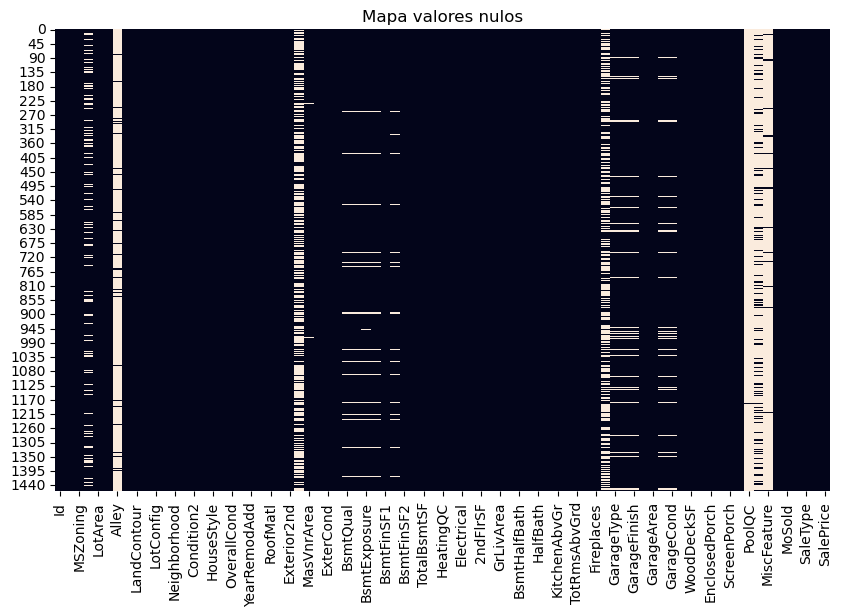

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa valores nulos")
plt.show

### Análisis variable Objetivo

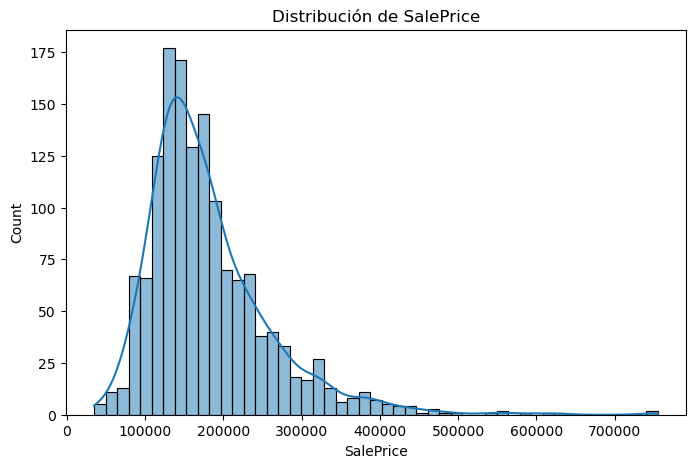

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [8]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='SalePrice', kde=True)
plt.title("Distribución de SalePrice")
plt.show()

print(df['SalePrice'].describe())

#### Conclusiones :

+ Distribución  sesgada ligeramente hacia la derecha, la cola de los valores se alarga hacia esa dirección
+ Valores atípicos  en el extremo superior
+ Se considera aplicar una transformación logarítmica, para mejorar la normalidad de la distribución y tratar los valores atípicos, pero debido a que el problema plantea relaciones no lineales se usarán Modelos Basados en Árboles, se entrenaran diferentes modelos de árboles con la variable por defecto y otra con las transformación logarítmica aplicada.
+ Posteriormente se compararán métricas para evaluar el rendimiento de ambos modelos.

###  Análisis univariado

C:\Users\franc\AppData\Local\Temp\ipykernel_1152\3966707169.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))


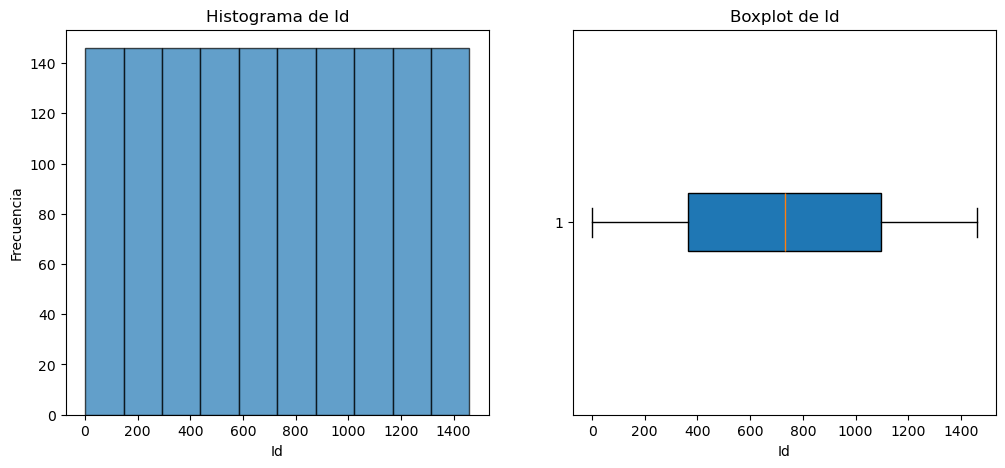

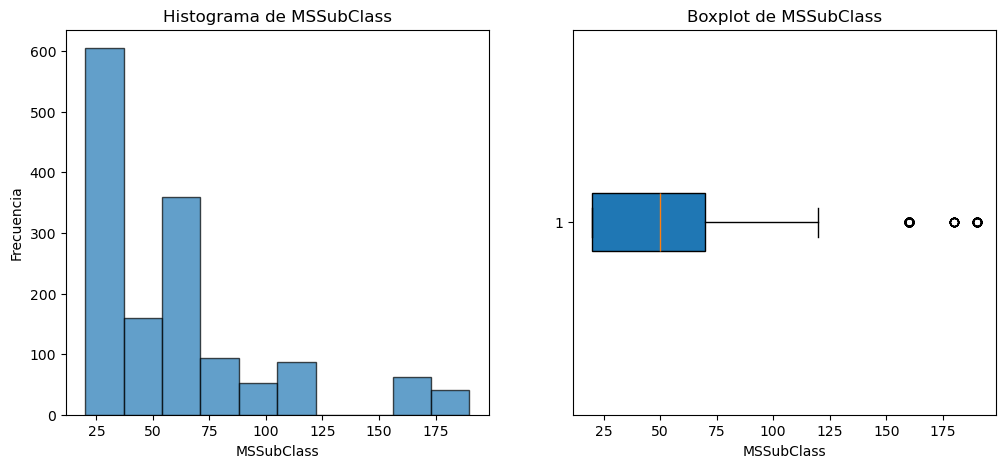

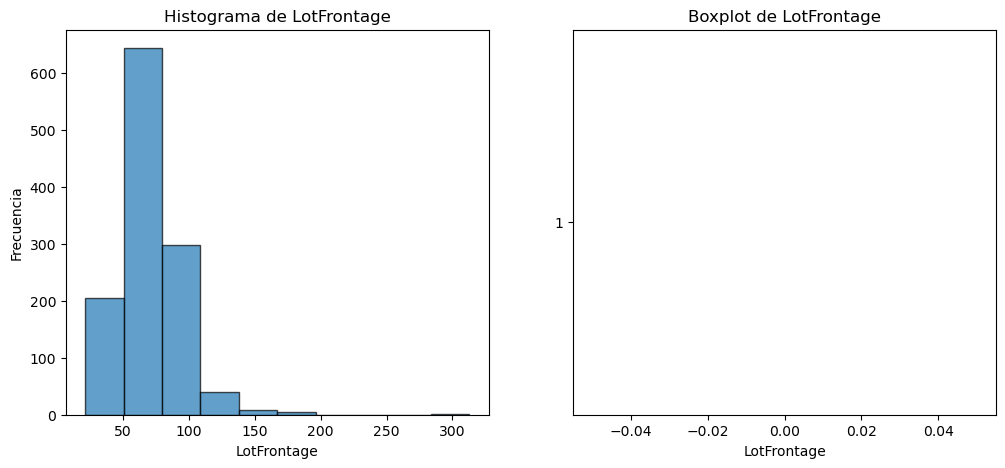

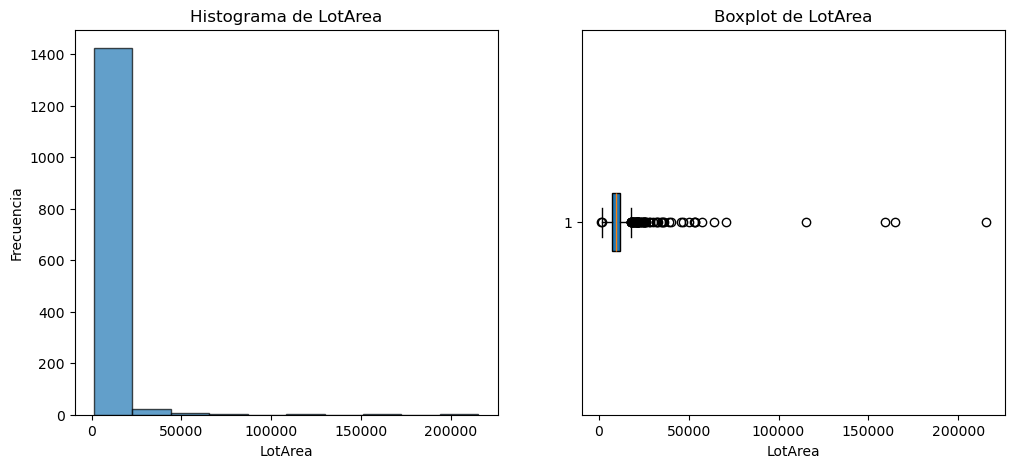

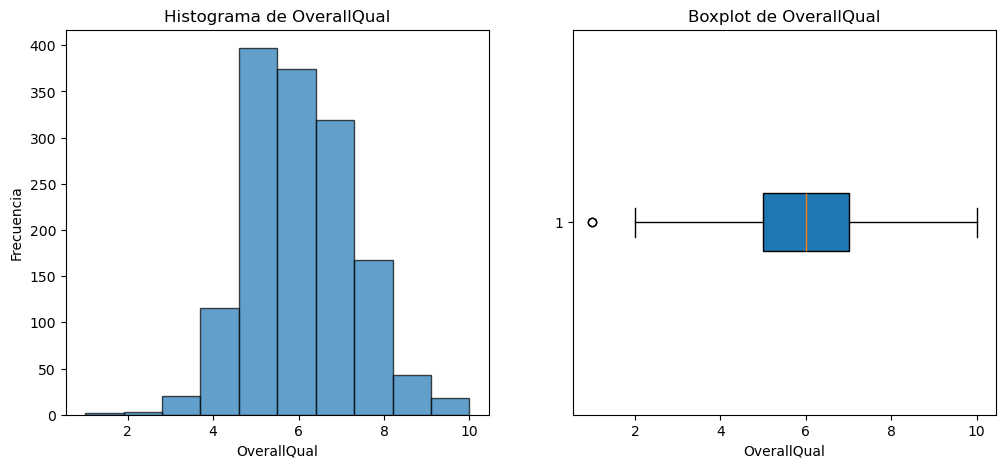

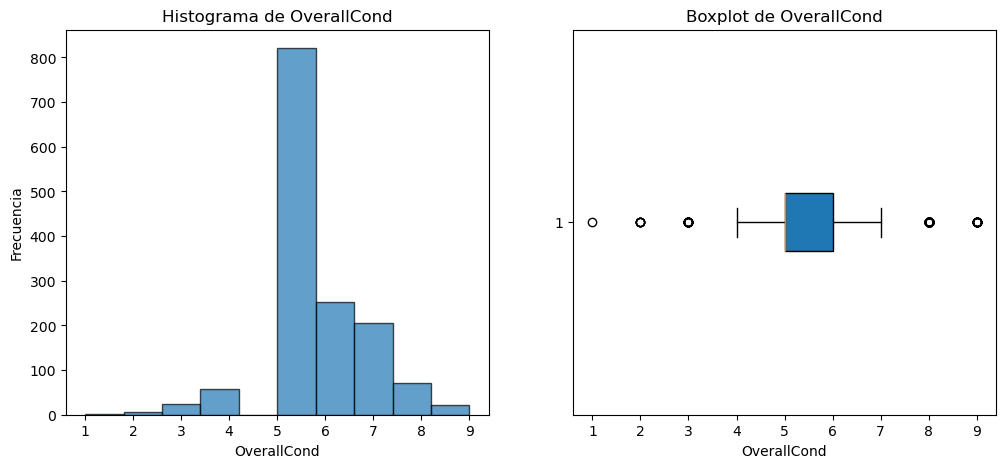

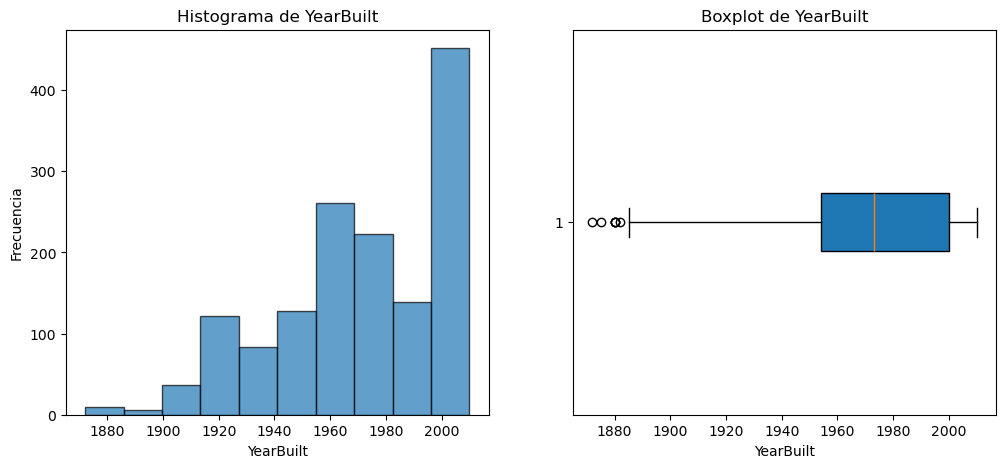

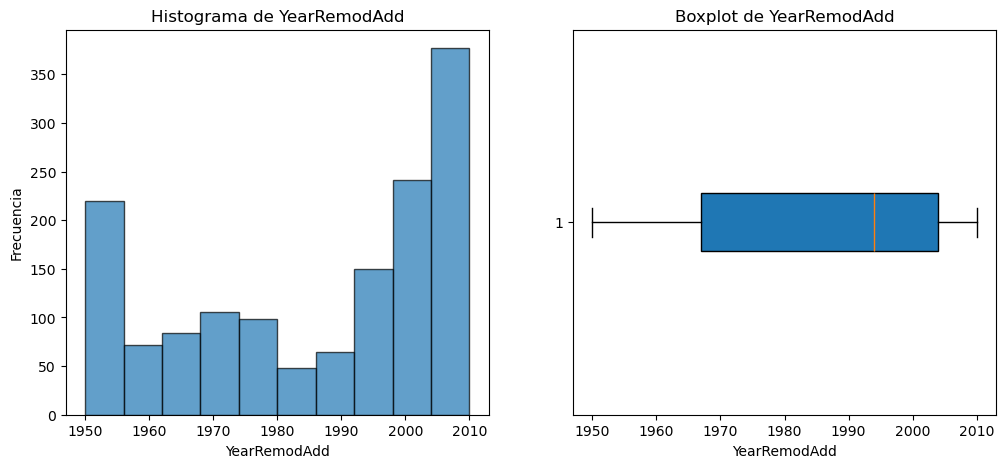

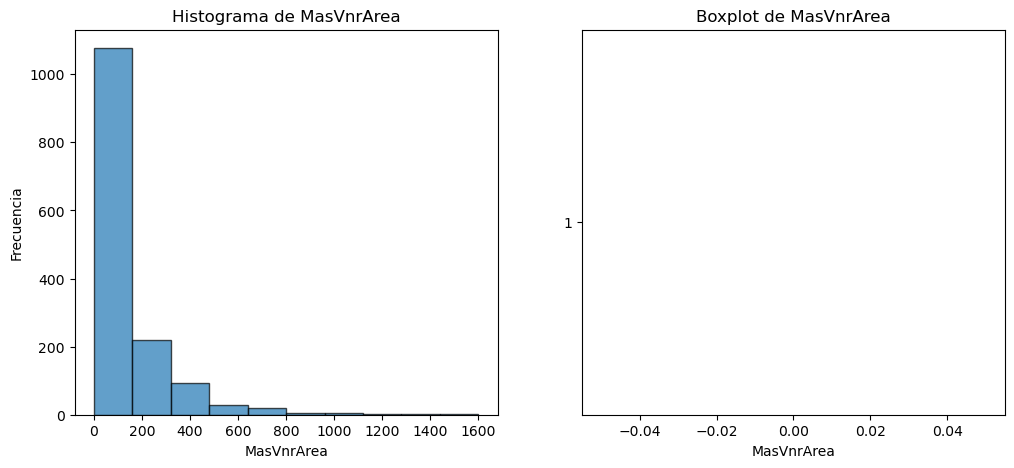

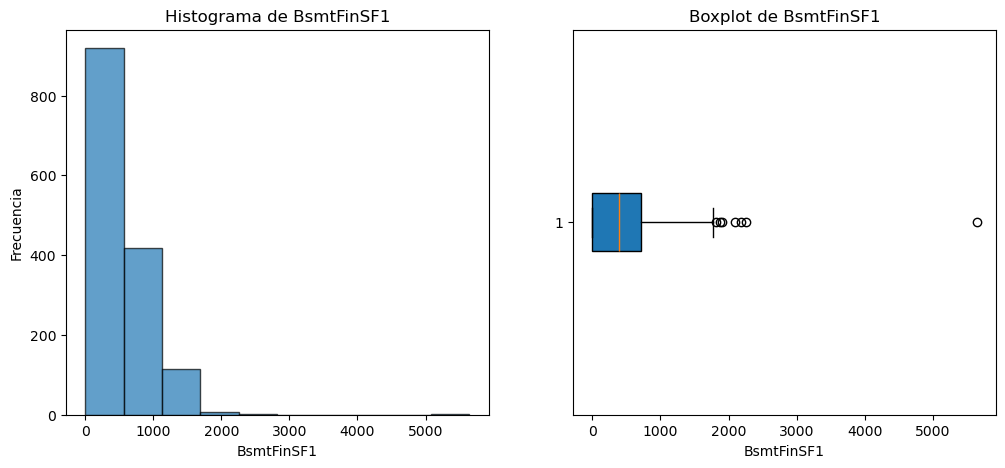

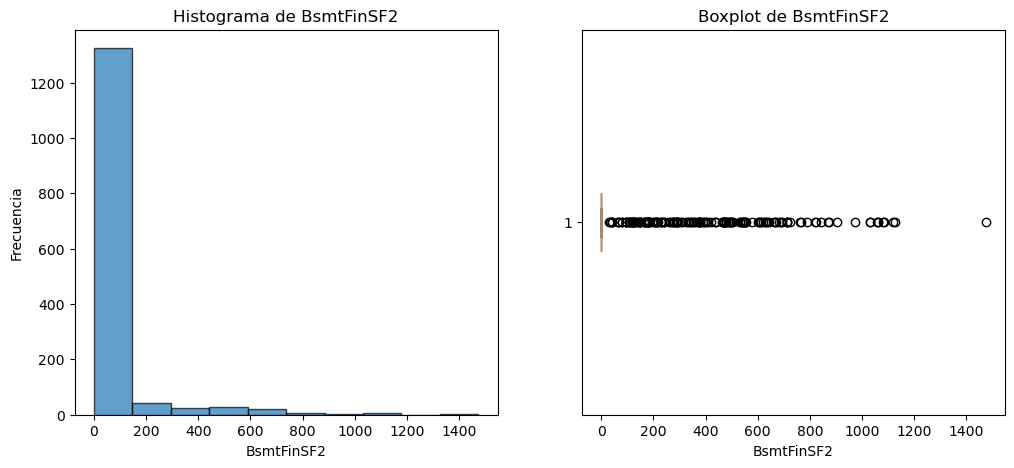

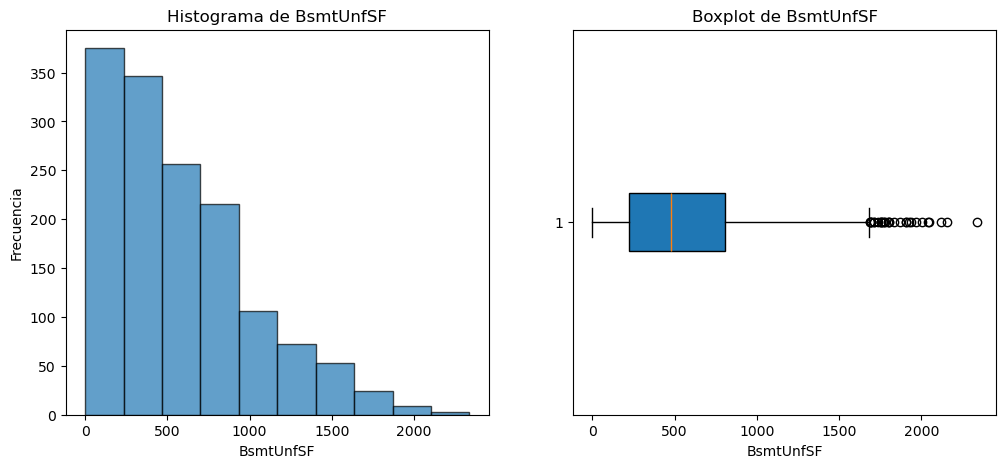

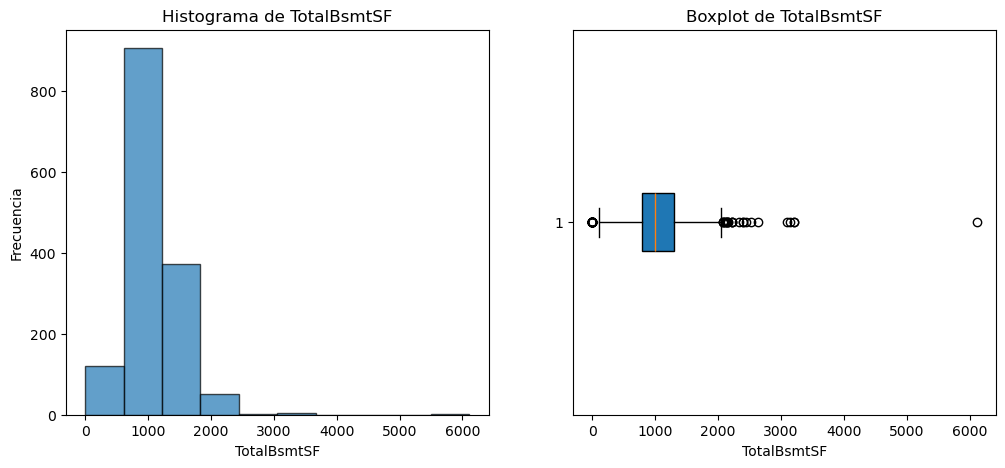

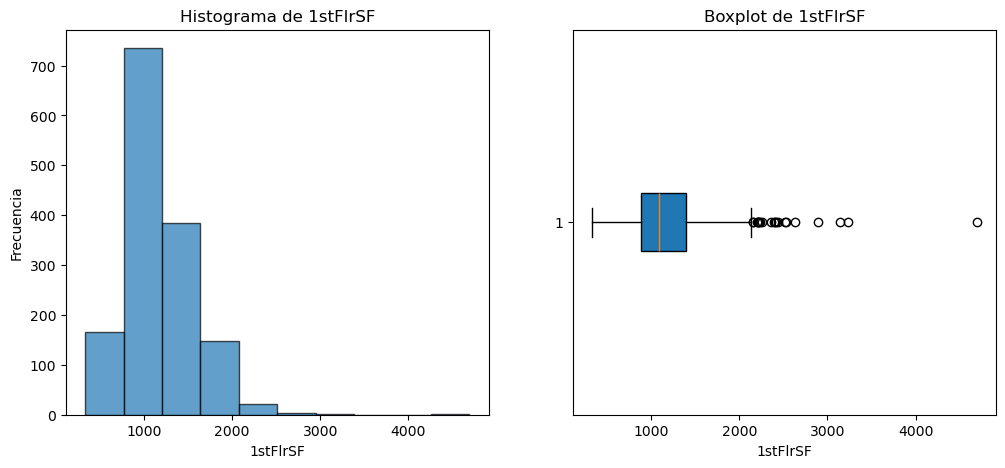

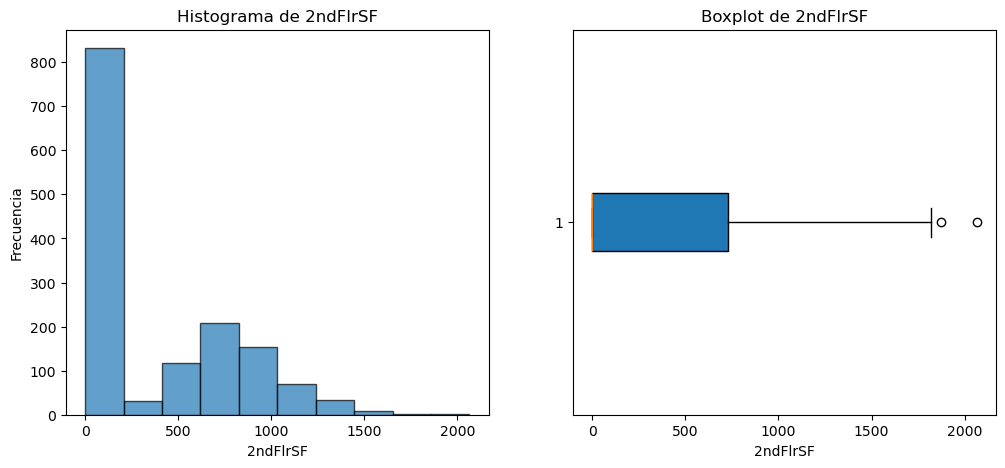

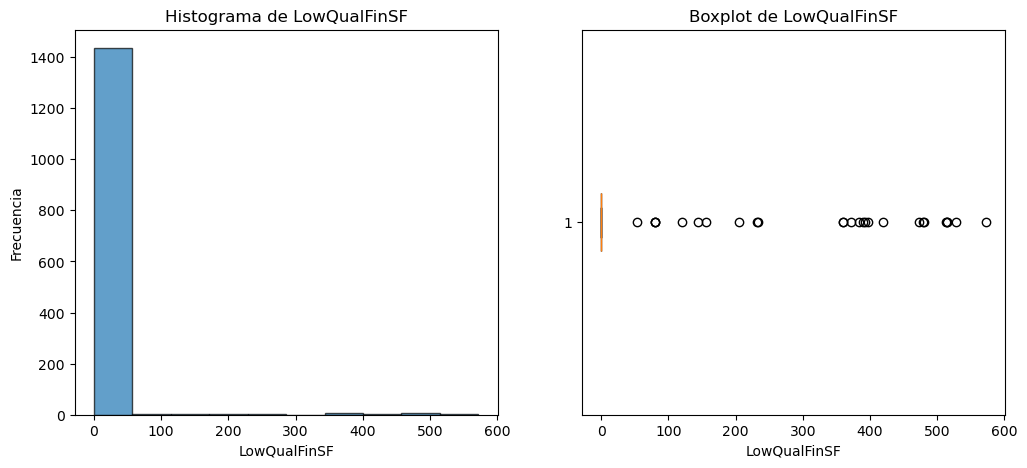

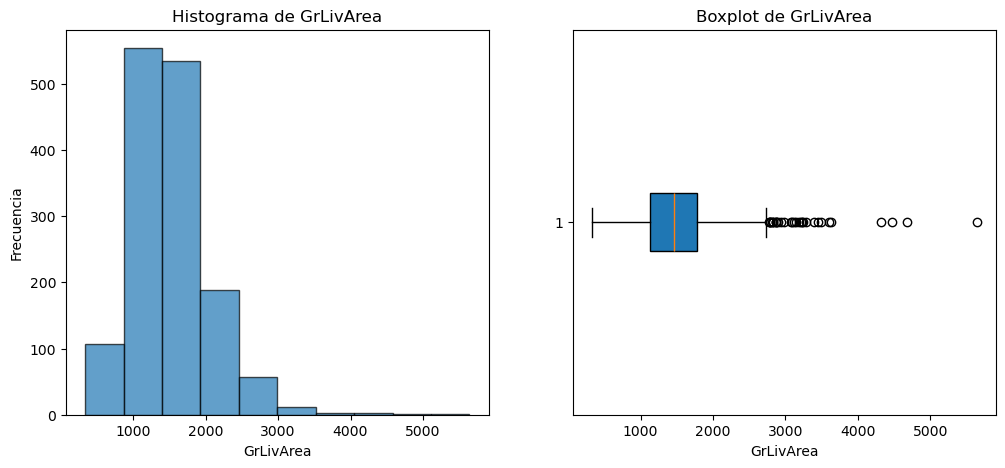

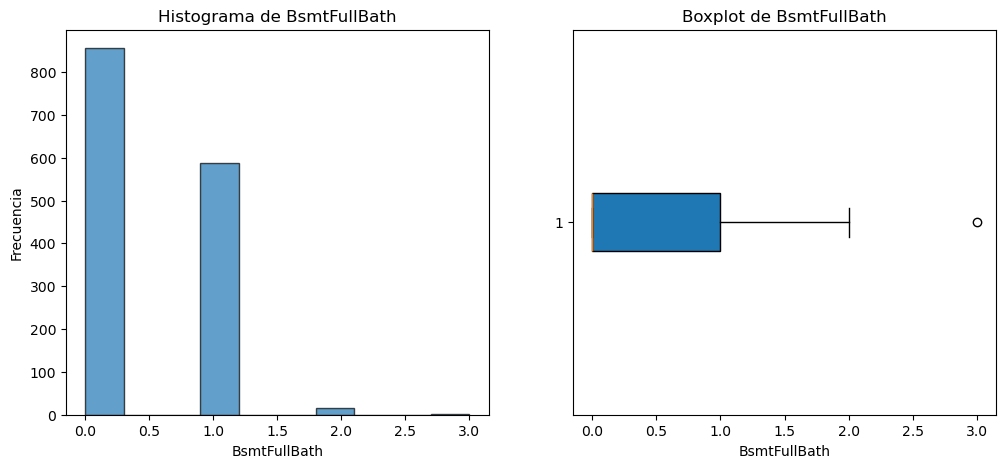

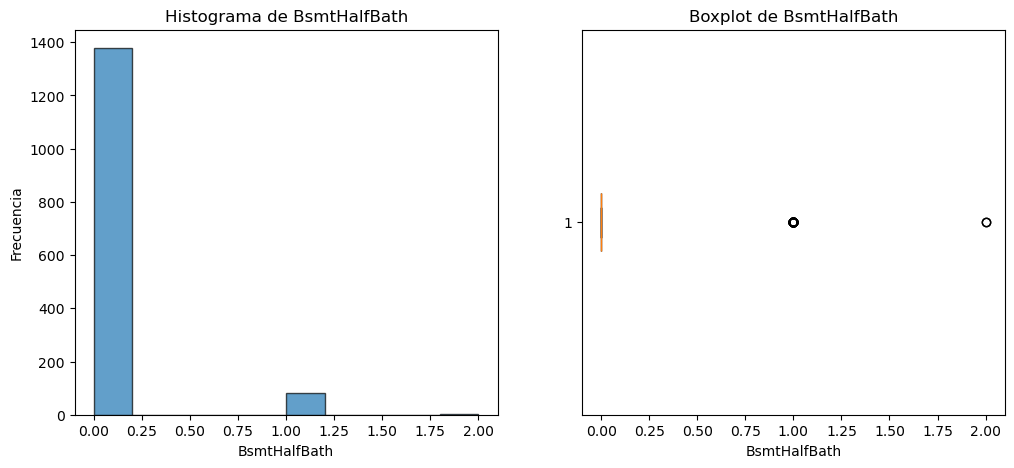

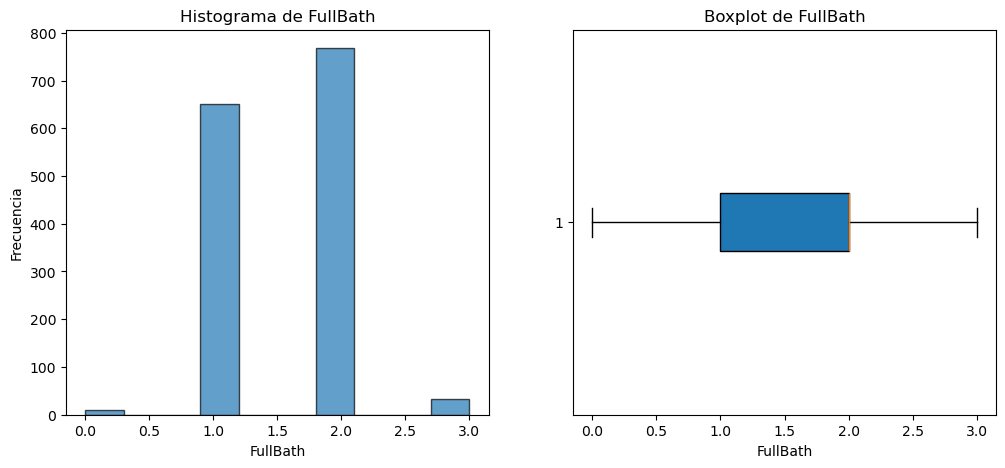

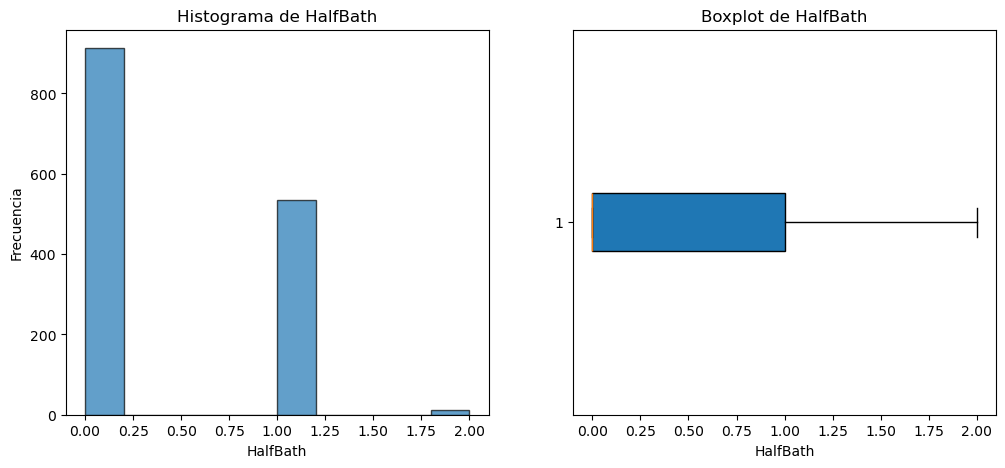

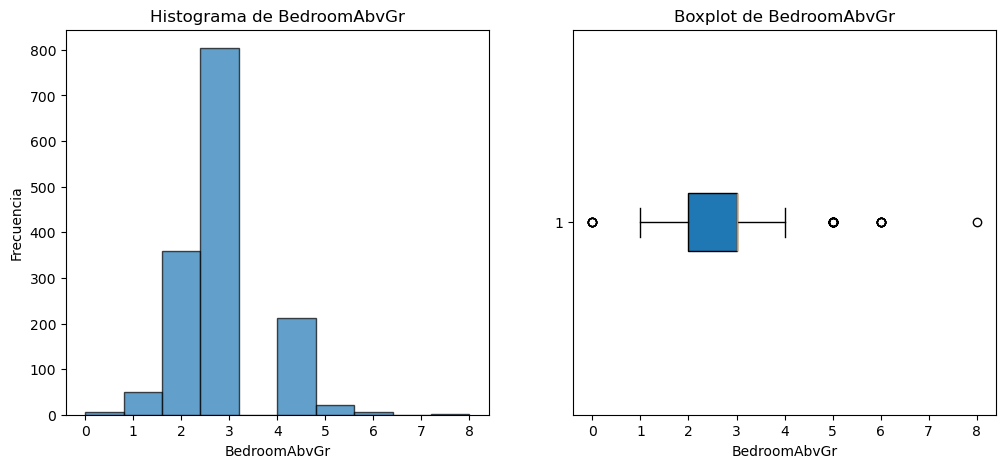

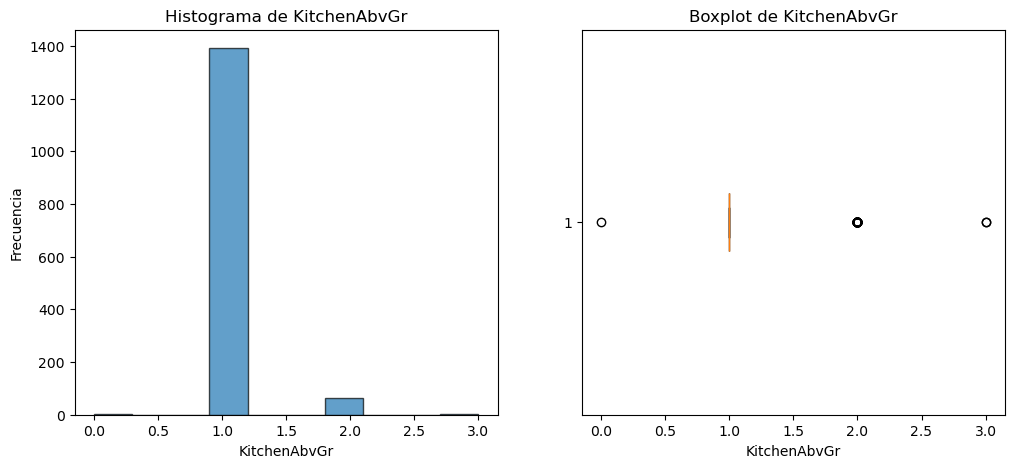

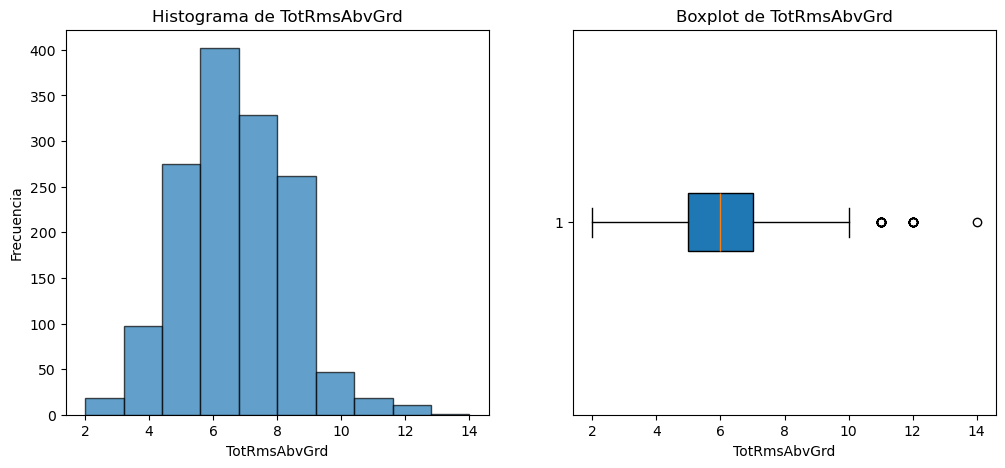

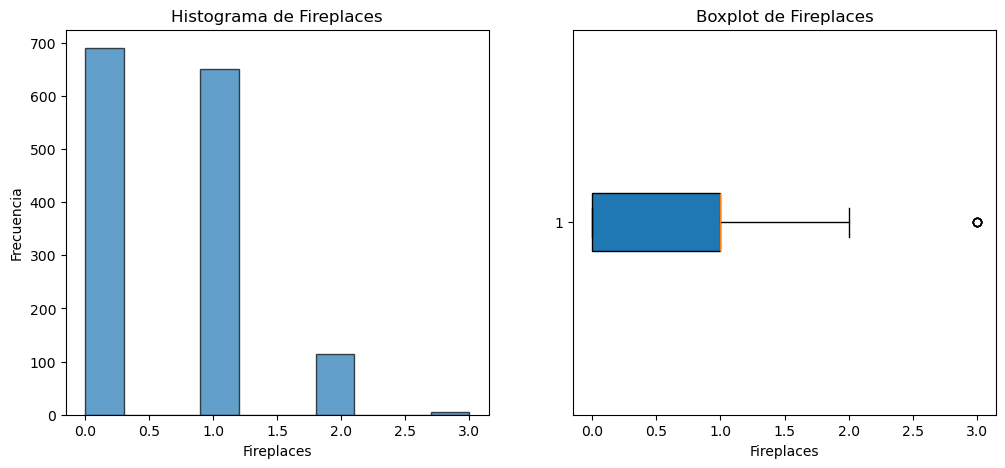

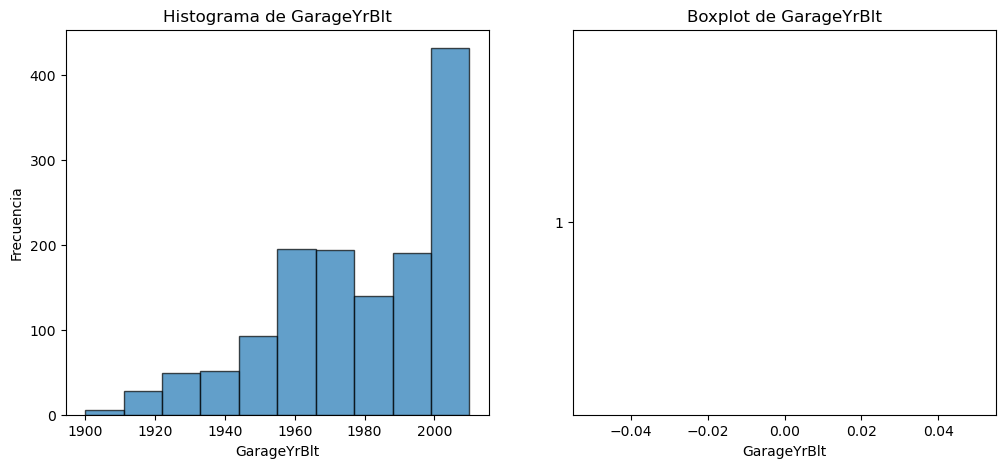

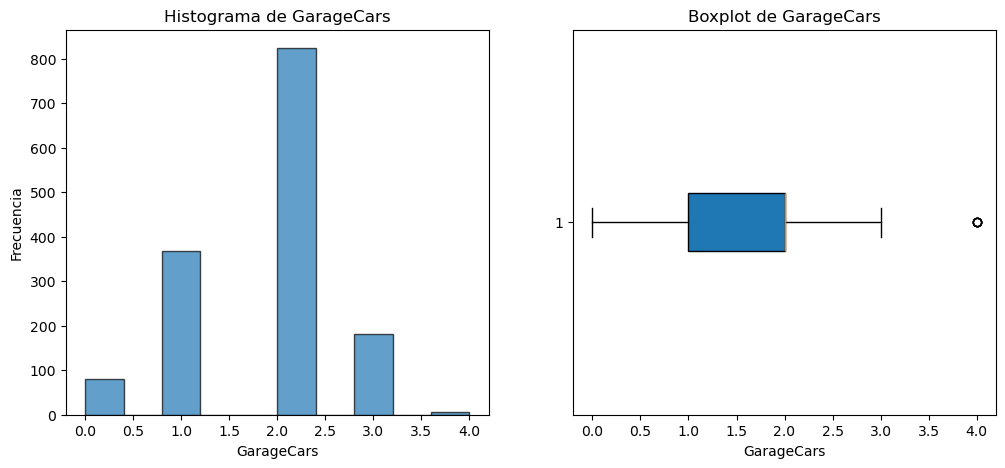

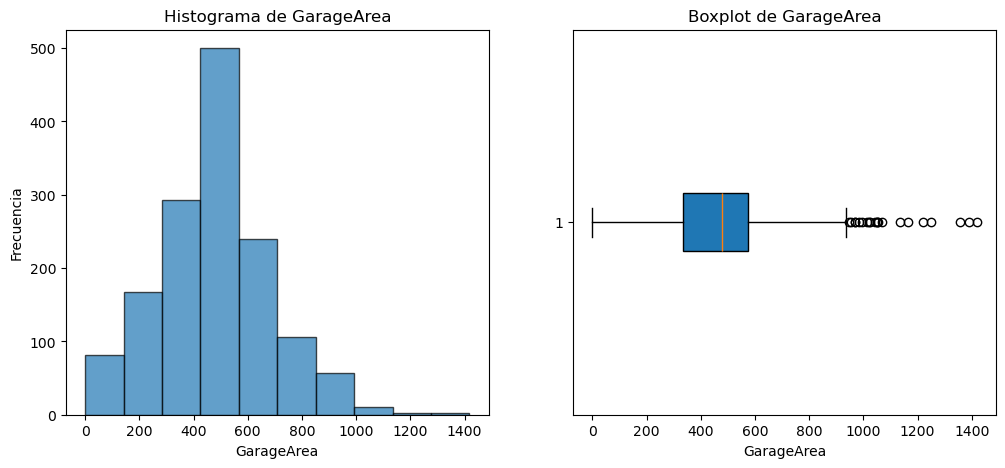

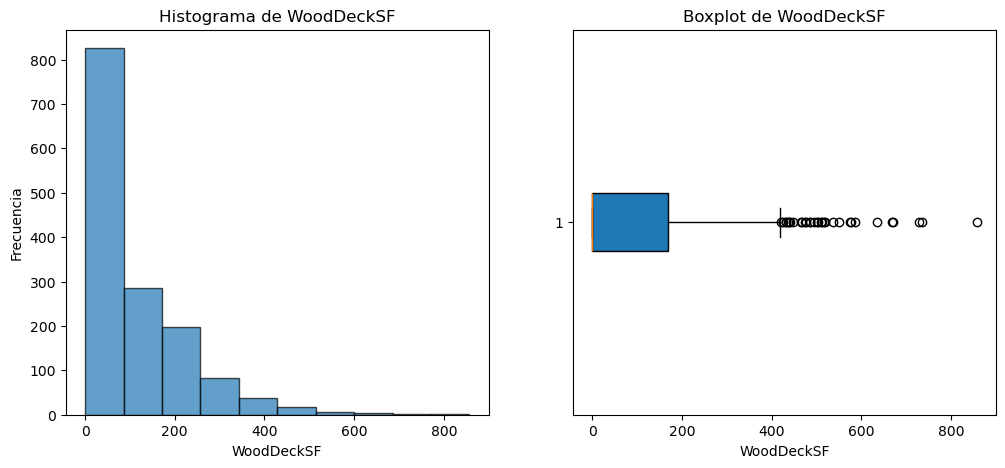

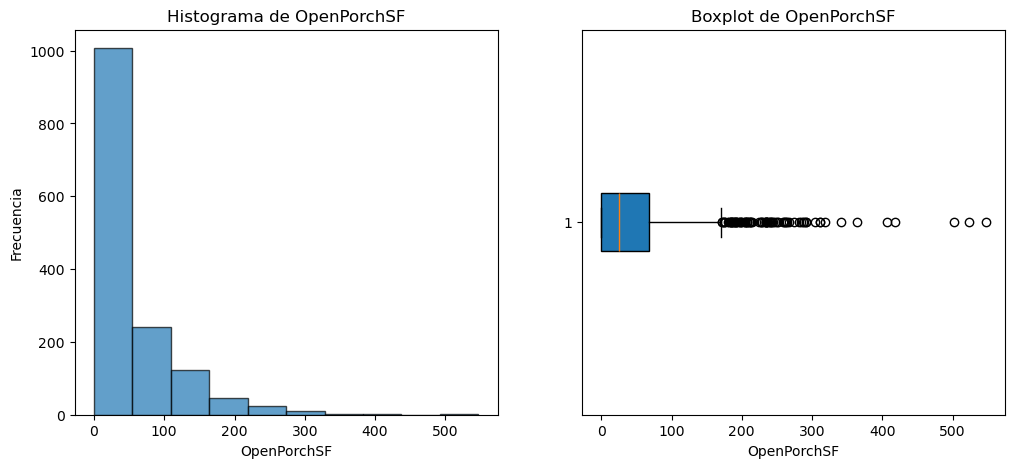

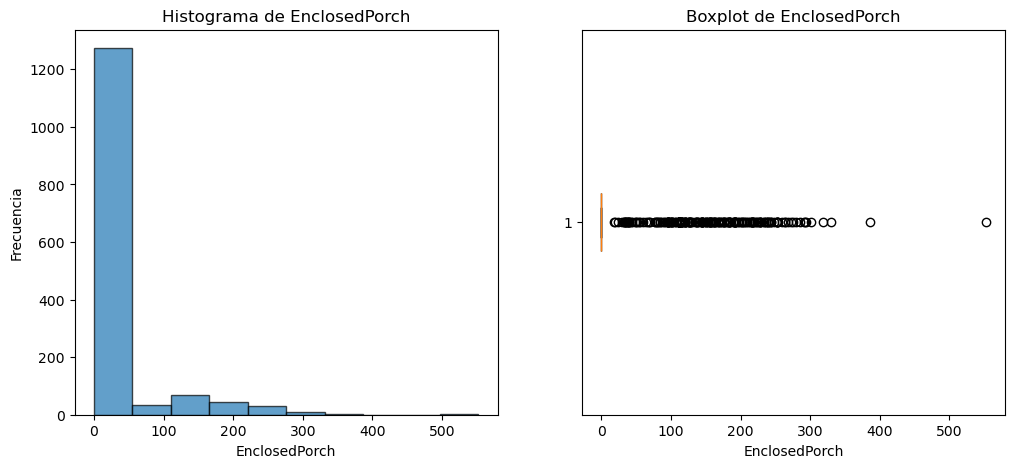

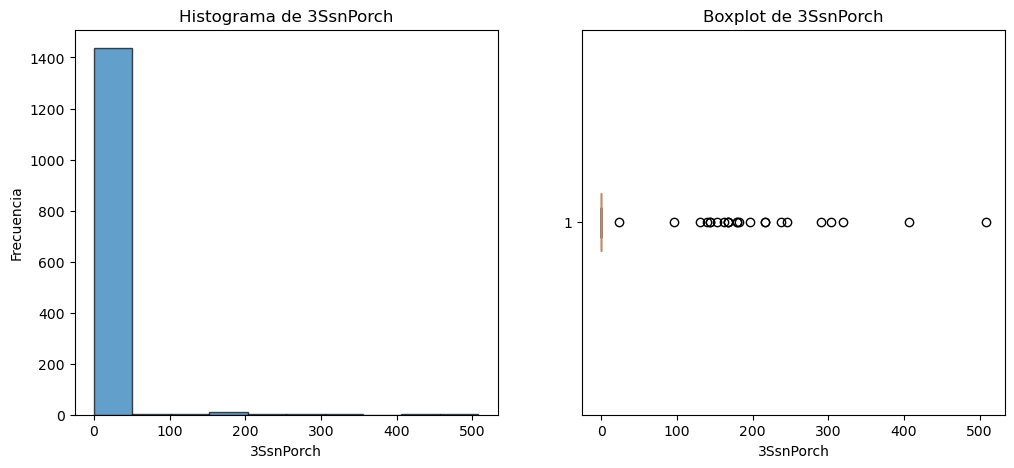

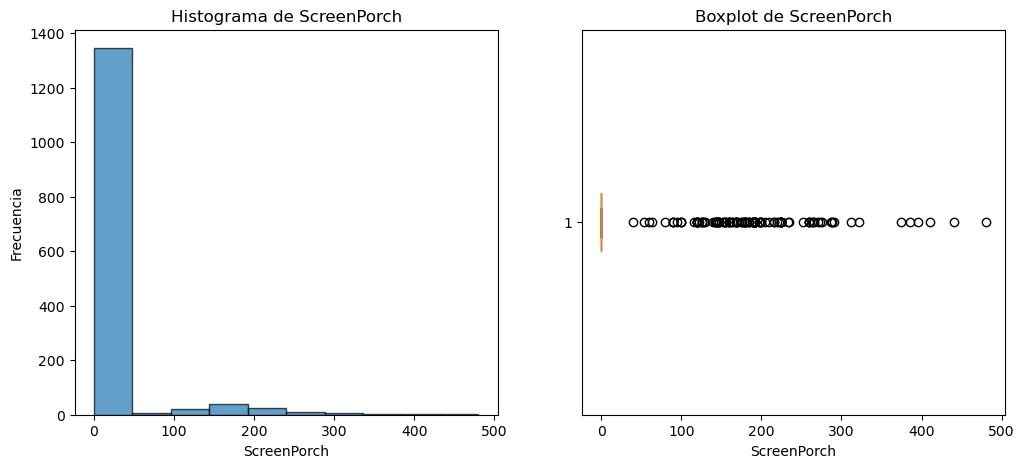

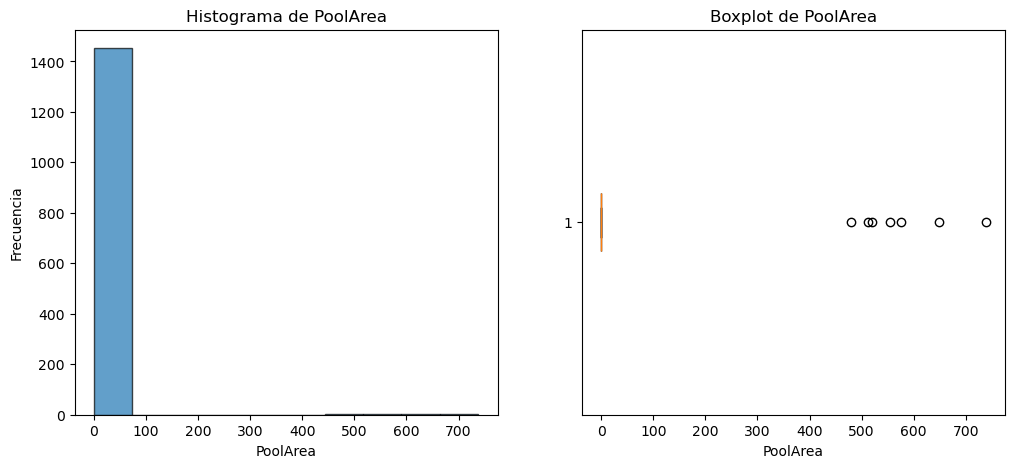

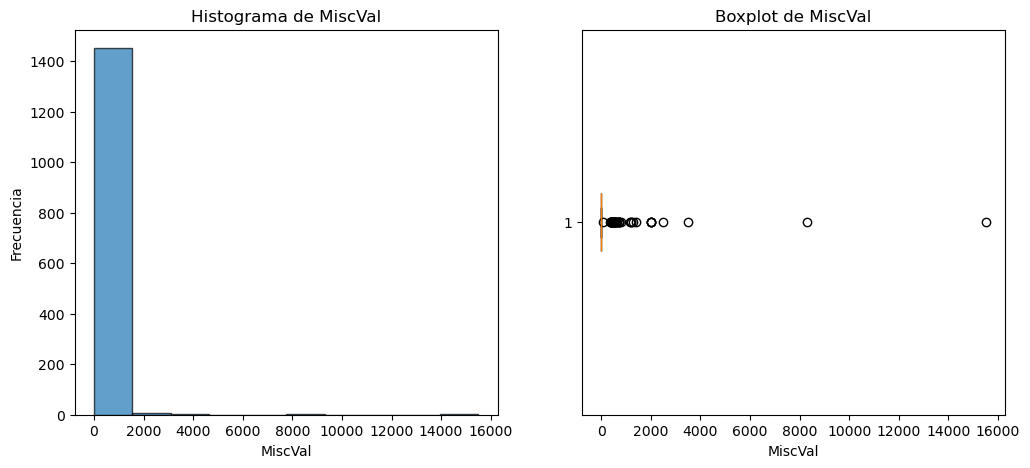

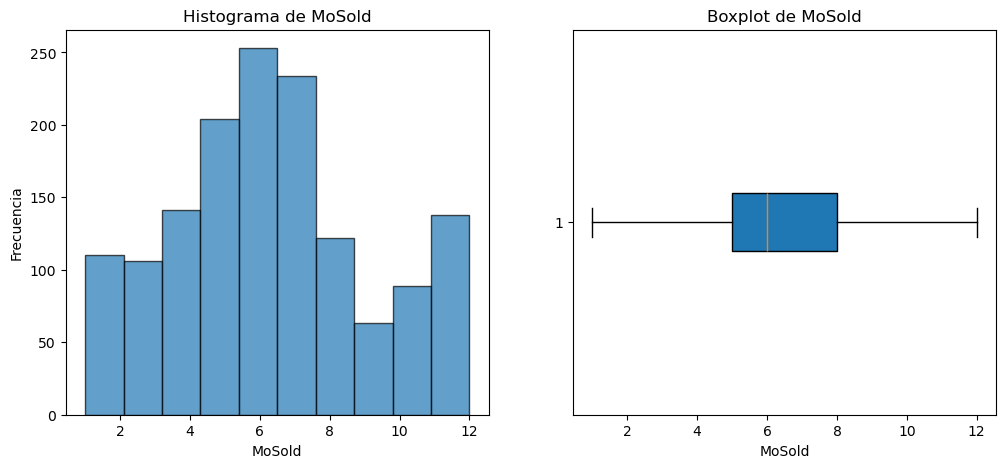

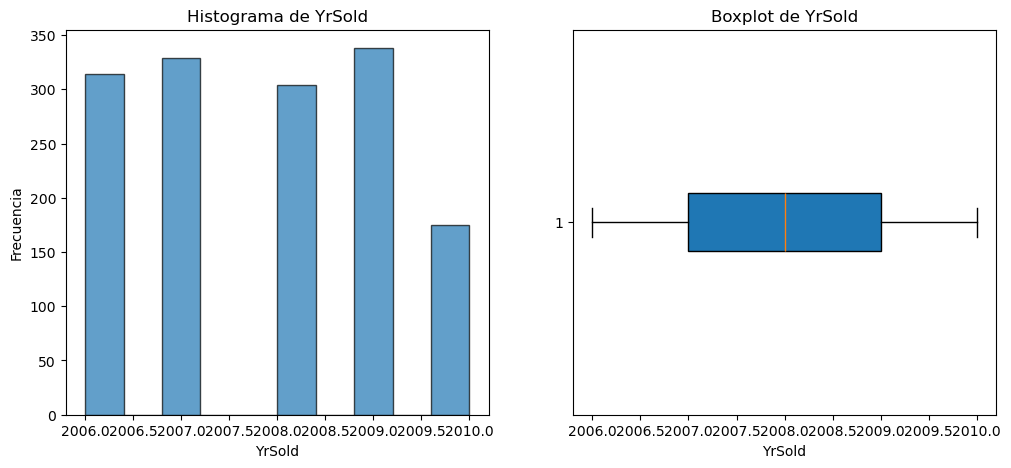

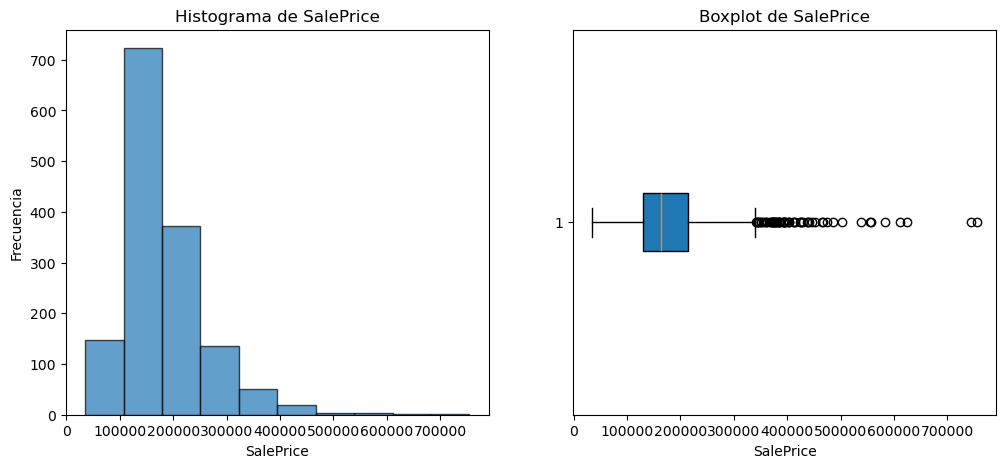

In [11]:
from scipy.stats import gaussian_kde

df_numerical_columns = df.select_dtypes(include=['number']).columns

df_only_numerical = df[df_numerical_columns]
df_only_numerical.to_csv(r"C:\Users\franc\Desktop\ML_IoT\df_only_numerical.csv",sep=',', index=False)
df_only_numerical.shape

## Histogramas y boxplots

for col in df_numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    #Histogramas
    axes[0].hist(df[col], bins=10, edgecolor='black', alpha=0.7)
    axes[0].set_title(f'Histograma de {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frecuencia')

    #Boxplot
    axes[1].boxplot(df[col], vert=False, patch_artist=True)
    axes[1].set_title(f'Boxplot de {col}')
    axes[1].set_xlabel(col)

plt.show()

### Tabla Skewness - kurtosis - Outliers

In [13]:
import scipy.stats as stats

summary_stats = df_only_numerical.describe().T

#  Skewness y kurtosis
summary_stats["Skewness"] = df_only_numerical.skew()
summary_stats["kurtosis"] = df_only_numerical.kurt()

# Contar outliers usando la Regla de Tukey (IQR)
Q1 = df_only_numerical.quantile(0.25)
Q3 = df_only_numerical.quantile(0.75)

IQR  = Q3 - Q1

outliers = ((df_only_numerical < (Q1 - 1.5 * IQR)) | (df_only_numerical > (Q3 + 1.5 * IQR))).sum()

## AGREGACIÓN DE OUTLIER AL RESUMEN

summary_stats["Outliers"] = outliers

summary_stats

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max   Skewness    kurtosis  Outliers  
Id                730.5    1095.25    1460.0   0.000000   -1.200000         0  
MSSubClass         50.0      70.00     190.0   1.407657    1.580188       103  
LotFrontage        69.0      80.00     313.0   2.163569   17.452867        88  
LotArea          9478.5   11601.50  215245.0  12.207688  203.243271        69  
OverallQual         6.0       7.00      10.0   0.216944    0.096293         2  
OverallCond         5.0       6.00       9.0   0.693067    1.106413       125  
YearBuilt        1973.0    2000.00    2010.0  -0.613461   -0.439552         7  
YearRemodAdd     1994.0    2004.00    2010.0  -0.503562   -1.272245         0  
MasVnrArea          0.0     166.00    1600.0   2.669084   10.082417        96  
BsmtFinSF1        383.5     712.25    5644.0   1.685503   11.118236         7  
BsmtFinSF2          0.0       0.00    1474.0   4.255261   20.113338       167  
BsmtUnfSF         477.5     808.00    2336.0   0.920268    0.474994        29  
TotalBsmtSF       991.5    1298.25    6110.0   1.524255   13.250483        61  
1stFlrSF 

###### **1. Informe - Distribución de valores:**

Para interpretar los valores de asimetría, se suelen considerar los siguientes rangos:

 - Asimetría aproximadamente simétrica: valores entre -0.5 y 0.5.​
 - Asimetría moderada: valores entre -1 y -0.5 o entre 0.5 y 1.​
 - estadisticafacil.github.io
 - Asimetría alta: valores menores a -1 o mayores a 1.

----------------------------------------------------------------------------------------------------------------------------------------------------------

**Variables con fuerte sesgo o distribución anómala**
<br>

+ **LotAre** (superficie total de la parcela en pies $^2$ )
   - skewness(desviación) = 12.6, lo que indica un gran sesgo positivo, terrenos excepcionalmente grandes que pueden distorsionar el análisis.
   - Se podría aplicar una transformación logarítmica para normalizar la distribución
    <br>
    <br>
+ **LotFrontage**(fachada  del lote en pies)
   - skewness = 2.16, sesgo positivo, menos extremo que en LotArea
   - Tal vez, muchas propiedades con fachadas pequeñas o pocas fachadas muy grandes
  <br>
  <br>
+ **MSSubClass**(Tipo de vivienda)
  - Es una variable categórica codificada, por lo que  distrubción se analizará como una variable categórica
 <br>
 <br>
+ **OverallQual y OverallCond**(calidad y condición general de la vivienda)
  - Son variables ordinales que representan una escala de calidad/condición

###### **2. Informe - Outliers:**

+ **BsmtFinSF2** (167 outliers)

  - Skewness alto (4.25) → Fuertemente sesgada.
  - Muchos valores son 0, lo que sugiere que muchas casas no tienen un área de sótano acabada.
  - Posible acción: Tratar los 0 como una categoría separada o aplicar transformación logarítmica.
<br>

+ **EnclosedPorch** (208 outliers)

  - Sesgo alto (3.09), kurtosis alta (10.43).
  - La mayoría de las casas no tienen porches cerrados.
  - Posible acción: Verificar si estos valores atípicos afectan SalePrice, considerar binarizar (tiene/no tiene).
<br>

+ **ScreenPorch** (116 outliers)

  - Sesgo muy alto (4.12), kurtosis alta (18.43).
  - Como EnclosedPorch, la mayoría de las casas no tienen porches con malla.
  - Posible acción: Similar a EnclosedPorch, tratar como binaria o transformar.
<br>

+ **MSSubClass** (103 outliers)

  - Es una variable categórica codificada numéricamente.
  - No es un outlier en términos de distribución continua.
  - Posible acción: Tratar como categórica en lugar de numérica.
<br>

+ **OverallCond** (125 outliers)

  - Sesgo bajo (0.69), pero muchas observaciones en valores extremos.
  - Se podría dejar como está o agrupar algunas categorías.

###### **3. Informe - Rango de valores:**

**variables con mayor variación absoluta en valores:**


+ SalePrice → Rango: 720,100 

    - Confirmado como altamente variable y con sesgo positivo.
<br>

+ LotArea → Rango: 213,945

    - Tiene terrenos extremadamente grandes en comparación con otros.
<br>

+ MiscVal → Rango: 15,500

    - Representa valores de características extra (cocheras, piscinas, etc.).
    - Muchos valores son 0, lo que sugiere que en la mayoría de las casas no aplica.
<br>

+ TotalBsmtSF → Rango: 6,110

    - Tamaño del sótano total, lo que indica casas con sótanos grandes vs. sin sótano.
<br>

+ BsmtFinSF1 → Rango: 5,644

    - Similar a TotalBsmtSF, pero solo para áreas terminadas.

#### Transformaciones de variables con mayor sesgo

In [21]:
# Copia del dataset numérico para aplicar modificaciones
df_numerical_modified = df_only_numerical.copy()

# Aplicar modificaciones según cada variable

##BsmtFinSF2 Convertir en categórica: "NoBsmtFinSF2" si es 0
df_numerical_modified["BsmtFinSF2_Cat"] = df_numerical_modified["BsmtFinSF2"].apply(lambda x: "NoBsmtFinSF2" if x == 0 else "HasBsmtFinSF2")

##EnclosedPorch Convertir en binaria
df_numerical_modified["TieneEnclosedPorch"] = df_numerical_modified["EnclosedPorch"].apply(lambda x: 1 if x > 0 else 0)

##ScreenPorch Convertir en binaria
df_numerical_modified["TieneScreenPorch"] = df_numerical_modified["ScreenPorch"].apply(lambda x: 1 if x > 0 else 0)

##MSSubClass Convertir en categórica
df_numerical_modified["MSSubClass"] = df_numerical_modified["MSSubClass"].astype(str)


df_numerical_modified

Id MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1         60         65.0     8450            7            5   
1        2         20         80.0     9600            6            8   
2        3         60         68.0    11250            7            5   
3        4         70         60.0     9550            7            5   
4        5         60         84.0    14260            8            5   
...    ...        ...          ...      ...          ...          ...   
1455  1456         60         62.0     7917            6            5   
1456  1457         20         85.0    13175            6            6   
1457  1458         70         66.0     9042            7            9   
1458  1459         20         68.0     9717            5            6   
1459  1460         20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  3SsnPorch  \
0          2003          2003       196.0         706  ...          0   
1          1976          1976         0.0         978  ...          0   
2          2001          2002       162.0         486  ...          0   
3          1915          1970         0.0         216  ...          0   
4          2000          2000       350.0         655  ...          0   
...         ...           ...         ...         ...  ...        ...   
1455       1999          2000         0.0           0  ...          0   
1456       1978          1988       119.0         790  ...          0   
1457       1941          2006         0.0         275  ...          0   
1458       1950          1996         0.0          49  ...          0   
1459       1965          1965         0.0         830  ...          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0               0         0        0       2    2008     208500   
1               0         0        0       5    2007     181500   
2               0         0        0       9    2008     223500   
3               0         0        0       2    2006     140000   
4               0         0        0      12    2008     250000   
...           ...       ...      ...     ...     ...        ...   
1455            0         0        0       8    2007     175000   
1456            0         0        0       2    2010     210000   
1457            0         0     2500       5    2010     266500   
1458            0         0        0       4    2010     142125   
1459            0         0        0       6    2008     147500   

      BsmtFinSF2_Cat  TieneEnclosedPorch  TieneScreenPorch  
0       NoBsmtFinSF2                   0                 0  
1       NoBsmtFinSF2                   0                 0  
2       NoBsmtFinSF2                   0                 0  
3       NoBsmtFinSF2                   1                 0  
4       NoBsmtFinSF2                   0                 0  
...              ...                 ...               ...  
1455    NoBsmtFinSF2                   0                 0  
1456   HasBsmtFinSF2                   0                 0  
1457    NoBsmtFinSF2                   0                 0  
1458   HasBsmtFinSF2                   1                 0  
1459   HasBsmtFinSF2                   0                 0  

[1460 rows x 41 columns]

#### transformación logarítmica a LotArea

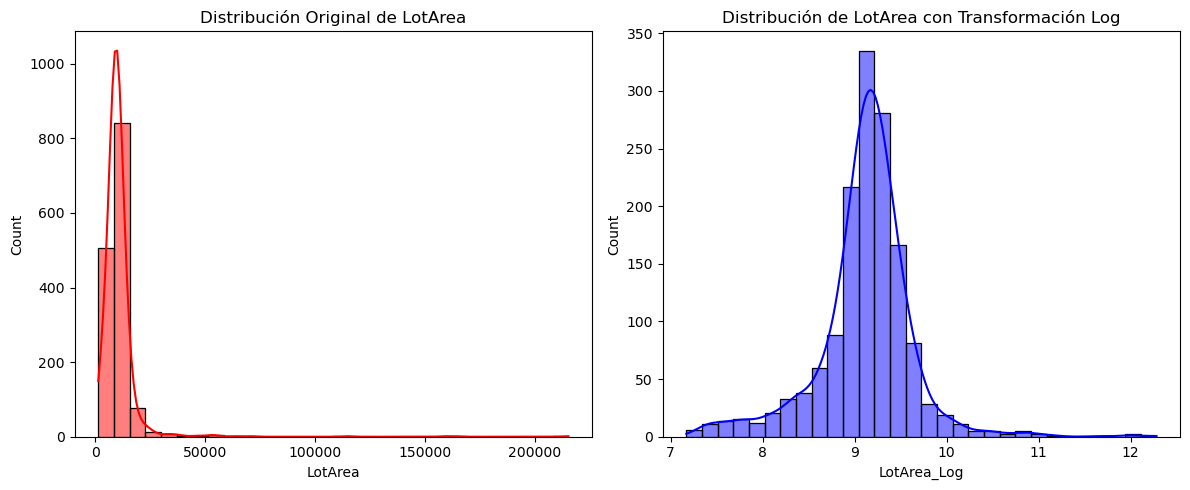

In [23]:
# log1p para manejar valores cercanos a 0
df_numerical_modified["LotArea_Log"] = np.log1p(df_numerical_modified["LotArea"])  


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma original
sns.histplot(df_numerical_modified["LotArea"], bins=30, kde=True, ax=axes[0], color="red")
axes[0].set_title("Distribución Original de LotArea")

# Histograma transformado
sns.histplot(df_numerical_modified["LotArea_Log"], bins=30, kde=True, ax=axes[1], color="blue")
axes[1].set_title("Distribución de LotArea con Transformación Log")

plt.tight_layout()
plt.show()




**Resultados clave:**

 - Se creó LotArea_Log, que contiene la versión transformada.
 - Distribución antes y después:
 - Antes: Sesgo positivo alto con valores extremos.
 - Después: Distribución más simétrica y normalizada.

**Impacto esperado en el modelo:**

* Mejor manejo de variabilidad en modelos sensibles a escalas extremas.
* Evita que valores grandes dominen el aprendizaje en algunos algoritmos.
* No afecta los modelos basados en árboles, como es nuestro caso pero mejora interpretabilidad.

In [25]:
# Imputar valores nulos en LotFrontage con la mediana
median_lotfrontage = df_numerical_modified["LotFrontage"].median()
df_numerical_modified["LotFrontage"] = df_numerical_modified["LotFrontage"].fillna(median_lotfrontage)

# Verificar que no haya valores nulos después de la imputación
missing_values_after_imputation = df_numerical_modified["LotFrontage"].isnull().sum()

missing_values_after_imputation


0

**Resultados clave**
 - Los valores nulos en LotFrontage fueron reemplazados con la mediana.
 - Ahora no hay valores faltantes en esta variable.

**Impacto en el modelo**
 - Evita pérdida de datos al eliminar filas con valores nulos.
 - Reducimos sesgo en la distribución sin distorsionar valores extremos.
 - La mediana es estable, evita la influencia de outliers.

### Variables categóricas

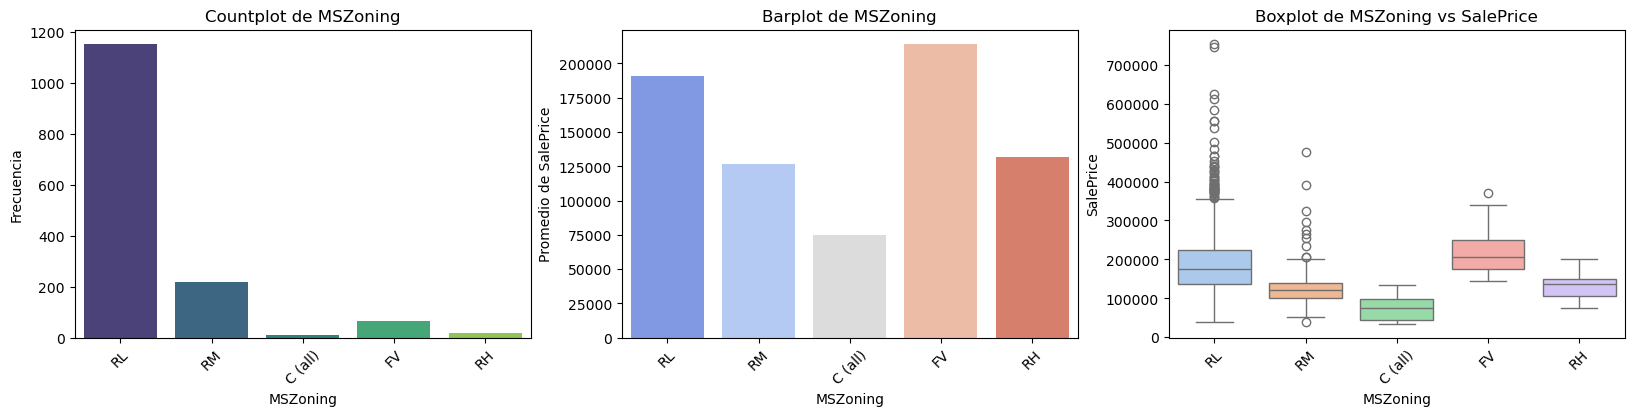

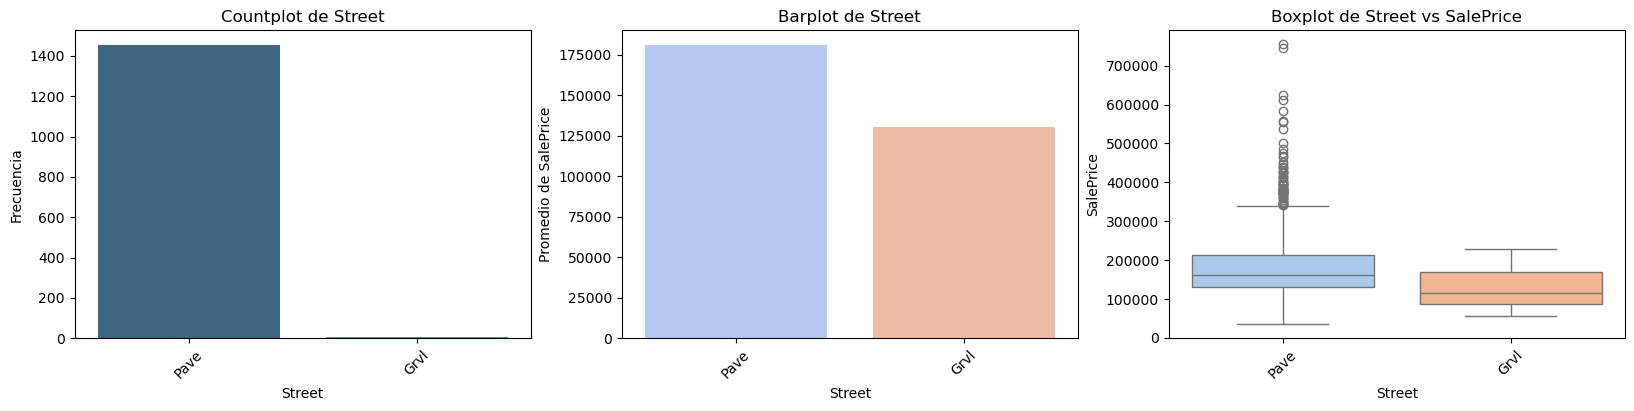

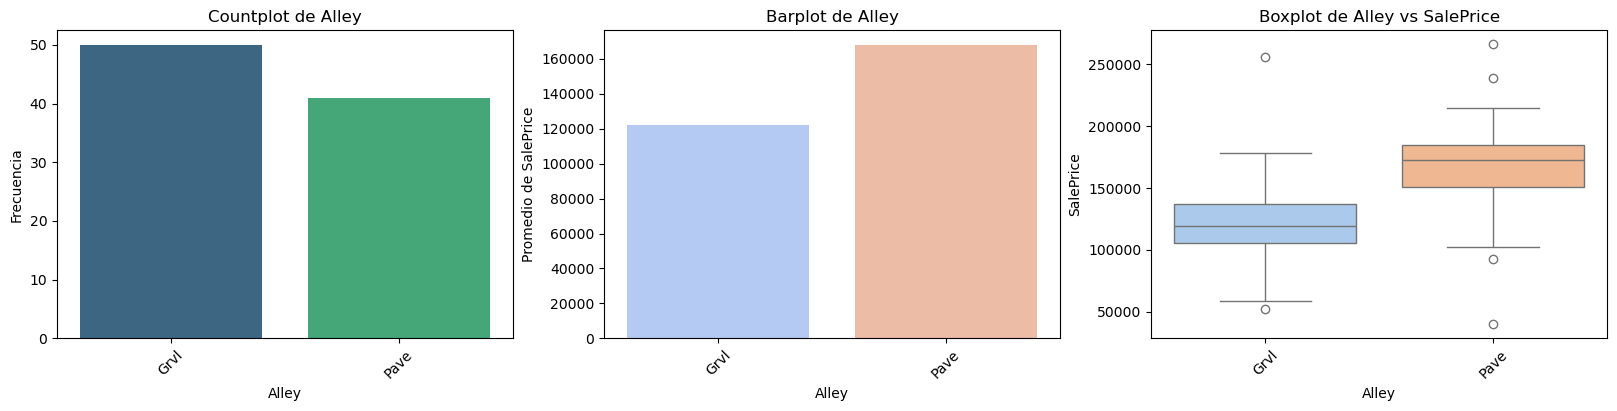

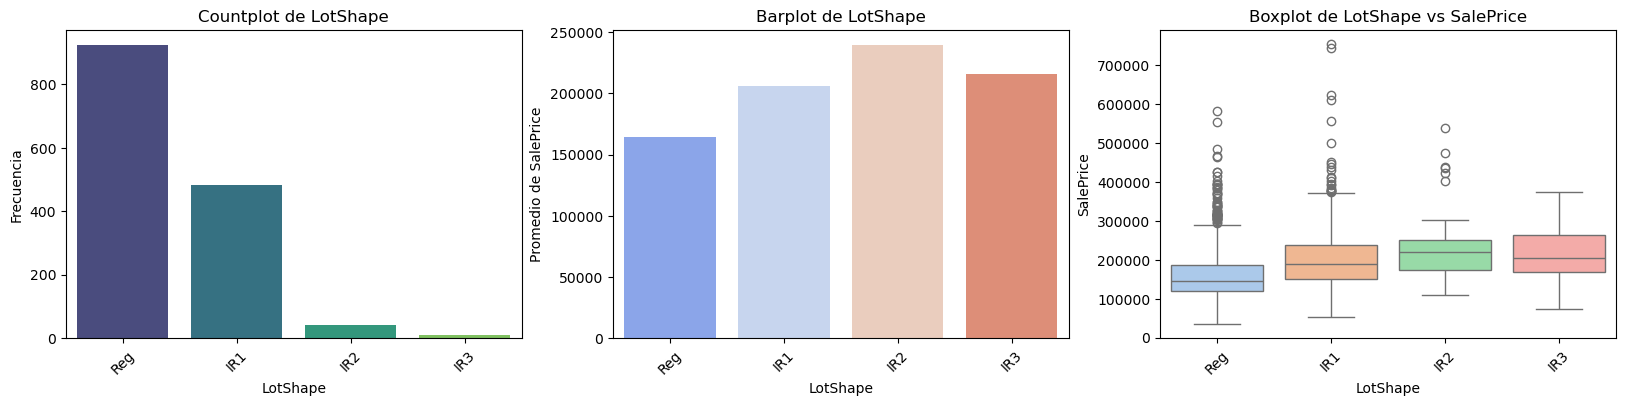

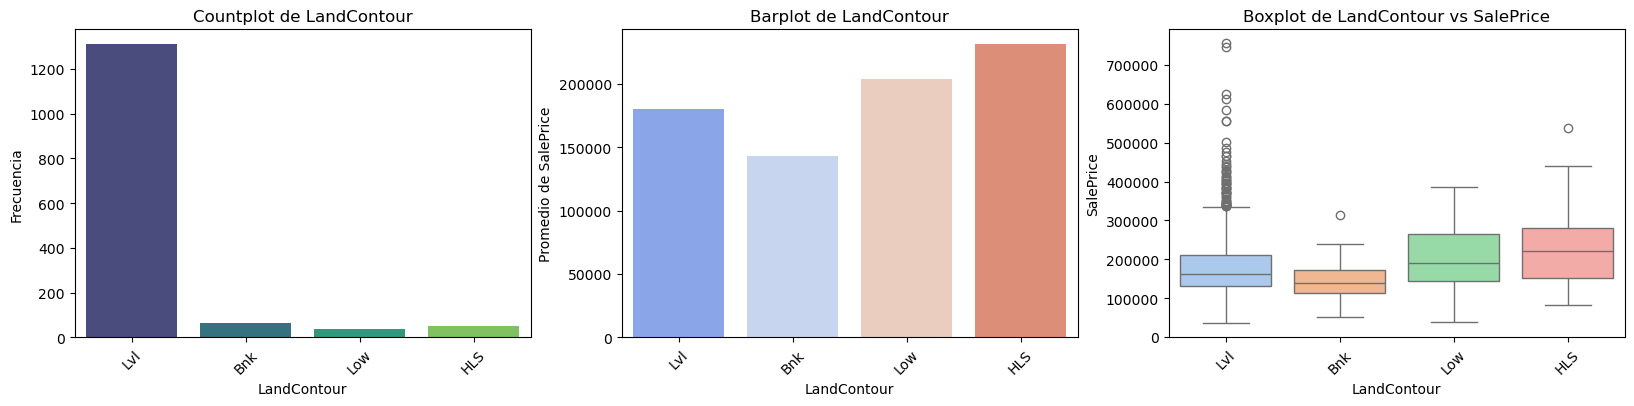

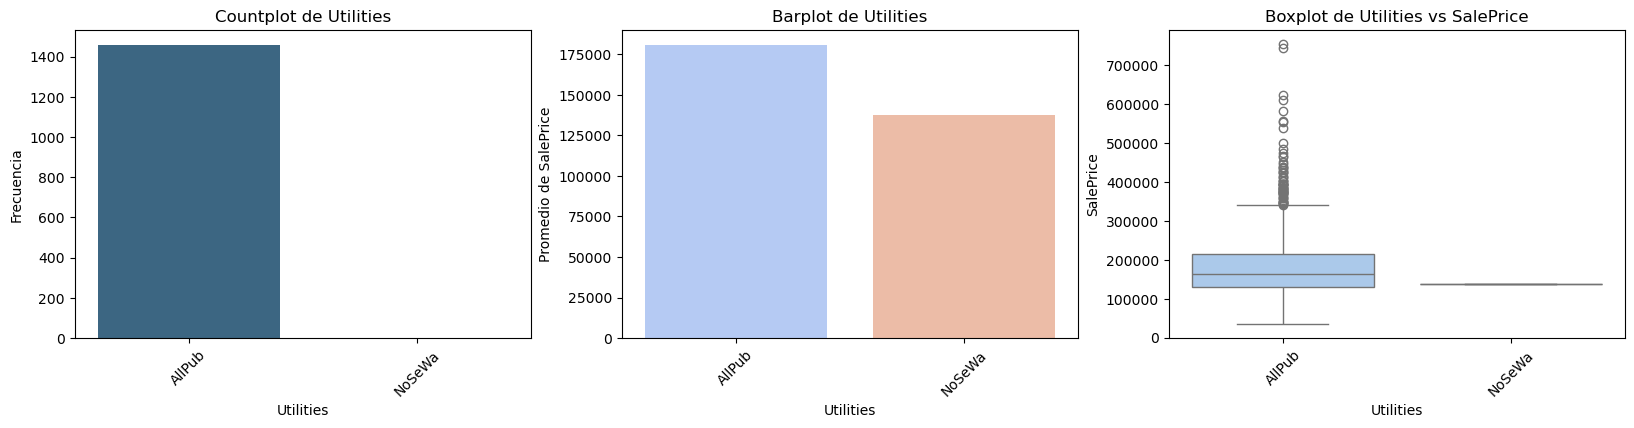

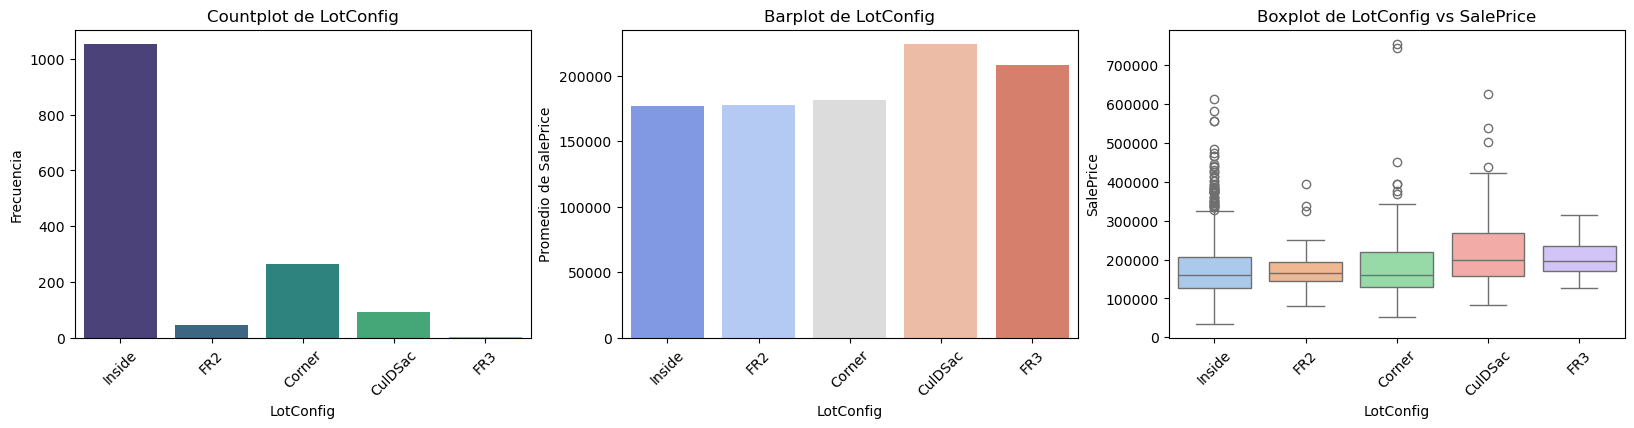

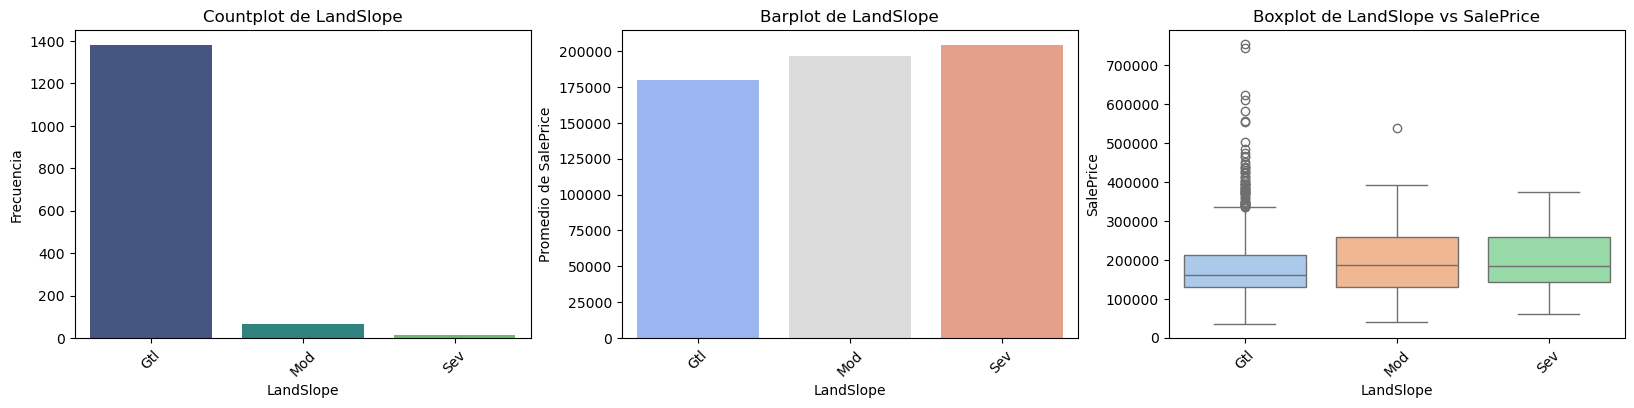

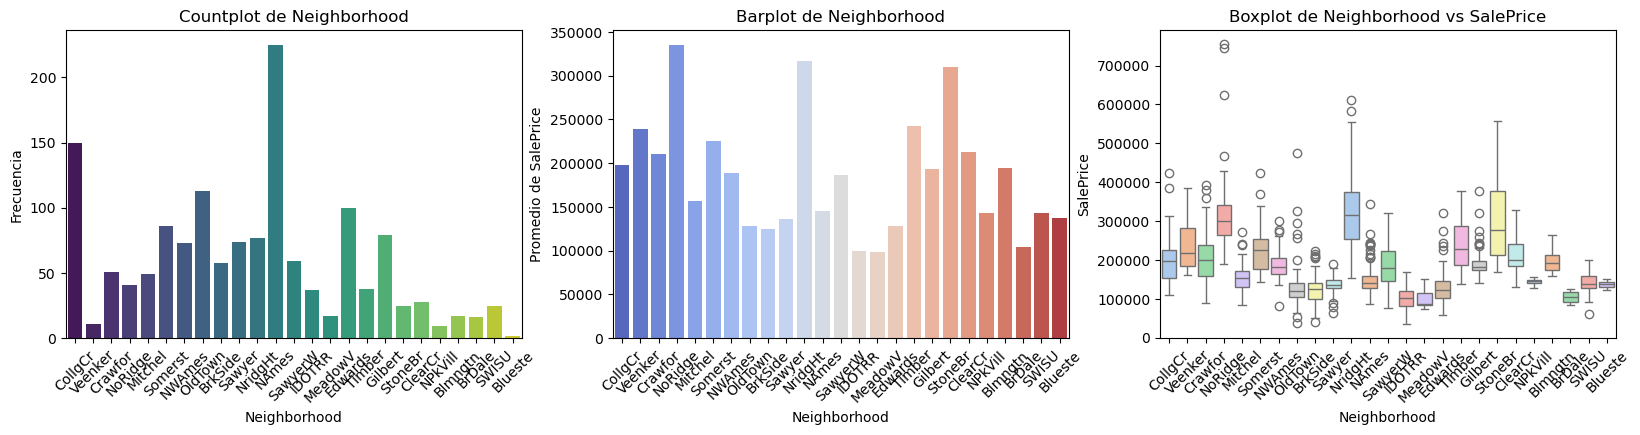

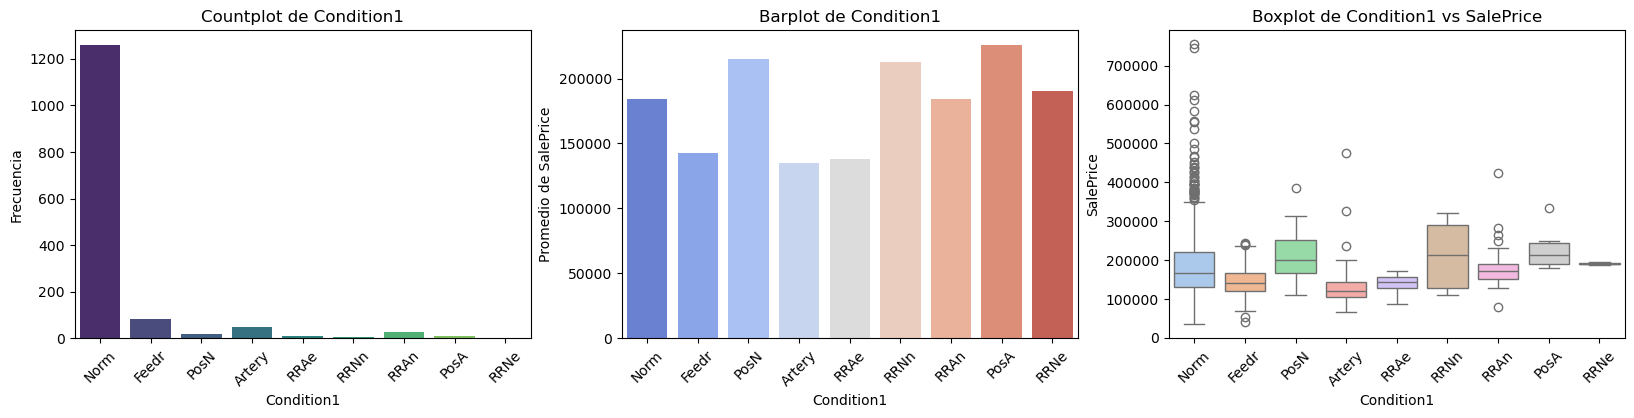

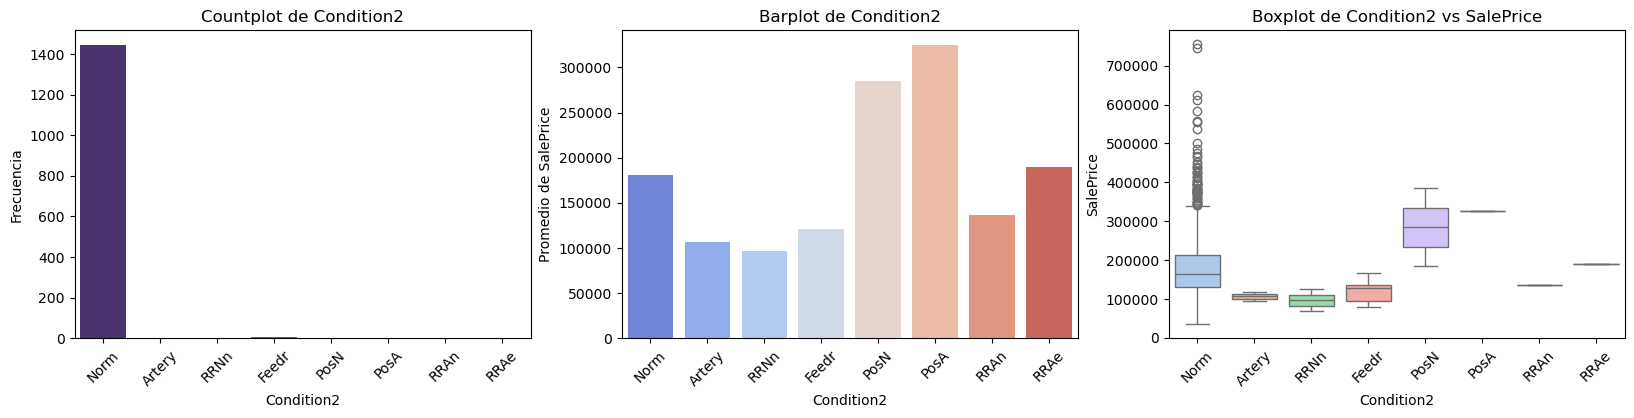

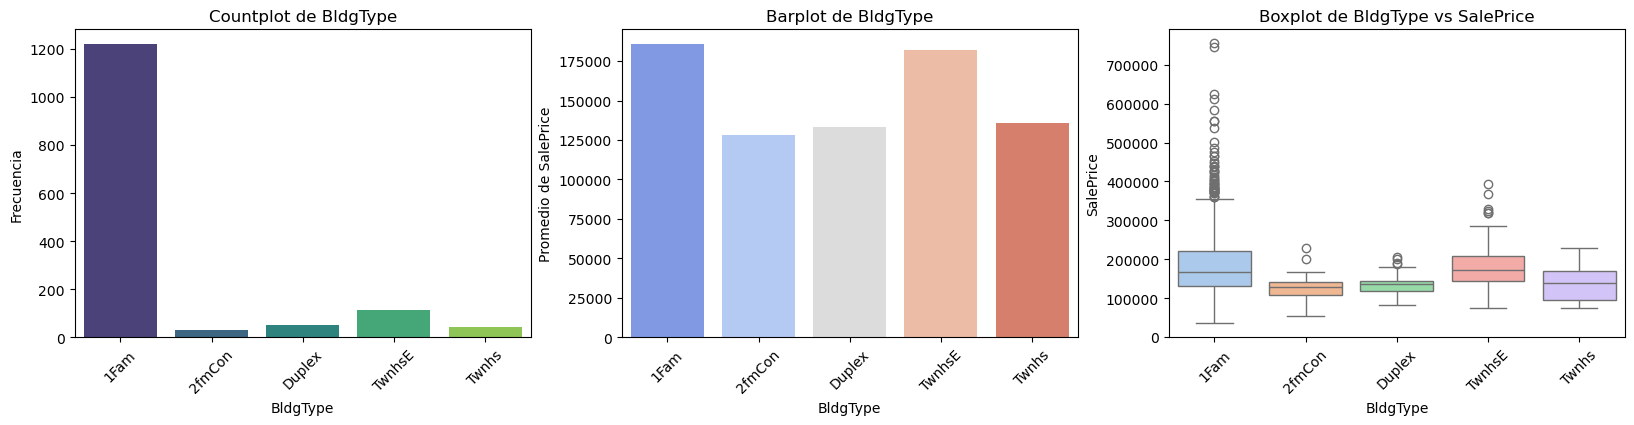

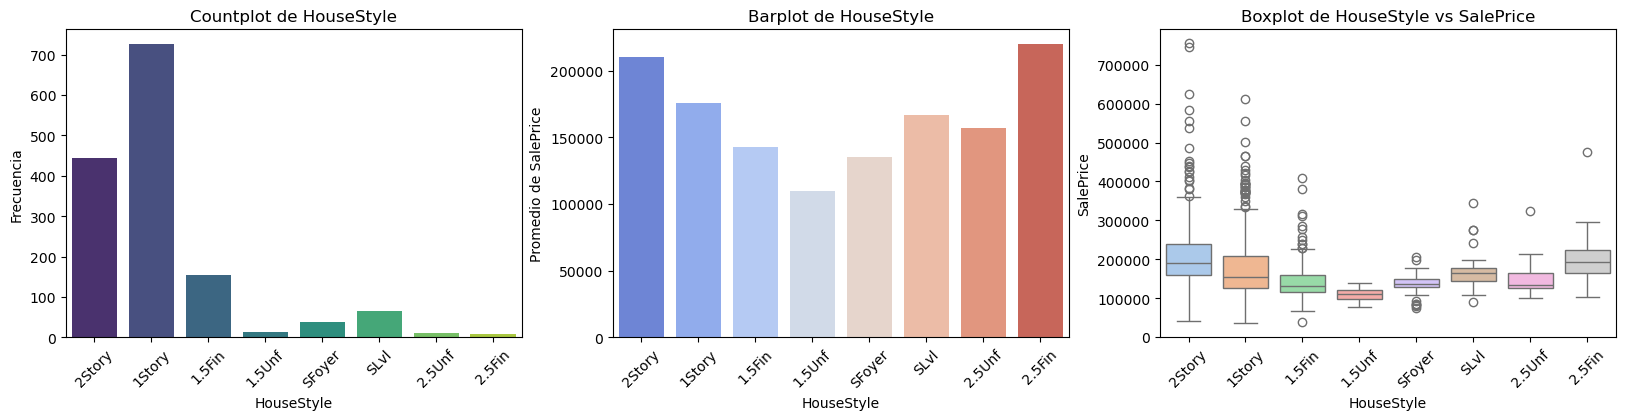

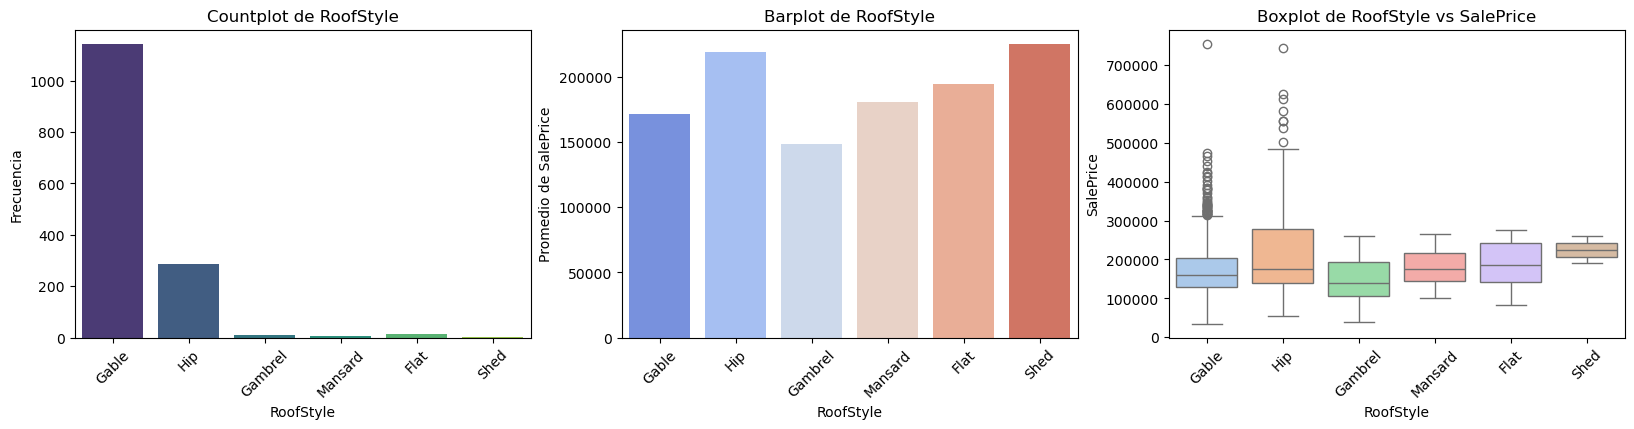

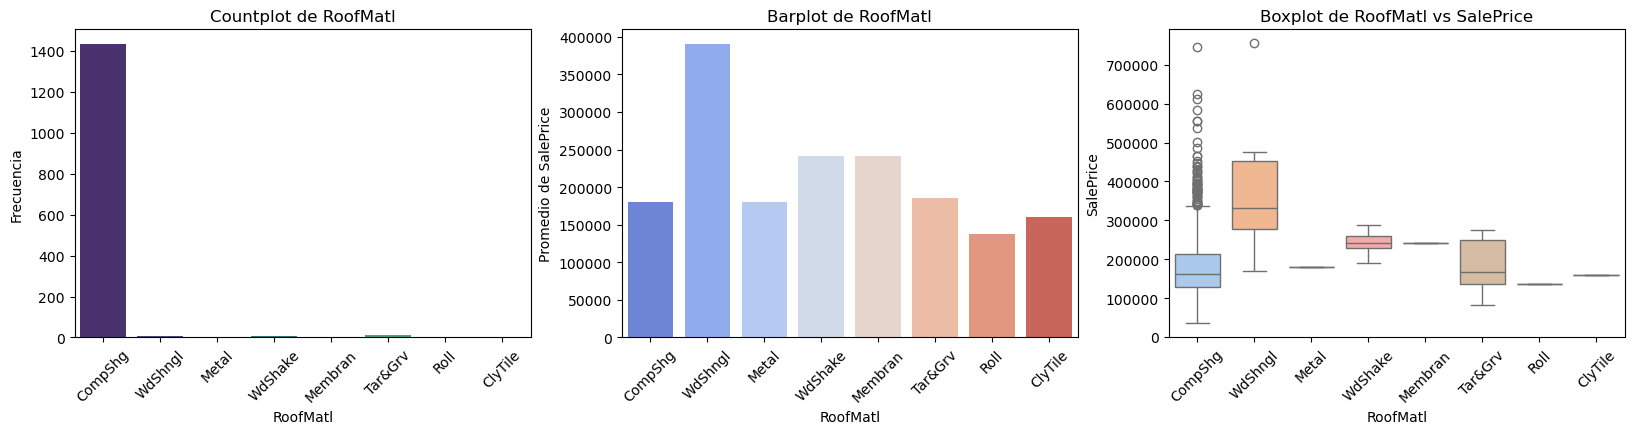

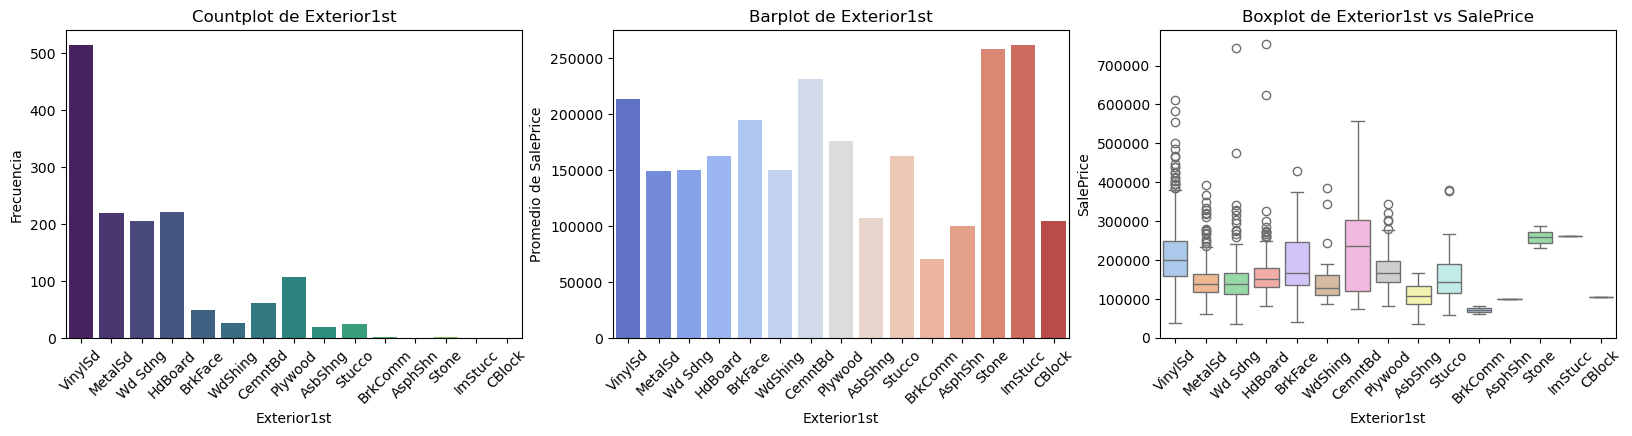

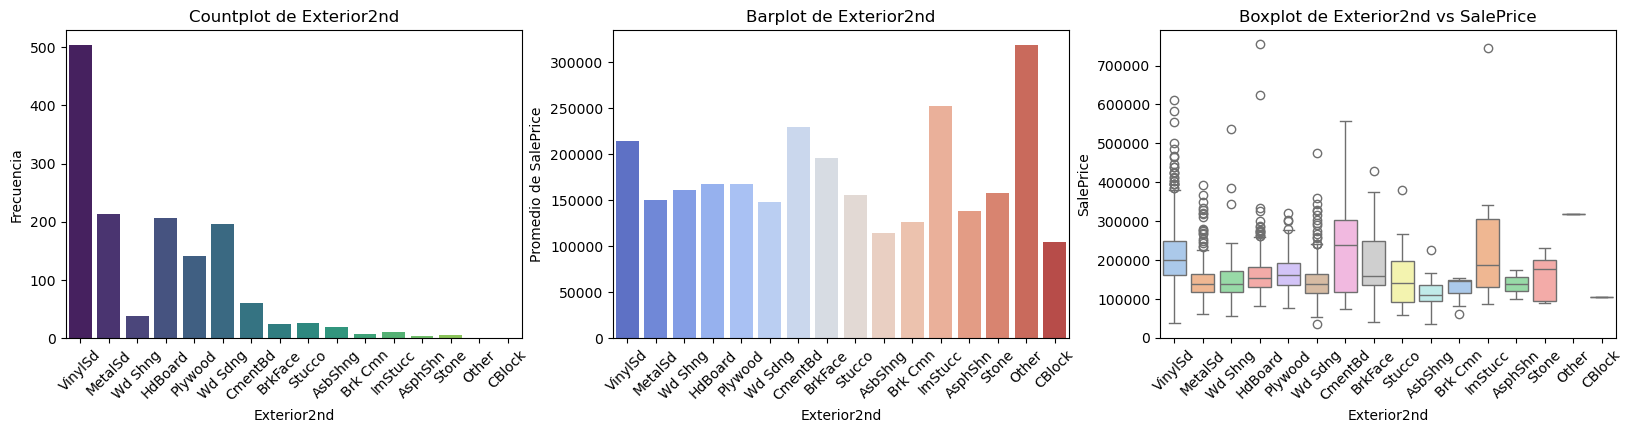

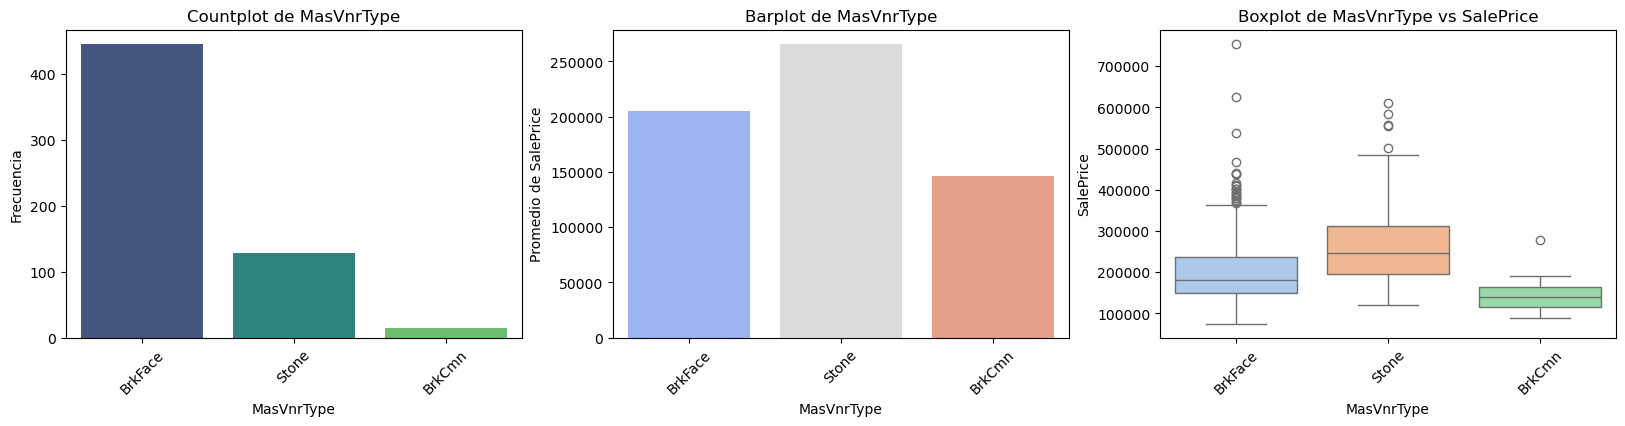

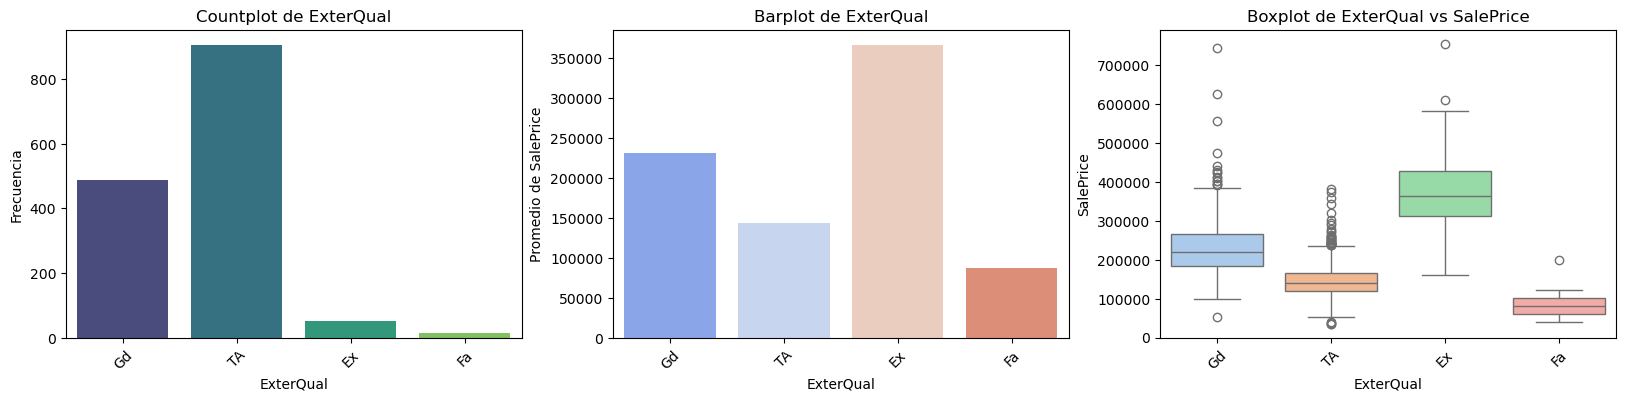

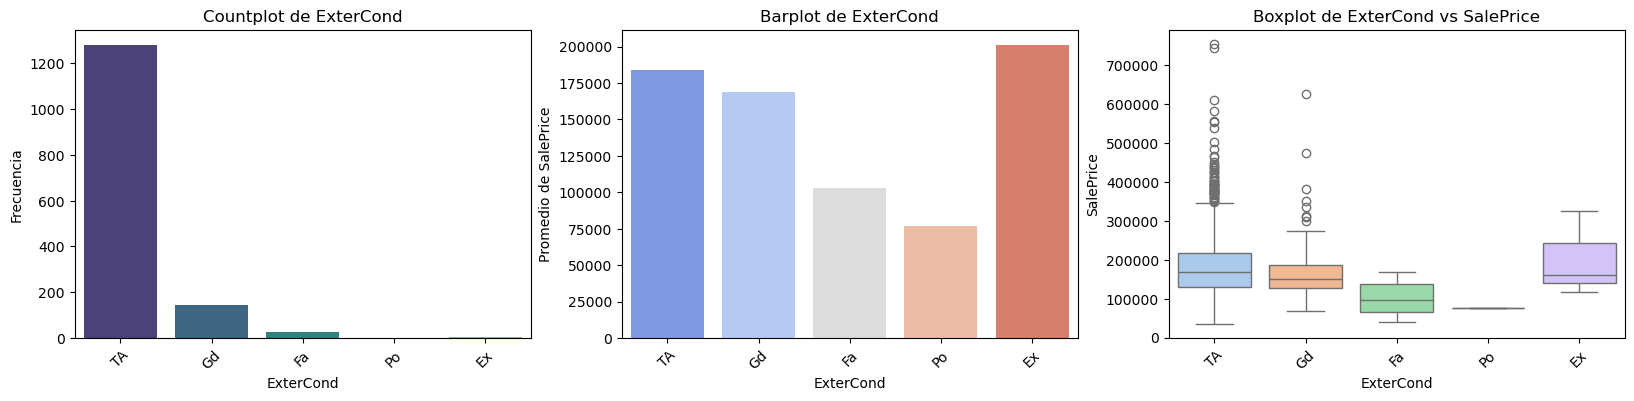

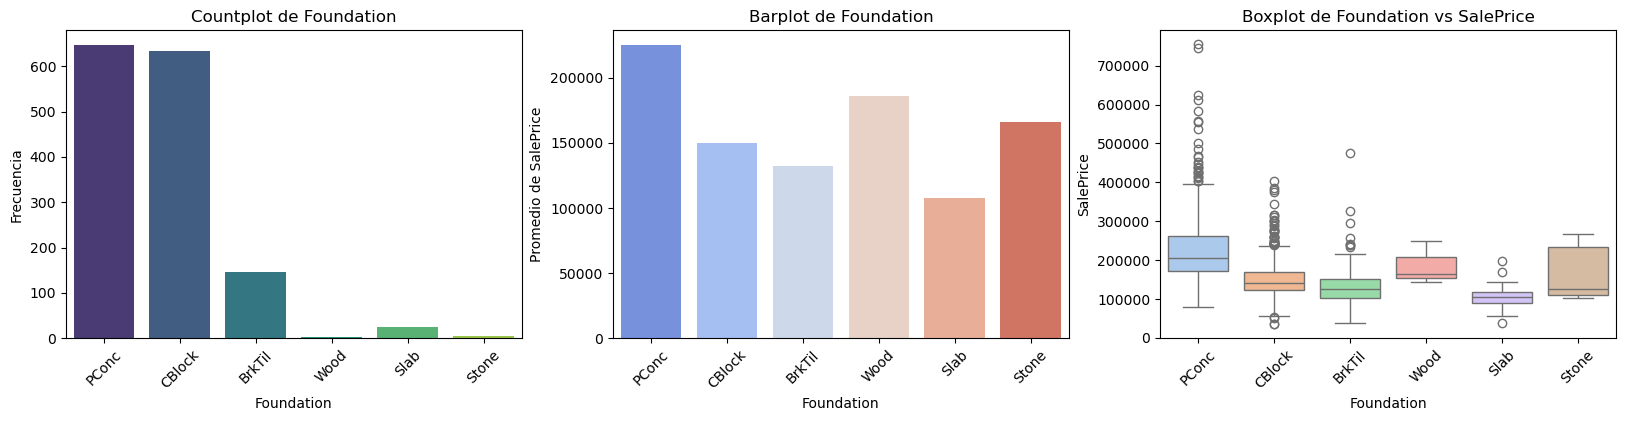

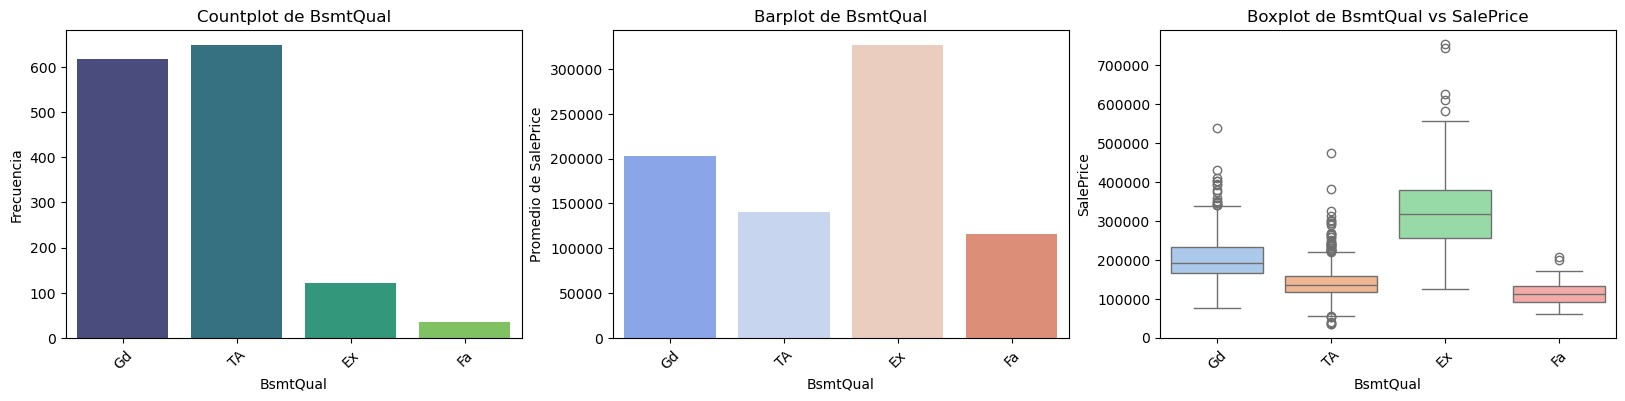

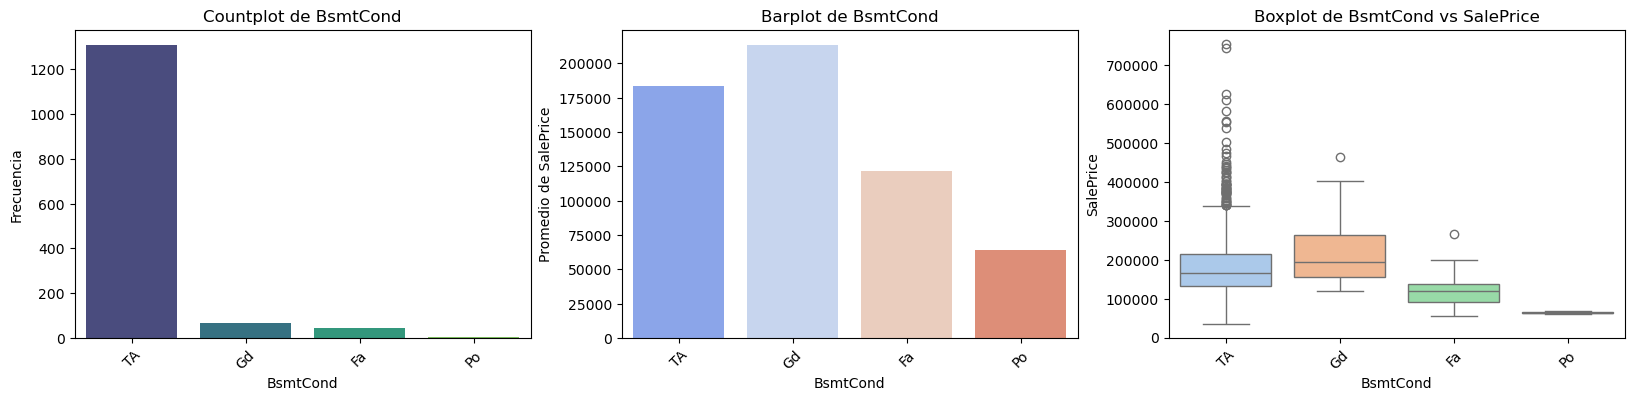

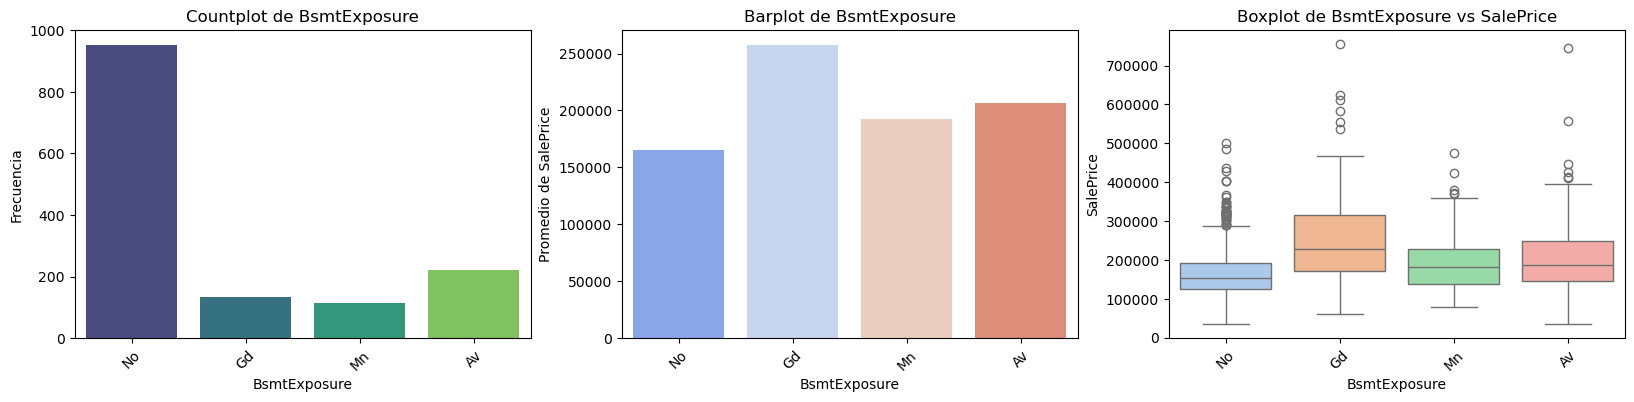

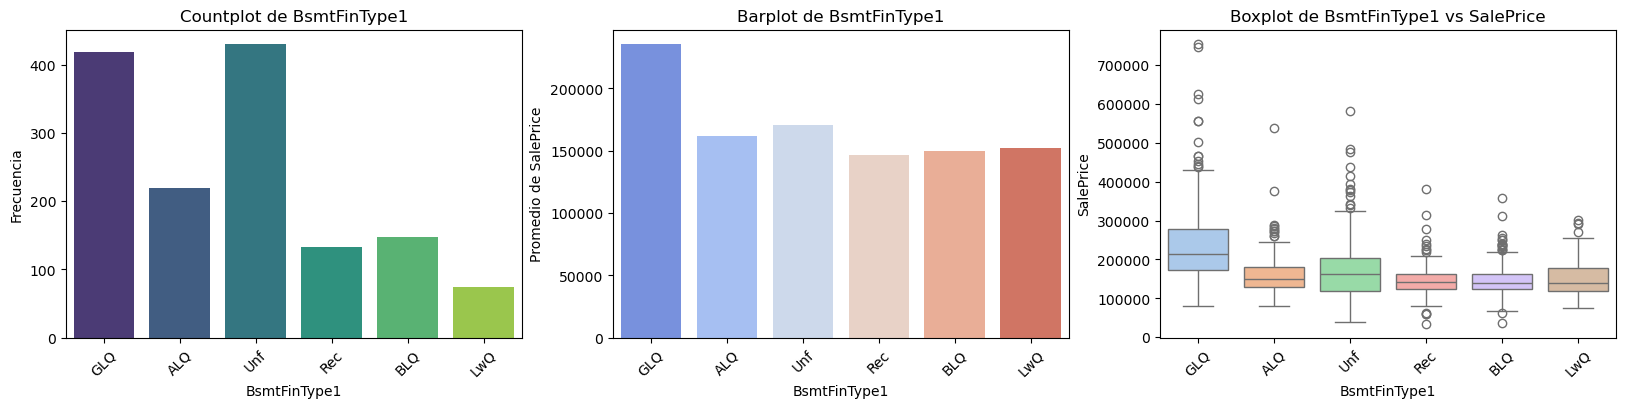

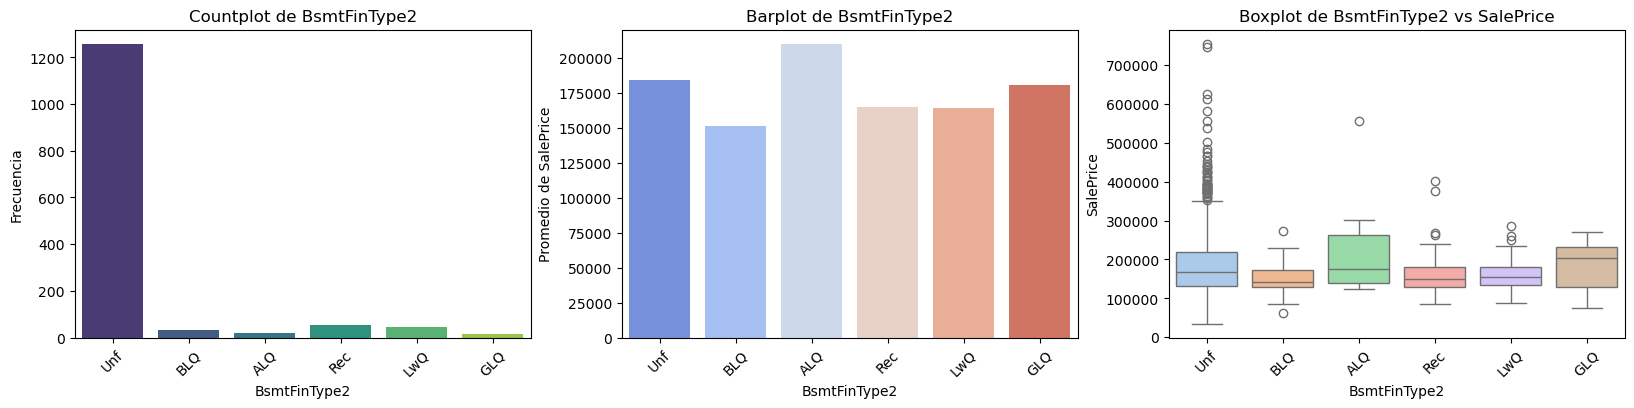

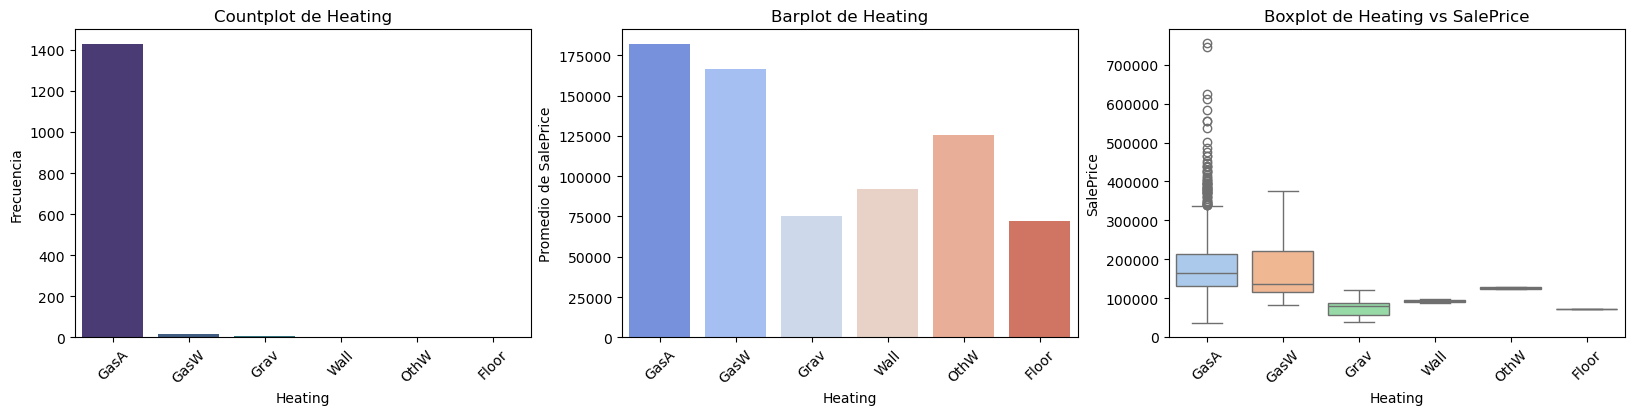

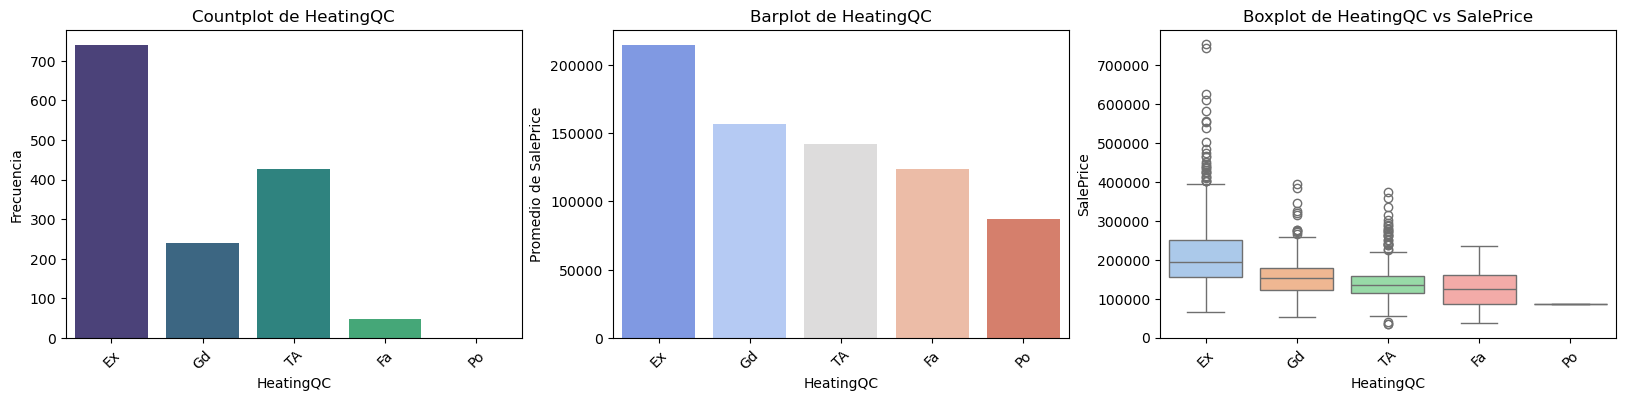

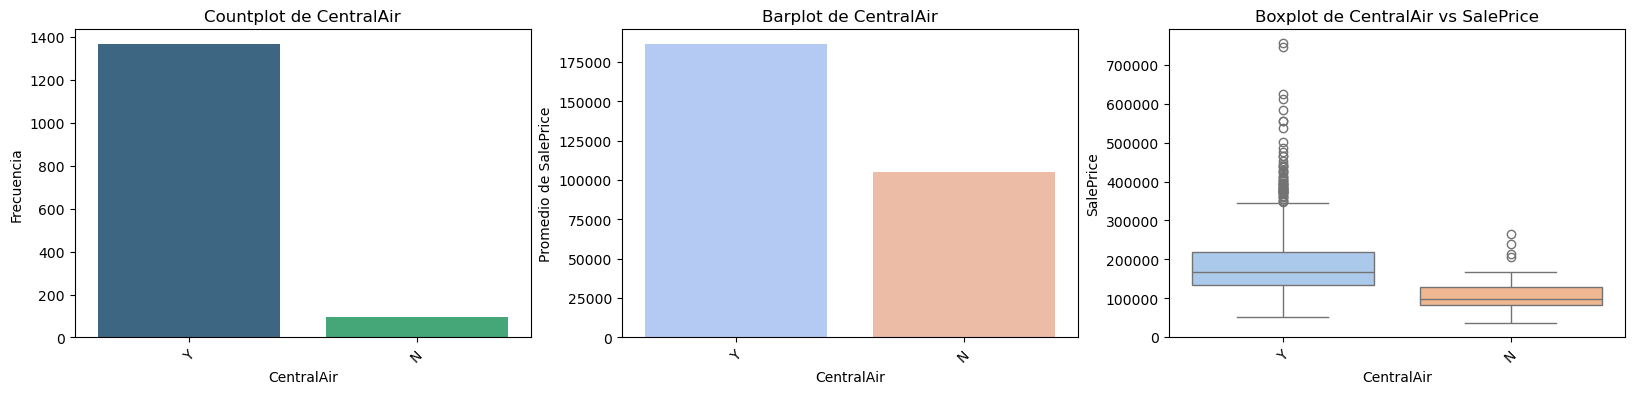

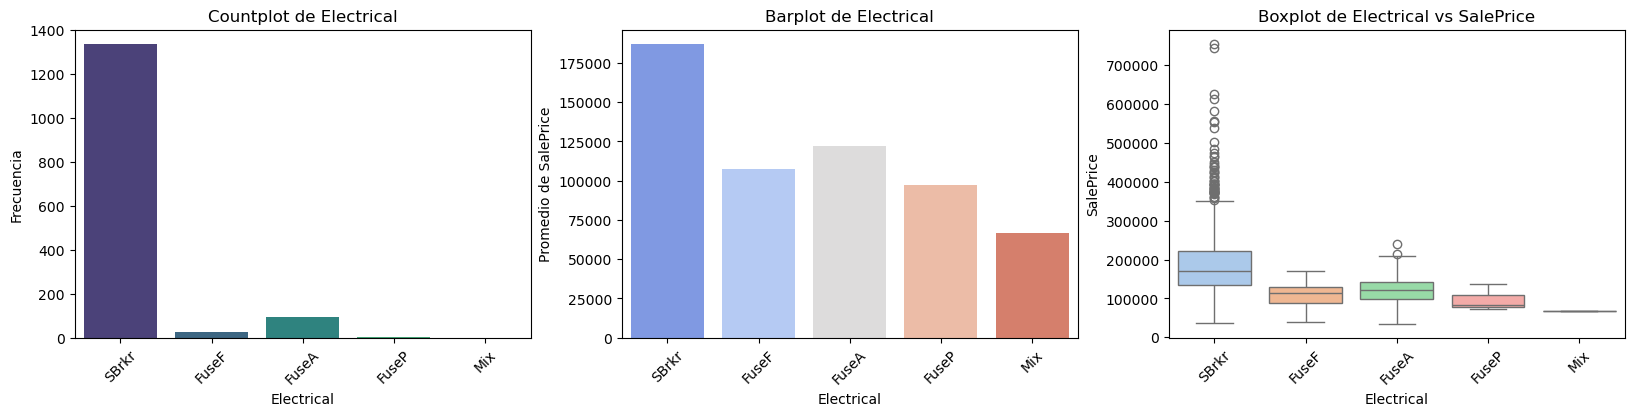

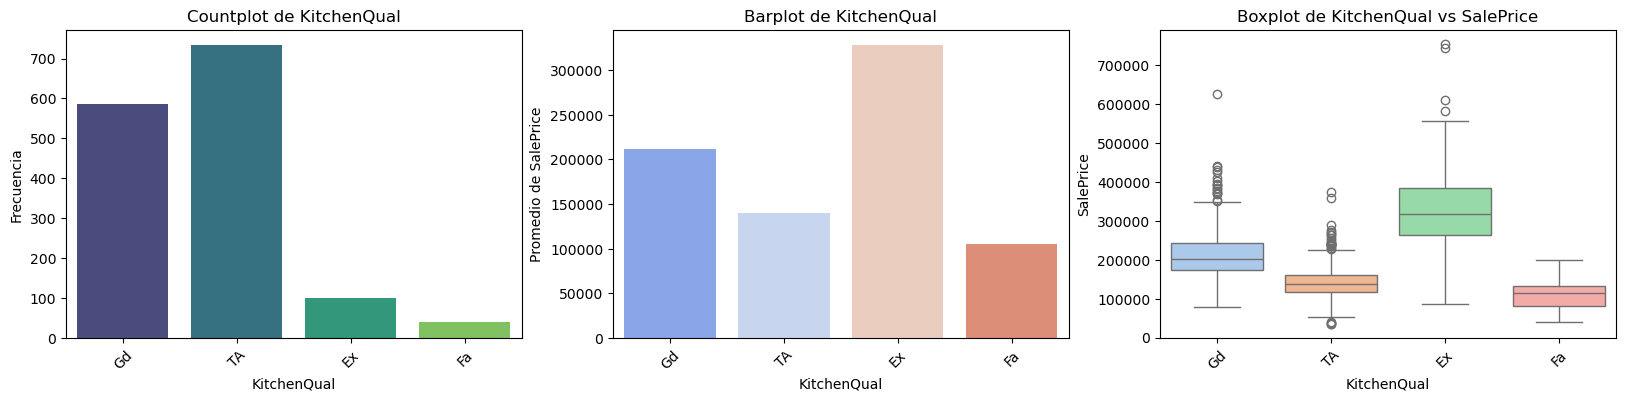

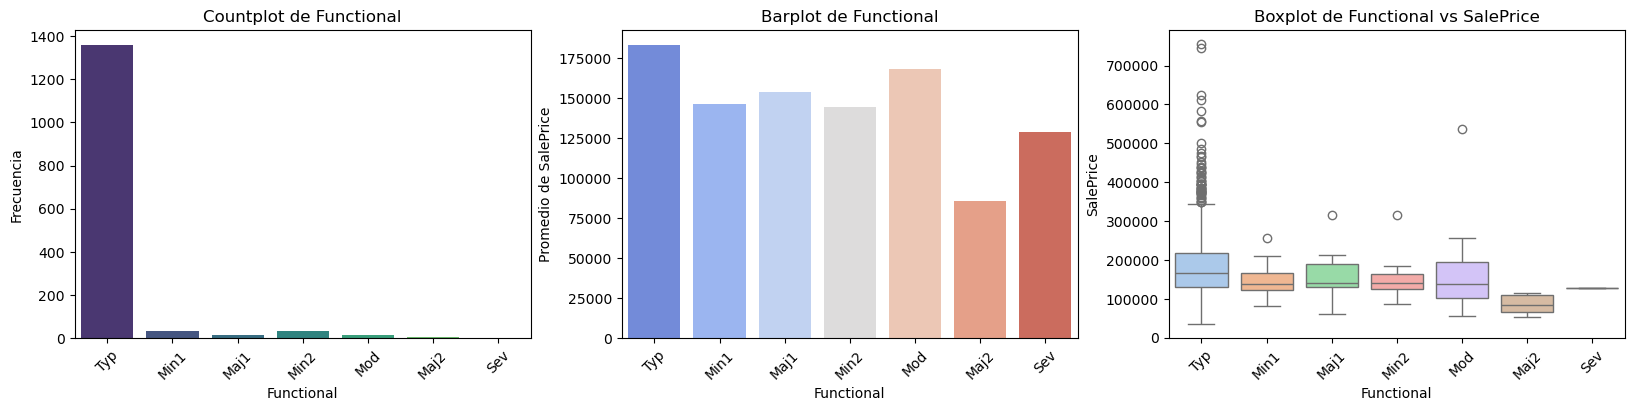

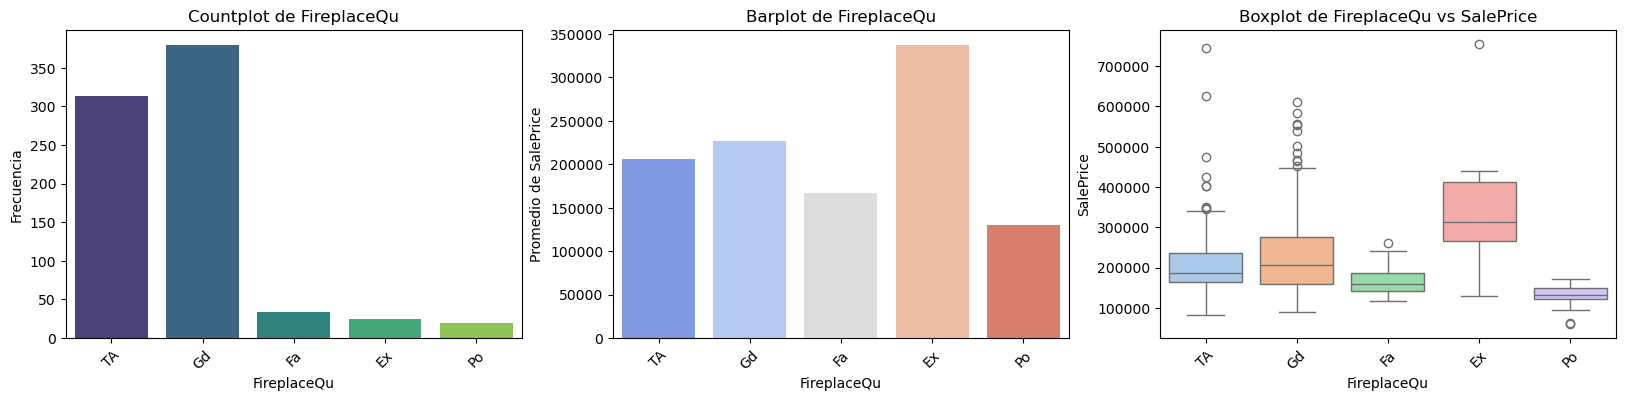

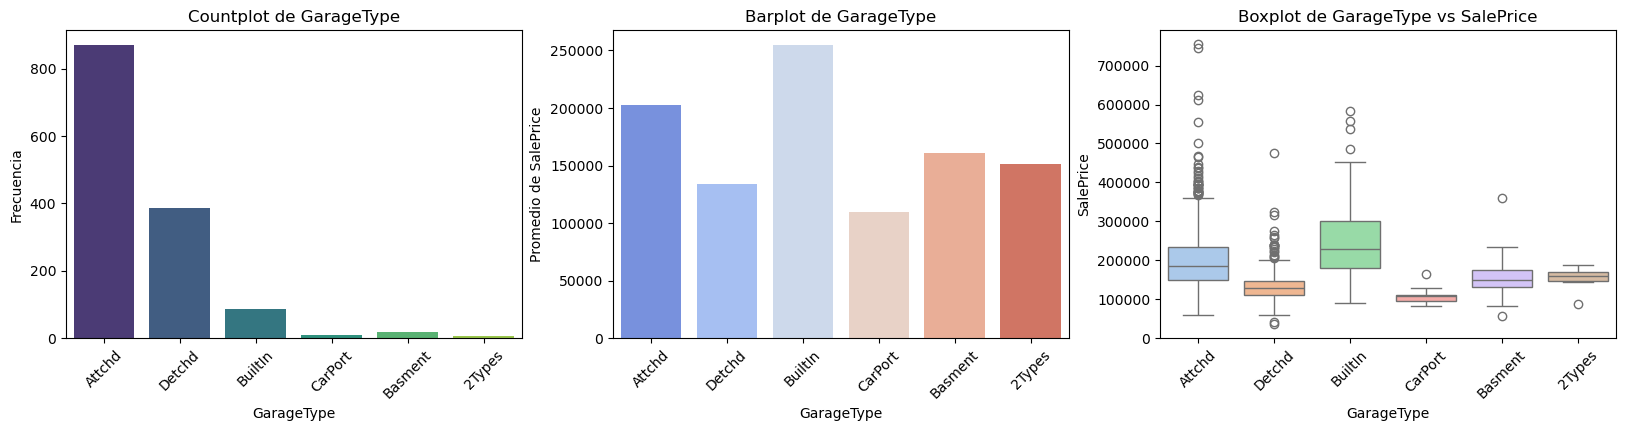

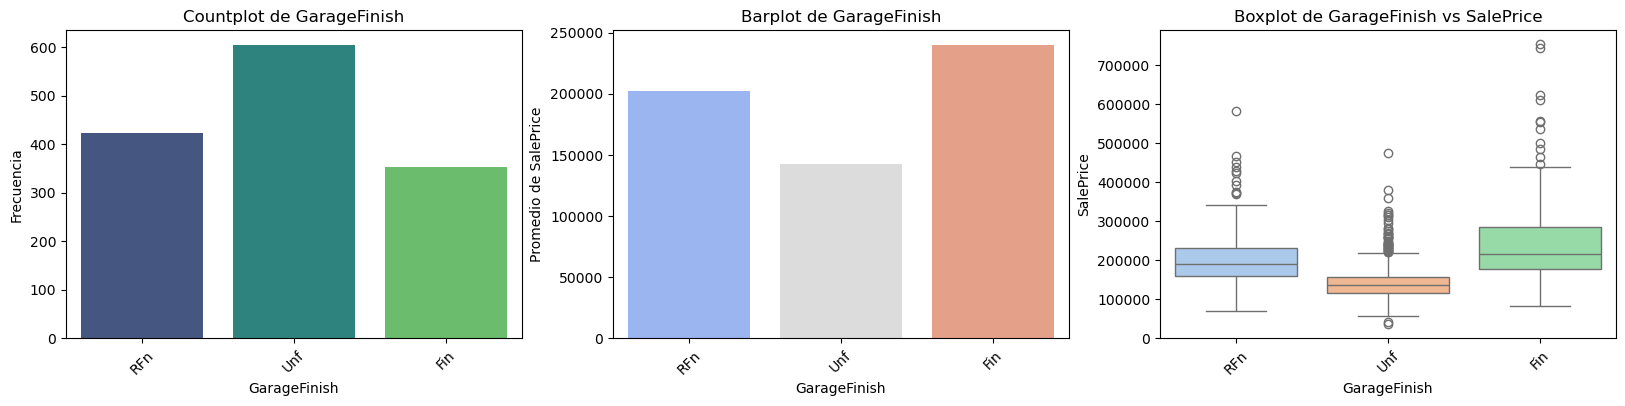

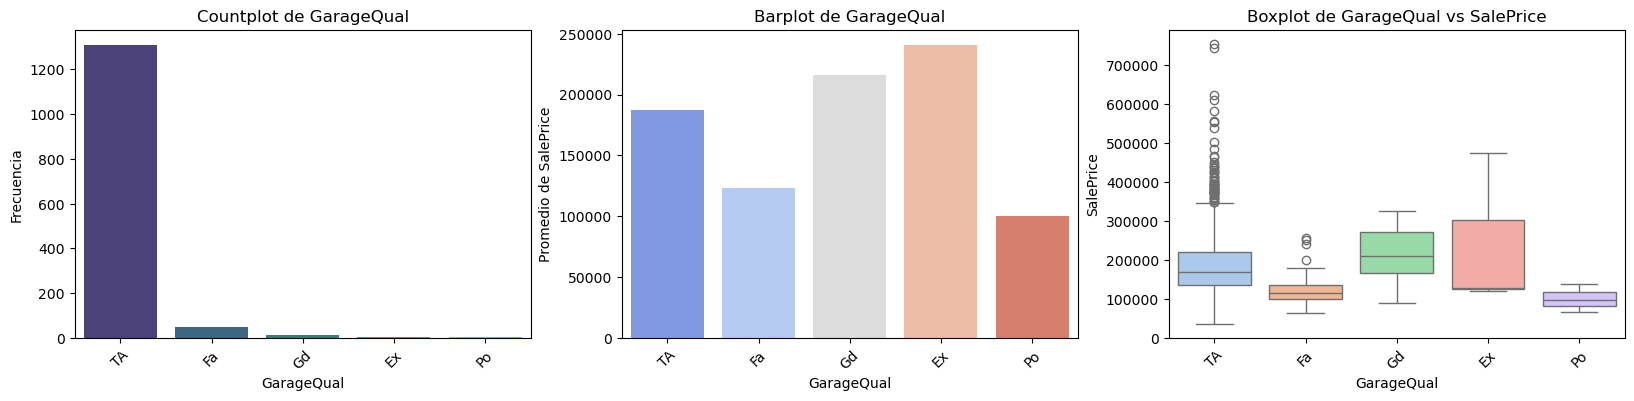

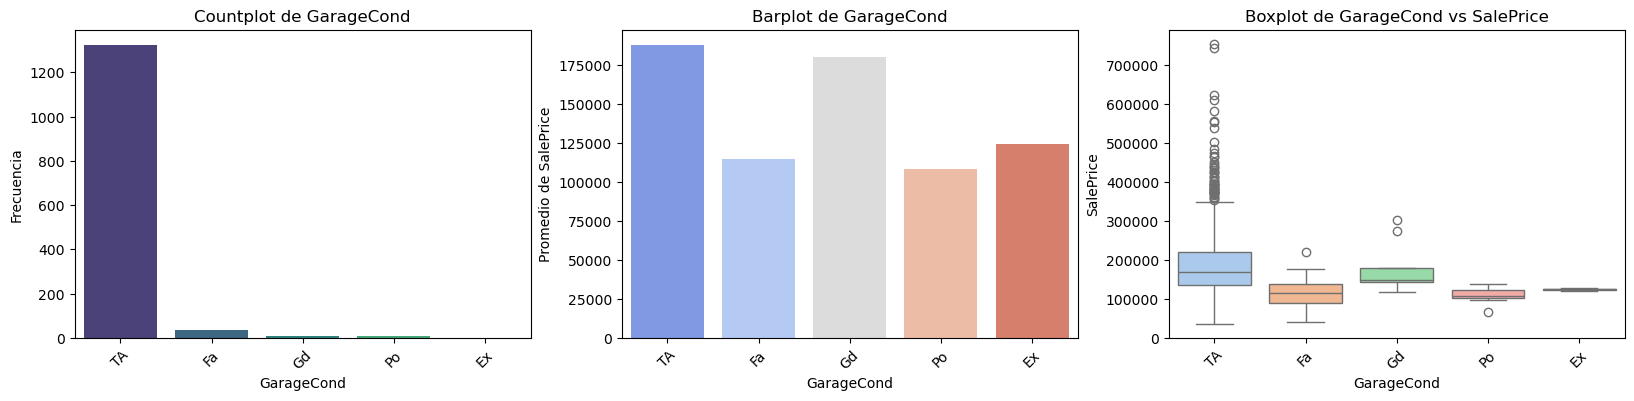

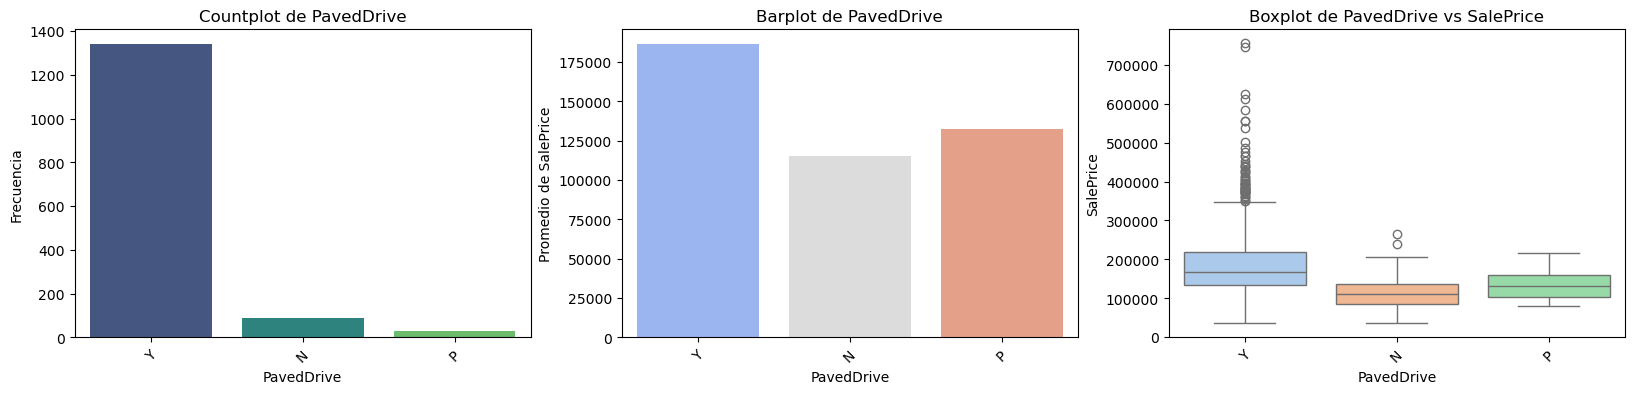

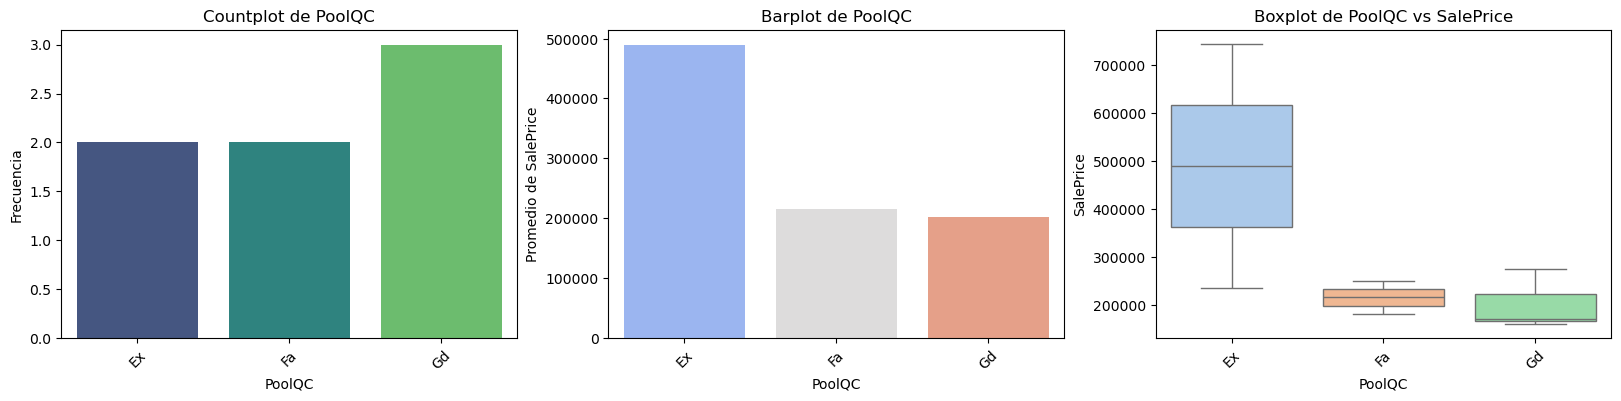

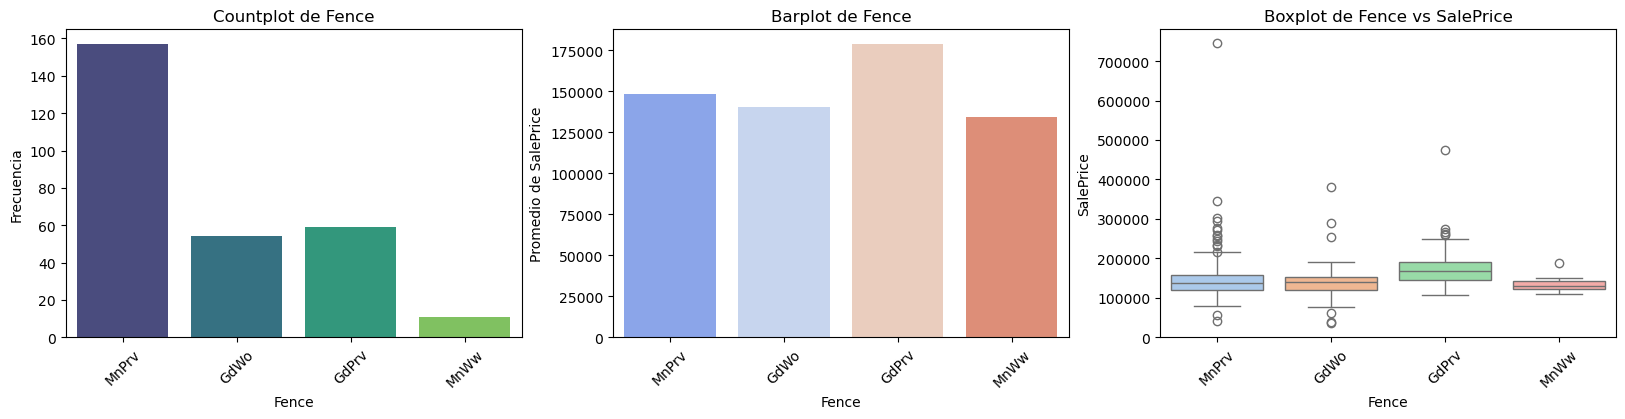

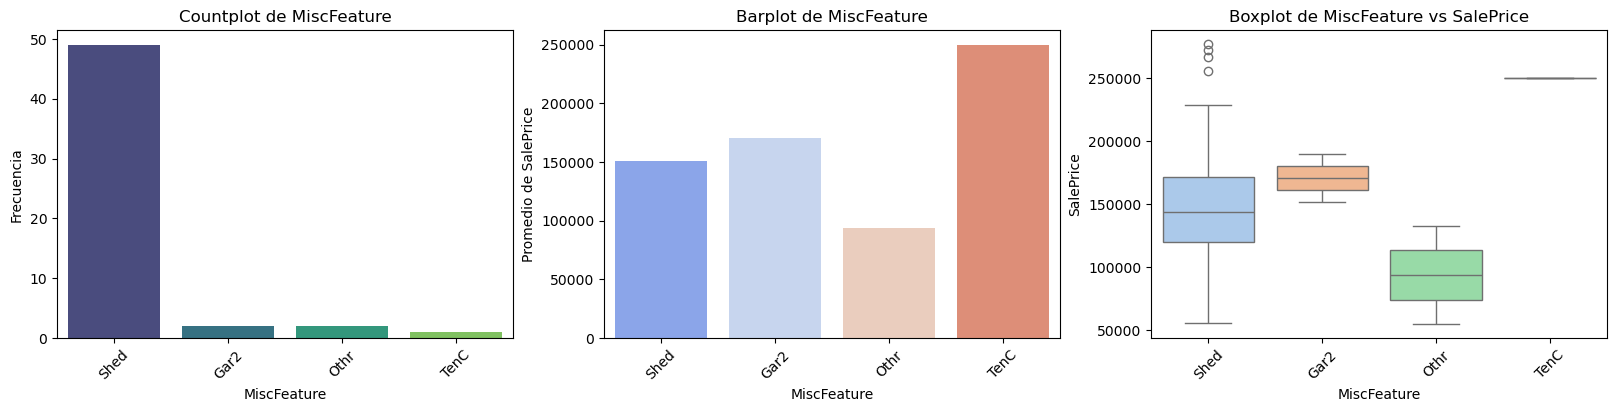

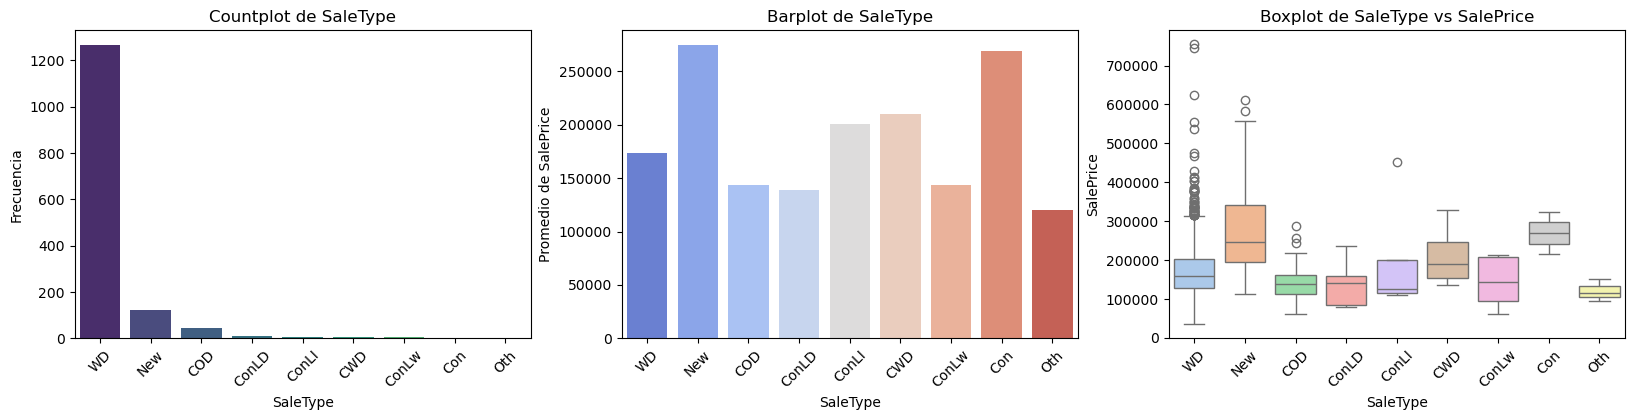

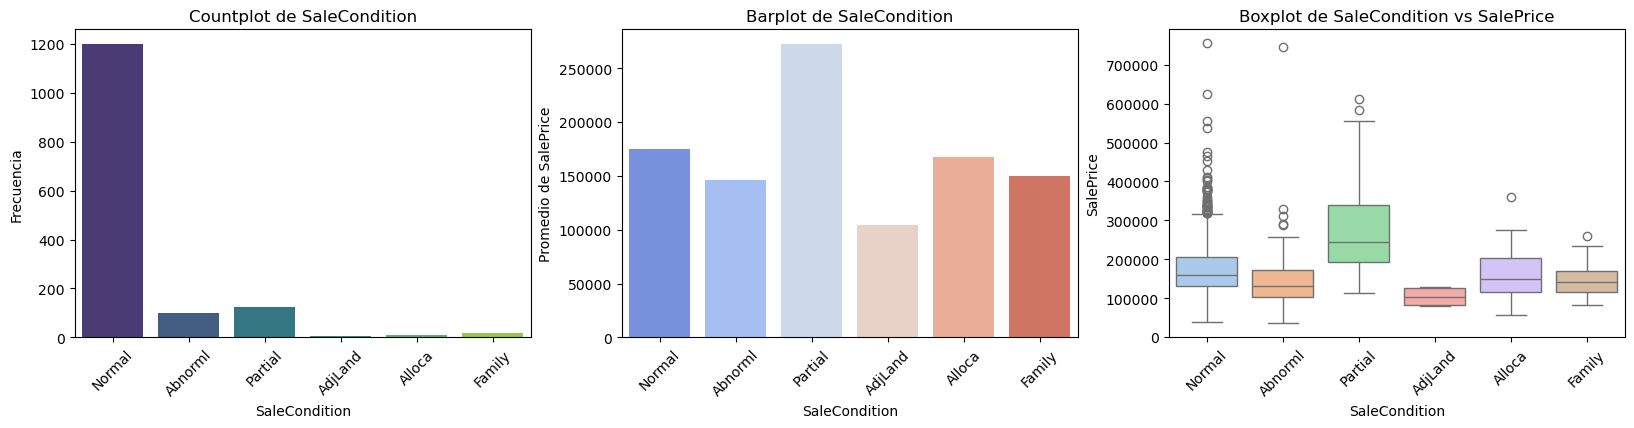

In [28]:
#Filtro solo columnas categóricas
cat_columns = df.select_dtypes(include=['object','category']).columns

df_only_categorical = df[cat_columns]
df_only_categorical.to_csv(r"C:\Users\franc\Desktop\ML_IoT\df_only_categorical.csv",sep=',', index=False)

#Countplot, barplot y boxplot por cada variable categórica
for col in cat_columns:
    fig, axes = plt.subplots(1,3, figsize=(20,4))

    #Countplot -frecuncia por categoria
    sns.countplot(data=df, x=col, ax=axes[0], hue=col, legend=False, palette='viridis')
    axes[0].set_title(f'Countplot de {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frecuencia')
    axes[0].tick_params(axis='x', rotation=45)

    #barplot - promedio de SalePrice por categoria.
    sns.barplot(data=df, x=col, y='SalePrice', ax=axes[1], hue=col, legend=False, palette='coolwarm', errorbar=None)
    axes[1].set_title(f'Barplot de {col}')
    axes[1].set_xlabel(col)  
    axes[1].set_ylabel('Promedio de SalePrice')
    axes[1].tick_params(axis='x', rotation=45)    
    #bOXplot - Distribución de SalePrice por categoria.
    sns.boxplot(data=df, x=col, y='SalePrice', ax=axes[2], hue=col, legend=False, palette='pastel')
    axes[2].set_title(f'Boxplot de {col} vs SalePrice')
    axes[2].set_xlabel(col)  
    axes[2].set_ylabel('SalePrice')
    axes[2].tick_params(axis='x', rotation=45)
    plt.show()



### Análisis detallado de las variables categóricas

In [30]:
detailed_categorical_summary = []

for col in df_only_categorical.columns:
    value_counts = df_only_categorical[col].value_counts()
    top_category = value_counts.index[0]
    top_freq = value_counts.iloc[0]

## Calcula la cantidad de categorías con menos del 5% de frecuencia.
    low_freq_categories = (value_counts / len(df_only_categorical) < 0.05).sum()

    detailed_categorical_summary.append({
        "Variable": col,
        "Categorías Únicas": df_only_categorical[col].nunique(),
        "Categoría Más Frecuente": top_category,
        "Frecuencia De La Categoría Más Frecuente": top_freq,
        "Valores Faltantes": df_only_categorical[col].isnull().sum(),
        "Porcentaje de valores faltantes": (df_only_categorical[col].isnull().sum() / len(df_only_categorical)) * 100,
        "Categorias con frecuencia < al 5%": low_freq_categories
    })


detailed_categorical_summary_df = pd.DataFrame(detailed_categorical_summary)
detailed_categorical_summary_df

Variable  Categorías Únicas Categoría Más Frecuente  \
0        MSZoning                  5                      RL   
1          Street                  2                    Pave   
2           Alley                  2                    Grvl   
3        LotShape                  4                     Reg   
4     LandContour                  4                     Lvl   
5       Utilities                  2                  AllPub   
6       LotConfig                  5                  Inside   
7       LandSlope                  3                     Gtl   
8    Neighborhood                 25                   NAmes   
9      Condition1                  9                    Norm   
10     Condition2                  8                    Norm   
11       BldgType                  5                    1Fam   
12     HouseStyle                  8                  1Story   
13      RoofStyle                  6                   Gable   
14       RoofMatl                  8                 CompShg   
15    Exterior1st                 15                 VinylSd   
16    Exterior2nd                 16                 VinylSd   
17     MasVnrType                  3                 BrkFace   
18      ExterQual                  4                      TA   
19      ExterCond                  5                      TA   
20     Foundation                  6                   PConc   
21       BsmtQual                  4                      TA   
22       BsmtCond                  4                      TA   
23   BsmtExposure                  4                      No   
24   BsmtFinType1                  6                     Unf   
25   BsmtFinType2                  6                     Unf   
26        Heating                  6                    GasA   
27      HeatingQC                  5                      Ex   
28     CentralAir                  2                       Y   
29     Electrical                  5                   SBrkr   
30    KitchenQual                  4                      TA   
31     Functional                  7                     Typ   
32    FireplaceQu                  5                      Gd   
33     GarageType                  6                  Attchd   
34   GarageFinish                  3                     Unf   
35     GarageQual                  5                      TA   
36     GarageCond                  5                      TA   
37     PavedDrive                  3                       Y   
38         PoolQC                  3                      Gd   
39          Fence                  4                   MnPrv   
40    MiscFeature                  4                    Shed   
41       SaleType                  9                      WD   
42  SaleCondition                  6                  Normal   

    Frecuencia De La Categoría Más Frecuente  Valores Faltantes  \
0                                       1151                  0   
1                                       1454                  0   
2                                         50               1369   
3                                        925                  0   
4                                       1311                  0   
5                                       1459                  0   
6                                       1052                  0   
7                                       1382                  0   
8                                        225                  0   
9                                       1260                  0   
10                                      1445                  0   
11                                      1220                  0   
12                                       726                  0   
13                                      1141                  0   
14                                      1434                  0   
15                                       515                  0   
16                                       504         

In [31]:
# variables con 2 o más categorías poco representadas, <5% de las observaciones
low_rep_vars_2plus = detailed_categorical_summary_df[detailed_categorical_summary_df["Categorias con frecuencia < al 5%"] >= 2]
low_rep_vars_2plus

Variable  Categorías Únicas Categoría Más Frecuente  \
0        MSZoning                  5                      RL   
2           Alley                  2                    Grvl   
3        LotShape                  4                     Reg   
4     LandContour                  4                     Lvl   
6       LotConfig                  5                  Inside   
7       LandSlope                  3                     Gtl   
8    Neighborhood                 25                   NAmes   
9      Condition1                  9                    Norm   
10     Condition2                  8                    Norm   
11       BldgType                  5                    1Fam   
12     HouseStyle                  8                  1Story   
13      RoofStyle                  6                   Gable   
14       RoofMatl                  8                 CompShg   
15    Exterior1st                 15                 VinylSd   
16    Exterior2nd                 16                 VinylSd   
18      ExterQual                  4                      TA   
19      ExterCond                  5                      TA   
20     Foundation                  6                   PConc   
22       BsmtCond                  4                      TA   
25   BsmtFinType2                  6                     Unf   
26        Heating                  6                    GasA   
27      HeatingQC                  5                      Ex   
29     Electrical                  5                   SBrkr   
31     Functional                  7                     Typ   
32    FireplaceQu                  5                      Gd   
33     GarageType                  6                  Attchd   
35     GarageQual                  5                      TA   
36     GarageCond                  5                      TA   
38         PoolQC                  3                      Gd   
39          Fence                  4                   MnPrv   
40    MiscFeature                  4                    Shed   
41       SaleType                  9                      WD   
42  SaleCondition                  6                  Normal   

    Frecuencia De La Categoría Más Frecuente  Valores Faltantes  \
0                                       1151                  0   
2                                         50               1369   
3                                        925                  0   
4                                       1311                  0   
6                                       1052                  0   
7                                       1382                  0   
8                                        225                  0   
9                                       1260                  0   
10                                      1445                  0   
11                                      1220                  0   
12                                       726                  0   
13                                      1141                  0   
14                                      1434                  0   
15                                       515                  0   
16                                       504                  0   
18                                       906                  0   
19                                      1282                  0   
20                                       647                  0   
22                                      1311                 37   
25                                      1256                 38   
26                                      1428                  0   
27                                       741                  0   
29                                      1334                  1   
31                                      1360                  0   
32                                       380                690   
33                                       870                 81   
35                     

In [32]:
# Identificar categorías individuales con frecuencia menor al 5% del total de datos (1460 filas)
low_freq_categories = {}

for col in df_only_categorical.columns:
    value_counts = df_only_categorical[col].value_counts()
    low_freq_values = value_counts[value_counts < (0.05 * len(df_only_categorical))]
    if not low_freq_values.empty:
        low_freq_categories[col] = low_freq_values


low_freq_df = []

for var, values in low_freq_categories.items():
    for category, count in values.items():
        low_freq_df.append({"Variable": var, "Category": category, "Frequency": count, "Percentage": (count / len(df_only_categorical)) * 100})

low_freq_df = pd.DataFrame(low_freq_df).sort_values(by=["Variable", "Frequency"], ascending=[True, False])


low_freq_df


Variable Category  Frequency  Percentage
4        Alley     Grvl         50    3.424658
5        Alley     Pave         41    2.808219
46    BldgType   Duplex         52    3.561644
47    BldgType    Twnhs         43    2.945205
48    BldgType   2fmCon         31    2.123288
..         ...      ...        ...         ...
150   SaleType      CWD          4    0.273973
151   SaleType      Oth          3    0.205479
152   SaleType      Con          2    0.136986
3       Street     Grvl          6    0.410959
11   Utilities   NoSeWa          1    0.068493

[156 rows x 4 columns]

##### **Conclusiones Análisis Univariado De Variables Categóricas:**

Basado en la descripción de las variables y el análisis hasta ahora:

  * Agrupar categorías extremadamente raras si no aportan suficiente información
  * Convertir NaN en una categoría explícita por ejemplo: Alley (2 categorías, Grvl y Pave, con 93.77% de valores nulos) → Convertir NaN en "NoAlley".

+ Las siguientes variables deben mantenerse sin agrupación:
  - Neighborhood -> Representa ubicaciones específicas dentro de la ciudad. Cada barrio podría influir significativamente en SalePrice, por lo que agruparlos podría hacer perder información valiosa.
  - OverallQual y OverallCond -> Son variables ordinales con un orden lógico claro. Agruparlas distorsionaría la relación entre calidad/condición y el precio.
  - YearBuilt y YearRemodAdd -> Son valores continuos y no categóricos, por lo que no deben agruparse.
  - SaleCondition y SaleType -> Indican condiciones específicas de venta. Agruparlas podría ocultar diferencias importantes entre ventas normales, bancarias o de nuevos desarrollos.
  - Exterior1st y Exterior2nd -> Representan el material exterior de la casa, y aunque algunas categorías sean raras, podrían influir en la durabilidad y el precio de la propiedad.
 
 

#### Agrupación de variables con datos poco frecuentes en variables identificadas.

In [36]:
# Copia del dataset categórico para aplicar agrupaciones
df_categorical_grouped = df_only_categorical.copy()

# Agrupar categorías poco representadas según las decisiones tomadas

## Agrupar en "Otros" categorías poco frecuentes en MSZoning
df_categorical_grouped["MSZoning"] = df_categorical_grouped["MSZoning"].replace(
    {"C": "Otros", "FV": "Otros", "RH": "Otros"}
)

## Convertir Alley en "HasAlley" o "NoAlley"
df_categorical_grouped["Alley"] = df_categorical_grouped["Alley"].fillna("NoAlley")
df_categorical_grouped["Alley"] = df_categorical_grouped["Alley"].replace({"Grvl": "HasAlley", "Pave": "HasAlley"})

## Agrupar LotShape en "Regular" e "Irregular"
df_categorical_grouped["LotShape"] = df_categorical_grouped["LotShape"].replace({"IR2": "Irregular", "IR3": "Irregular"})

## Agrupar LandContour en "Plano" y "NoPlano"
df_categorical_grouped["LandContour"] = df_categorical_grouped["LandContour"].replace({"Bnk": "NoPlano", "HLS": "NoPlano", "Low": "NoPlano"})

## Agrupar LotConfig en "Inside", "Corner" y "MultiFrontage"
df_categorical_grouped["LotConfig"] = df_categorical_grouped["LotConfig"].replace({"FR2": "MultiFrontage", "FR3": "MultiFrontage"})

## Agrupar BldgType en "SingleFamily" y "MultiFamily"
df_categorical_grouped["BldgType"] = df_categorical_grouped["BldgType"].replace({"Duplex": "MultiFamily", "Twnhs": "MultiFamily", "2FmCon": "MultiFamily"})

df_categorical_grouped

MSZoning Street    Alley LotShape LandContour Utilities      LotConfig  \
0          RL   Pave  NoAlley      Reg         Lvl    AllPub         Inside   
1          RL   Pave  NoAlley      Reg         Lvl    AllPub  MultiFrontage   
2          RL   Pave  NoAlley      IR1         Lvl    AllPub         Inside   
3          RL   Pave  NoAlley      IR1         Lvl    AllPub         Corner   
4          RL   Pave  NoAlley      IR1         Lvl    AllPub  MultiFrontage   
...       ...    ...      ...      ...         ...       ...            ...   
1455       RL   Pave  NoAlley      Reg         Lvl    AllPub         Inside   
1456       RL   Pave  NoAlley      Reg         Lvl    AllPub         Inside   
1457       RL   Pave  NoAlley      Reg         Lvl    AllPub         Inside   
1458       RL   Pave  NoAlley      Reg         Lvl    AllPub         Inside   
1459       RL   Pave  NoAlley      Reg         Lvl    AllPub         Inside   

     LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
0          Gtl      CollgCr       Norm  ...     Attchd          RFn   
1          Gtl      Veenker      Feedr  ...     Attchd          RFn   
2          Gtl      CollgCr       Norm  ...     Attchd          RFn   
3          Gtl      Crawfor       Norm  ...     Detchd          Unf   
4          Gtl      NoRidge       Norm  ...     Attchd          RFn   
...        ...          ...        ...  ...        ...          ...   
1455       Gtl      Gilbert       Norm  ...     Attchd          RFn   
1456       Gtl       NWAmes       Norm  ...     Attchd          Unf   
1457       Gtl      Crawfor       Norm  ...     Attchd          RFn   
1458       Gtl        NAmes       Norm  ...     Attchd          Unf   
1459       Gtl      Edwards       Norm  ...     Attchd          Fin   

     GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
0            TA         TA          Y    NaN    NaN         NaN       WD   
1            TA         TA          Y    NaN    NaN         NaN       WD   
2            TA         TA          Y    NaN    NaN         NaN       WD   
3            TA         TA          Y    NaN    NaN         NaN       WD   
4            TA         TA          Y    NaN    NaN         NaN       WD   
...         ...        ...        ...    ...    ...         ...      ...   
1455         TA         TA          Y    NaN    NaN         NaN       WD   
1456         TA         TA          Y    NaN  MnPrv         NaN       WD   
1457         TA         TA          Y    NaN  GdPrv        Shed       WD   
1458         TA         TA          Y    NaN    NaN         NaN       WD   
1459         TA         TA          Y    NaN    NaN         NaN       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3          Abnorml  
4           Normal  
...            ...  
1455        Normal  
1456        Normal  
1457        Normal  
1458        Normal  
1459        Normal  

[1460 rows x 43 columns]

#### Análisis Del Impacto De Las Agrupaciones en SalePrice

C:\Users\franc\AppData\Local\Temp\ipykernel_1152\1143444316.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\franc\AppData\Local\Temp\ipykernel_1152\1143444316.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\franc\AppData\Local\Temp\ipykernel_1152\1143444316.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\franc\AppData\Local\Temp\ipykernel_1152\1143444316.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklab

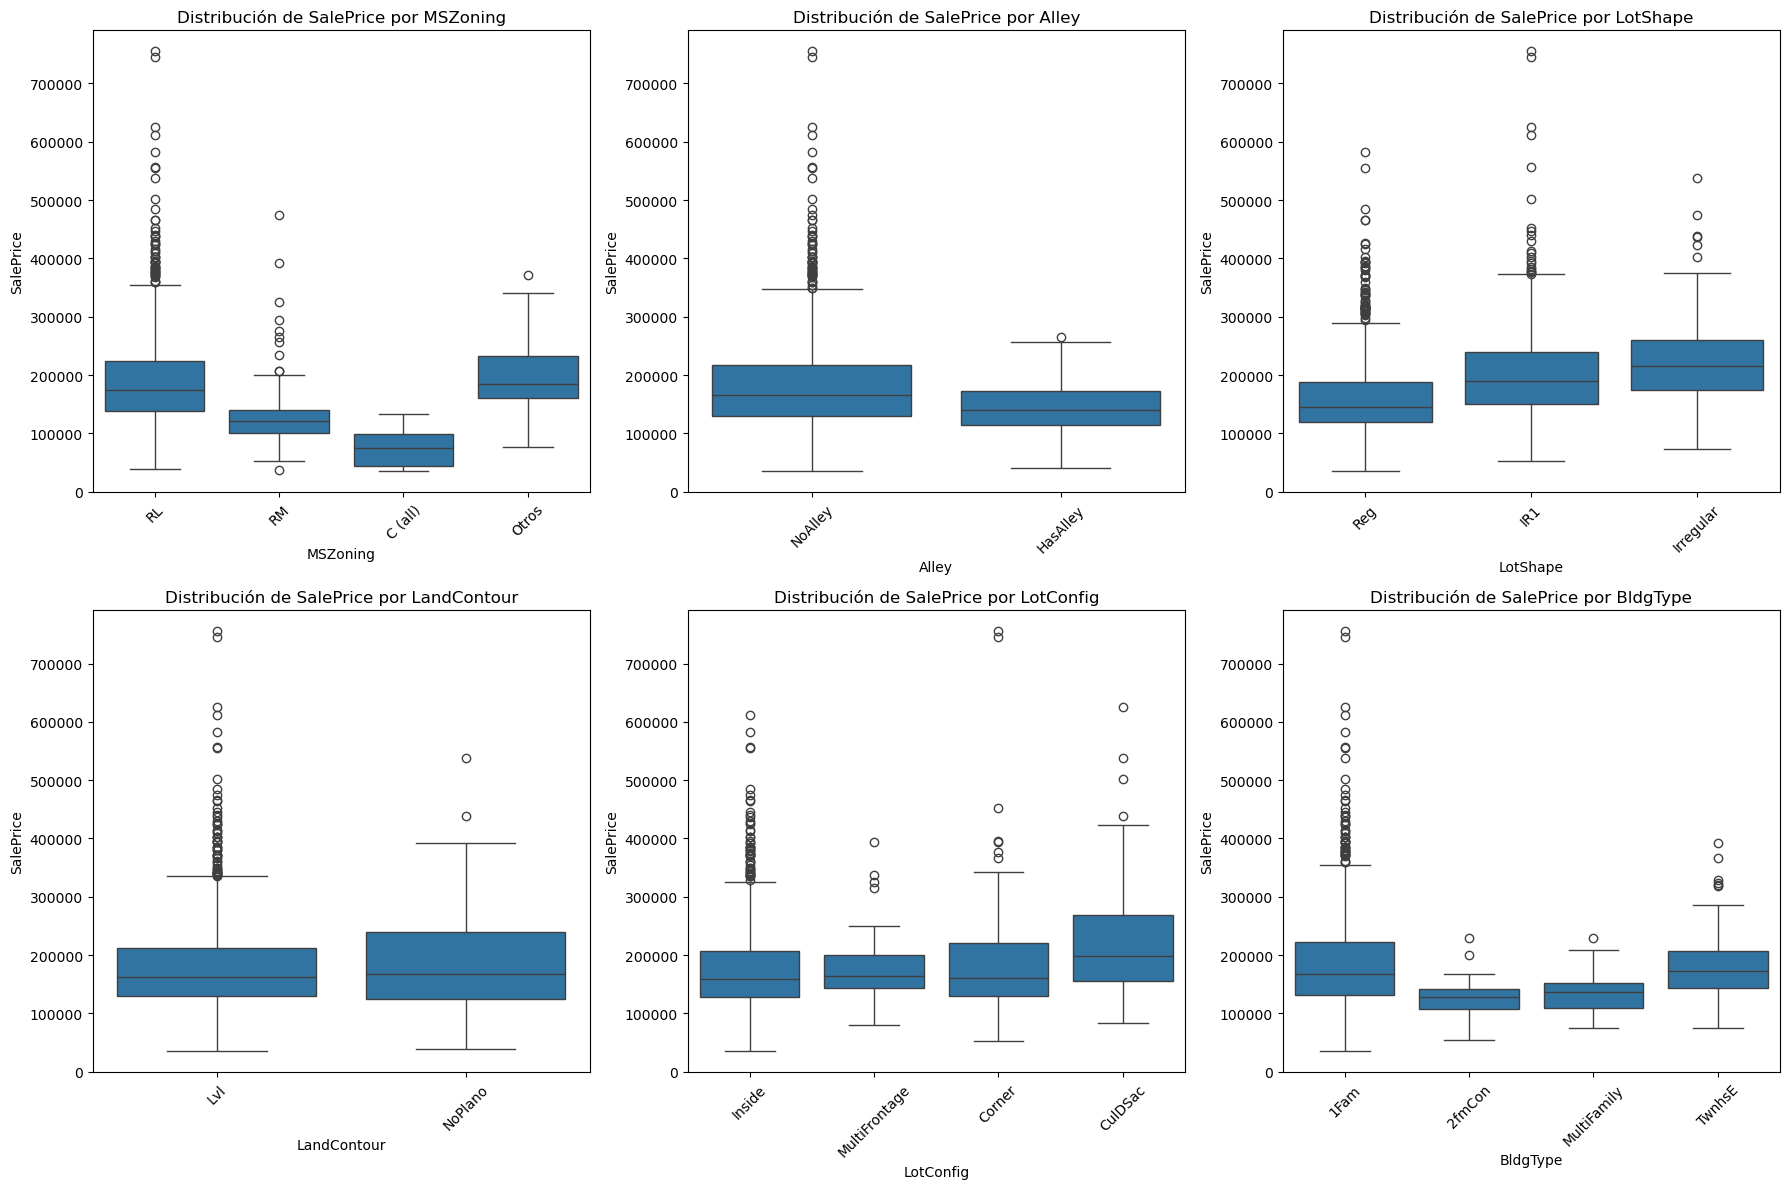

level_0        level_1           mean    median           std  count
0      MSZoning        C (all)   74528.000000   74700.0  33791.092031     10
1      MSZoning          Otros  197726.518519  185000.0  59366.733674     81
2      MSZoning             RL  191004.994787  174000.0  80766.341319   1151
3      MSZoning             RM  126316.830275  120500.0  48521.689833    218
4         Alley       HasAlley  142845.912088  140000.0  42867.137343     91
5         Alley        NoAlley  183452.131483  165000.0  80667.145180   1369
6      LotShape            IR1  206101.665289  189000.0  85858.489559    484
7      LotShape      Irregular  235167.313725  215000.0  96252.634874     51
8      LotShape            Reg  164754.818378  146000.0  69673.427215    925
9   LandContour            Lvl  180183.746758  162900.0  78463.567918   1311
10  LandContour        NoPlano  187409.758389  168000.0  87605.882051    149
11    LotConfig         Corner  181623.425856  160000.0  84466.041222    263
12    LotConfig        CulDSac  223854.617021  199262.0  93117.546586     94
13    LotConfig         Inside  176938.047529  159697.5  76426.805787   1052
14    LotConfig  MultiFrontage  180329.901961  165000.0  63752.777174     51
15     BldgType           1Fam  185763.807377  167900.0  82648.502922   1220
16     BldgType         2fmCon  128432.258065  127500.0  35458.545158     31
17     BldgType    MultiFamily  134614.063158  136000.0  34253.278699     95
18     BldgType         TwnhsE  181959.342105  172200.0  60626.108918    114

In [38]:
# Variables agrupadas a analizar
grouped_vars = ["MSZoning", "Alley", "LotShape", "LandContour", "LotConfig", "BldgType"]
 
# el dataset original para comparar con SalePrice
df_original = df.copy()

# Unir el dataset categórico agrupado con SalePrice
df_analysis = df_categorical_grouped.copy()
df_analysis["SalePrice"] = df_original["SalePrice"]

# Calcular estadísticas de SalePrice por categoría antes y después de agrupar
price_stats = {}
for var in grouped_vars:
    price_stats[var] = df_analysis.groupby(var)["SalePrice"].agg(["mean", "median", "std", "count"])

# Visualizar distribución de SalePrice por categoría con boxplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(grouped_vars):
    sns.boxplot(x=df_analysis[var], y=df_analysis["SalePrice"], ax=axes[i])
    axes[i].set_title(f"Distribución de SalePrice por {var}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Mostrar la tabla con estadísticas
price_stats_df = pd.concat(price_stats, axis=0).reset_index()
price_stats_df


#### Refinar agrupaciones con demasiada variabilidad

C:\Users\franc\AppData\Local\Temp\ipykernel_1152\3876623045.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\franc\AppData\Local\Temp\ipykernel_1152\3876623045.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


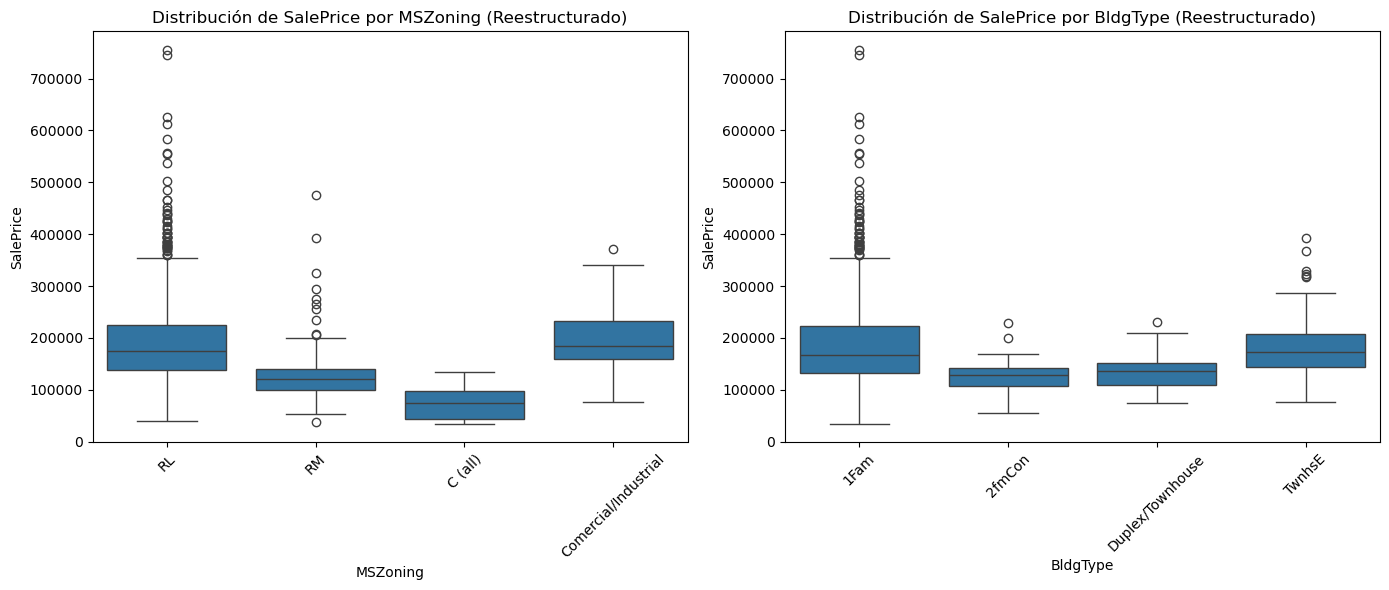

In [40]:
## MSZoning: Separar "Otros" en "Comercial/Industrial" y "AltaDensidad"
df_categorical_grouped["MSZoning"] = df_categorical_grouped["MSZoning"].replace(
    {"Otros": "Comercial/Industrial"})
df_categorical_grouped["MSZoning"] = df_categorical_grouped["MSZoning"].replace(
    {"RH": "AltaDensidad"})

## BldgType: Dividir "MultiFamily" en "Duplex/Townhouse" y "Conversion"
df_categorical_grouped["BldgType"] = df_categorical_grouped["BldgType"].replace(
    {"MultiFamily": "Duplex/Townhouse"})
df_categorical_grouped["BldgType"] = df_categorical_grouped["BldgType"].replace(
    {"2FmCon": "Conversion"})

# Unir de nuevo con SalePrice para verificar el impacto de la reestructuración
df_analysis = df_categorical_grouped.copy()
df_analysis["SalePrice"] = df_original["SalePrice"]

# Calcular estadísticas de SalePrice por categoría después de la reestructuración
price_stats_refined = {}
for var in ["MSZoning", "BldgType"]:
    price_stats_refined[var] = df_analysis.groupby(var)["SalePrice"].agg(["mean", "median", "std", "count"])

# Visualizar nuevamente distribución de SalePrice con las nuevas agrupaciones
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
axes = axes.flatten()

for i, var in enumerate(["MSZoning", "BldgType"]):
    sns.boxplot(x=df_analysis[var], y=df_analysis["SalePrice"], ax=axes[i])
    axes[i].set_title(f"Distribución de SalePrice por {var} (Reestructurado)")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



##### Conclusión sobre la reestructuración de agrupaciones

**Impacto en MSZoning** 

+ Antes: "Otros" tenía alta variabilidad.
+ Ahora: Separamos "Comercial/Industrial" y "AltaDensidad", y la media de precios es más consistente dentro de cada grupo.

<br
    >
**Impacto en BldgType**

+ Antes: "MultiFamily" tenía una dispersión muy alta.
+ Ahora: Se dividió en "Duplex/Townhouse" y "Conversion", lo que mejora la diferenciación de precios.


**Resultado:**

La reestructuración mejoró la estabilidad de las categorías y redujo la variabilidad dentro de cada una, lo que permitirá un mejor rendimiento en modelos predictivos.

#### Imputación de valores nulos en PoolQC, Fence, MiscFeature

**Estrategia de Imputación:**

    - PoolQC (93% NaN) -> "NoPool", la mayoría de las casas no tienen piscina.
    - Fence (80% NaN) -> "NoFence", indica ausencia de cerca.
    - MiscFeature (96% NaN) -> "NoMisc", sin características extra como cobertizo o cancha de tenis.

+ Impacto en el análisis:
  - Evita perder datos al eliminar filas con NaN.
  - Mejora la interpretabilidad del modelo al hacer explícita la ausencia de estas características.
  - Permite utilizar estas variables como predictoras sin problemas en modelos que no aceptan valores nulos.

In [45]:
# Imputar valores nulos en PoolQC, Fence, MiscFeature con categorías explícitas
df_categorical_grouped["PoolQC"] = df_categorical_grouped["PoolQC"].fillna("NoPool")
df_categorical_grouped["Fence"] = df_categorical_grouped["Fence"].fillna("NoFence")
df_categorical_grouped["MiscFeature"] = df_categorical_grouped["MiscFeature"].fillna("NoMisc")

# Verificar que no haya más valores nulos en estas variables
missing_values_after = df_categorical_grouped[["PoolQC", "Fence", "MiscFeature"]].isnull().sum()
print(missing_values_after)
df_categorical_grouped

PoolQC         0
Fence          0
MiscFeature    0
dtype: int64


MSZoning Street    Alley LotShape LandContour Utilities      LotConfig  \
0          RL   Pave  NoAlley      Reg         Lvl    AllPub         Inside   
1          RL   Pave  NoAlley      Reg         Lvl    AllPub  MultiFrontage   
2          RL   Pave  NoAlley      IR1         Lvl    AllPub         Inside   
3          RL   Pave  NoAlley      IR1         Lvl    AllPub         Corner   
4          RL   Pave  NoAlley      IR1         Lvl    AllPub  MultiFrontage   
...       ...    ...      ...      ...         ...       ...            ...   
1455       RL   Pave  NoAlley      Reg         Lvl    AllPub         Inside   
1456       RL   Pave  NoAlley      Reg         Lvl    AllPub         Inside   
1457       RL   Pave  NoAlley      Reg         Lvl    AllPub         Inside   
1458       RL   Pave  NoAlley      Reg         Lvl    AllPub         Inside   
1459       RL   Pave  NoAlley      Reg         Lvl    AllPub         Inside   

     LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
0          Gtl      CollgCr       Norm  ...     Attchd          RFn   
1          Gtl      Veenker      Feedr  ...     Attchd          RFn   
2          Gtl      CollgCr       Norm  ...     Attchd          RFn   
3          Gtl      Crawfor       Norm  ...     Detchd          Unf   
4          Gtl      NoRidge       Norm  ...     Attchd          RFn   
...        ...          ...        ...  ...        ...          ...   
1455       Gtl      Gilbert       Norm  ...     Attchd          RFn   
1456       Gtl       NWAmes       Norm  ...     Attchd          Unf   
1457       Gtl      Crawfor       Norm  ...     Attchd          RFn   
1458       Gtl        NAmes       Norm  ...     Attchd          Unf   
1459       Gtl      Edwards       Norm  ...     Attchd          Fin   

     GarageQual GarageCond PavedDrive  PoolQC    Fence MiscFeature SaleType  \
0            TA         TA          Y  NoPool  NoFence      NoMisc       WD   
1            TA         TA          Y  NoPool  NoFence      NoMisc       WD   
2            TA         TA          Y  NoPool  NoFence      NoMisc       WD   
3            TA         TA          Y  NoPool  NoFence      NoMisc       WD   
4            TA         TA          Y  NoPool  NoFence      NoMisc       WD   
...         ...        ...        ...     ...      ...         ...      ...   
1455         TA         TA          Y  NoPool  NoFence      NoMisc       WD   
1456         TA         TA          Y  NoPool    MnPrv      NoMisc       WD   
1457         TA         TA          Y  NoPool    GdPrv        Shed       WD   
1458         TA         TA          Y  NoPool  NoFence      NoMisc       WD   
1459         TA         TA          Y  NoPool  NoFence      NoMisc       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3          Abnorml  
4           Normal  
...            ...  
1455        Normal  
1456        Normal  
1457        Normal  
1458        Normal  
1459        Normal  

[1460 rows x 43 columns]

Resumen de cambios y mejoras conseguidas en el análisis univariado:

📌 1️⃣ Variables categóricas

Agrupamos categorías poco representadas (MSZoning, LotShape, LandContour, BldgType, etc.) → Redujo la fragmentación y mejoró la estabilidad del modelo.
Imputamos valores nulos en PoolQC, Fence, MiscFeature → Evitó pérdida de datos y mejoró la interpretabilidad.
Convertimos variables en binarias (TieneEnclosedPorch, TieneScreenPorch) → Facilitó su uso en modelos sin perder información relevante.
MSSubClass pasó a ser categórica → Mejor representación del tipo de vivienda.
📌 2️⃣ Variables numéricas

Transformamos LotArea a escala logarítmica → Redujo el sesgo positivo extremo.
Imputamos valores nulos en LotFrontage con la mediana → Manejamos valores faltantes sin afectar la distribución.
Revisamos y decidimos cómo manejar outliers (BsmtFinSF2, EnclosedPorch, ScreenPorch), evitando que distorsionen el análisis.
📌 📝 Mejora general lograda:
✅ Reducción del sesgo y estabilización de variables.
✅ Mejor manejo de valores atípicos sin eliminar datos innecesarios.
✅ Mayor interpretabilidad y compatibilidad con modelos de Machine Learning.

### Análisis bivariado

In [48]:
# concatenamos  los DataFrames numérico y categórico en un único dataset final
df_final = pd.concat([df_numerical_modified, df_categorical_grouped], axis=1)

missing_values_after_merge = df_final.isnull().sum().sort_values(ascending=False)

missing_values_after_merge

MasVnrType       872
FireplaceQu      690
GarageQual        81
GarageYrBlt       81
GarageType        81
                ... 
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
SaleCondition      0
Length: 85, dtype: int64

In [49]:
# Aplicar la estrategia definida para la imputación y modificar valores nulos

# Imputar con "None" para variables categóricas donde NaN significa "No disponible"
categorical_none_vars = [
    "MasVnrType", "FireplaceQu", "GarageQual", "GarageType", "GarageFinish", 
    "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtFinType1"
]
df_final[categorical_none_vars] = df_final[categorical_none_vars].fillna("None")

#Imputar con 0 en variables numéricas donde NaN significa ausencia de la característica
numeric_zero_vars = ["MasVnrArea", "GarageYrBlt"]
df_final[numeric_zero_vars] = df_final[numeric_zero_vars].fillna(0)

#Imputar "Electrical" con la moda (valor más frecuente)
df_final["Electrical"] = df_final["Electrical"].fillna(df_final["Electrical"].mode()[0])

# Verificar que no haya más valores nulos después de la imputación
missing_values_after_imputation = df_final.isnull().sum()
missing_values_after_imputation



Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
                ..
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
Length: 85, dtype: int64

#### La correlación de SalePrice con variables numéricas

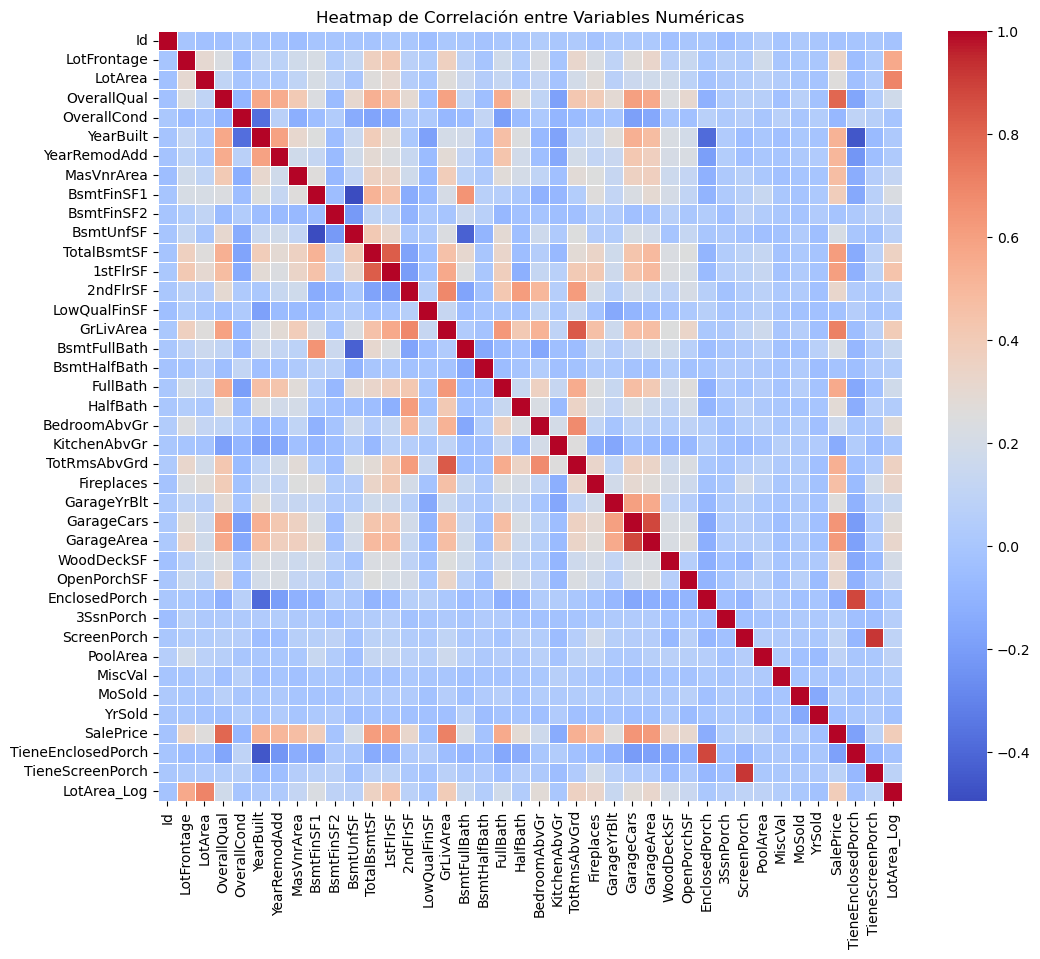

In [91]:
# Generar un heatmap de correlación para las variables numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric_only.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables Numéricas")
plt.show()

C:\Users\franc\AppData\Local\Temp\ipykernel_1152\1173957844.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=saleprice_corr.index[:15], y=saleprice_corr.values[:15], palette="coolwarm")


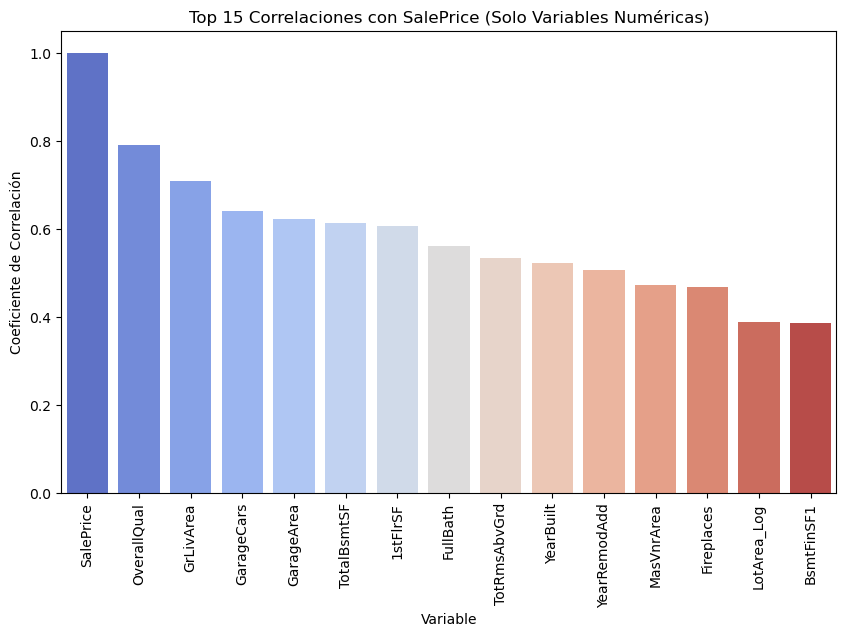

In [89]:
# Calcular la correlación de SalePrice con variables numéricas
# Filtrar solo las variables numéricas para calcular la correlación
df_numeric_only = df_final.select_dtypes(include=["number"])

# Calcular la correlación de SalePrice con variables numéricas
correlation_matrix = df_numeric_only.corr()
saleprice_corr = correlation_matrix["SalePrice"].sort_values(ascending=False)

# Visualizar las principales correlaciones con SalePrice
plt.figure(figsize=(10, 6))
sns.barplot(x=saleprice_corr.index[:15], y=saleprice_corr.values[:15], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 15 Correlaciones con SalePrice (Solo Variables Numéricas)")
plt.ylabel("Coeficiente de Correlación")
plt.xlabel("Variable")
plt.show()



#### Analizar la relación entre variables categóricas y SalePrice

C:\Users\franc\AppData\Local\Temp\ipykernel_1152\1533141941.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\franc\AppData\Local\Temp\ipykernel_1152\1533141941.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\franc\AppData\Local\Temp\ipykernel_1152\1533141941.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\franc\AppData\Local\Temp\ipykernel_1152\1533141941.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklab

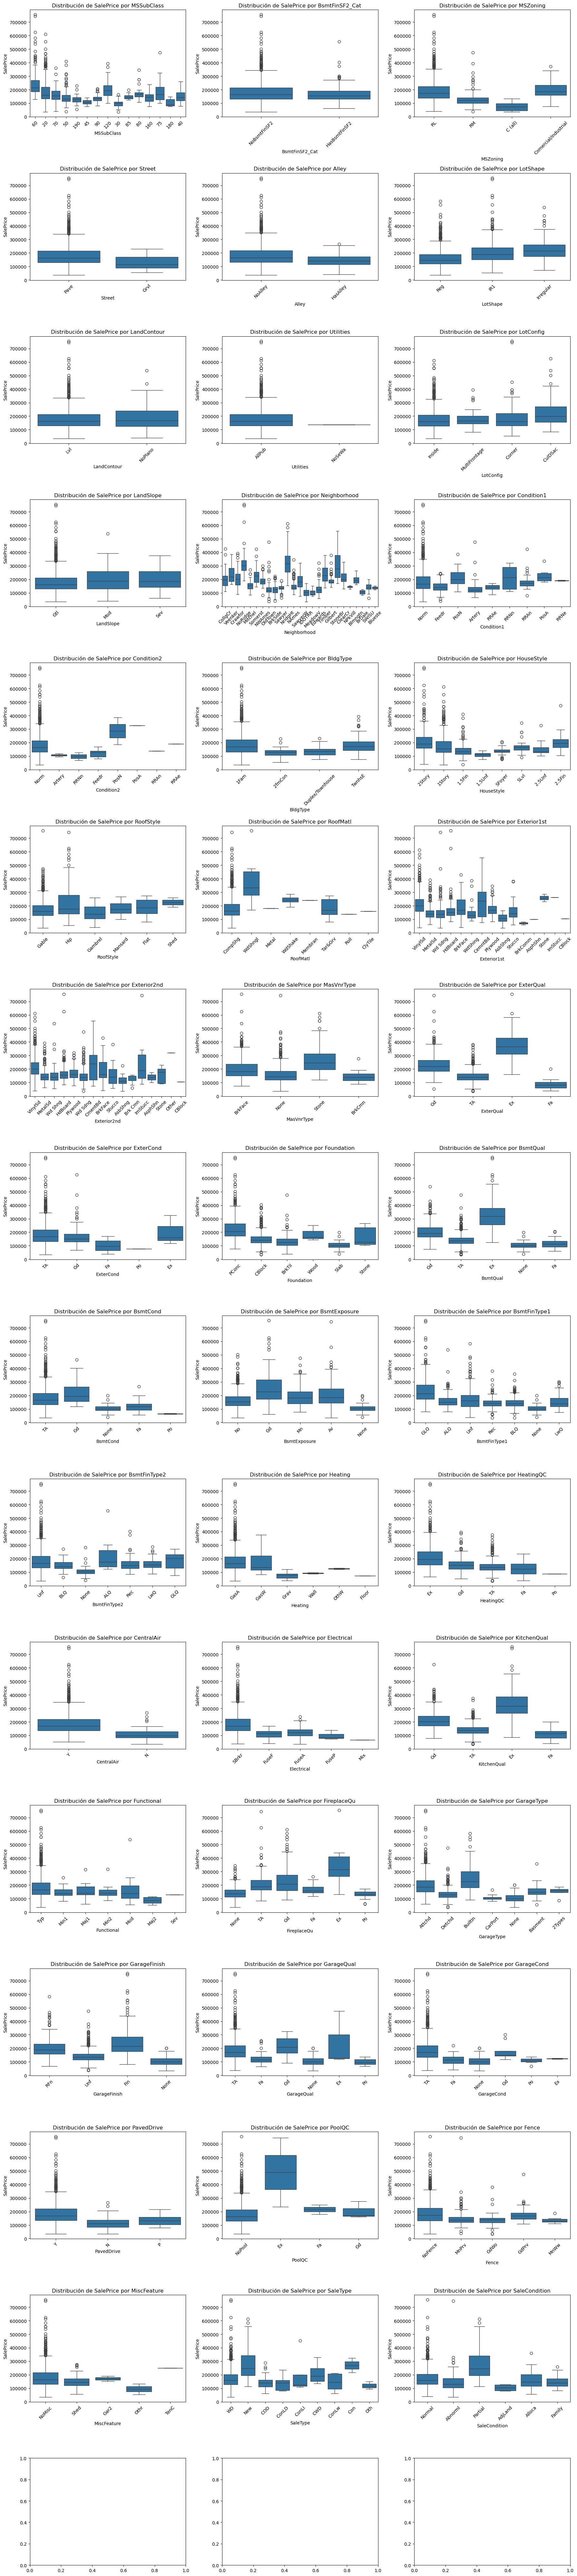

In [96]:
categorical_vars = df_final.select_dtypes(include=["object"]).columns

# Crear visualización de distribución de SalePrice por cada variable categórica
num_plots = len(categorical_vars)
fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(18, 5 * ((num_plots // 3) + 1)))

axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.boxplot(x=df_final[var], y=df_final["SalePrice"], ax=axes[i])
    axes[i].set_title(f"Distribución de SalePrice por {var}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


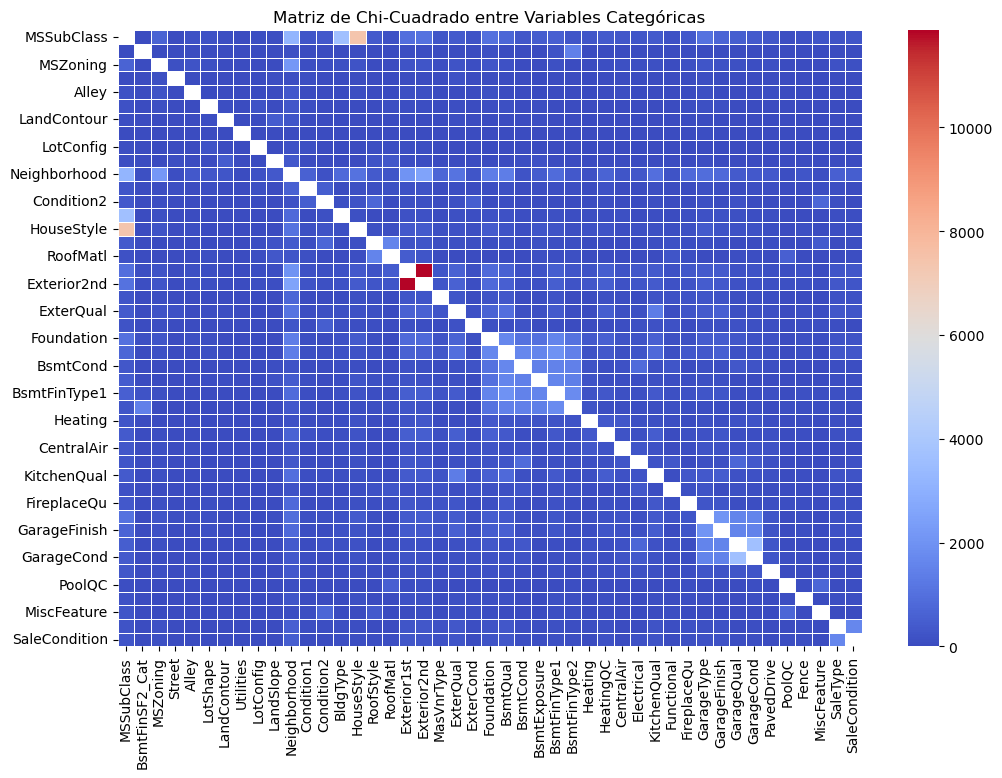

In [101]:
chi2_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

# Calcular Chi-cuadrado para cada par de variables categóricas
for var1 in categorical_vars:
    for var2 in categorical_vars:
        # Evitar calcular Chi-cuadrado con la misma variable
        if var1 != var2:  
            contingency_table = pd.crosstab(df_final[var1], df_final[var2])
            chi2, p, _, _ = stats.chi2_contingency(contingency_table)
            chi2_matrix.loc[var1, var2] = chi2

chi2_matrix = chi2_matrix.apply(pd.to_numeric)

# Visualizar la matriz de Chi-cuadrado  heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(chi2_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matriz de Chi-Cuadrado entre Variables Categóricas")
plt.show()

# chi2_matrix


**Hallazgos clave:**

 - MSZoning, GarageType, MSSubClass y SaleType tienen relaciones fuertes con varias otras variables.
 - Variables como Street y Utilities tienen baja asociación con la mayoría → Pueden ser irrelevantes para el modelo.
 - Si dos variables están altamente relacionadas, podemos combinar o eliminar una para reducir dimensionalidad.

In [104]:
# Eliminar las variables irrelevantes identificadas
vars_to_drop = ["Street", "Utilities", "LandSlope", "LandContour"]
df_final = df_final.drop(columns=vars_to_drop)
df_final.shape

(1460, 81)

#### Fusión Variables

In [113]:
# Fusionar SaleType y SaleCondition en una nueva variable "SaleCategory"
df_final["SaleCategory"] = df_final["SaleType"] + "_" + df_final["SaleCondition"]

# Fusionar MSSubClass y GarageType en una nueva variable "HomeGarageType"
df_final["HomeGarageType"] = df_final["MSSubClass"] + "_" + df_final["GarageType"]

# Eliminar las variables originales después de la fusión
df_final = df_final.drop(columns=["SaleType", "SaleCondition", "MSSubClass", "GarageType"], errors="ignore")


df_final

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1         65.0     8450            7            5       2003   
1        2         80.0     9600            6            8       1976   
2        3         68.0    11250            7            5       2001   
3        4         60.0     9550            7            5       1915   
4        5         84.0    14260            8            5       2000   
...    ...          ...      ...          ...          ...        ...   
1455  1456         62.0     7917            6            5       1999   
1456  1457         85.0    13175            6            6       1978   
1457  1458         66.0     9042            7            9       1941   
1458  1459         68.0     9717            5            6       1950   
1459  1460         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  FireplaceQu  \
0             2003       196.0         706           0  ...         None   
1             1976         0.0         978           0  ...           TA   
2             2002       162.0         486           0  ...           TA   
3             1970         0.0         216           0  ...           Gd   
4             2000       350.0         655           0  ...           TA   
...            ...         ...         ...         ...  ...          ...   
1455          2000         0.0           0           0  ...           TA   
1456          1988       119.0         790         163  ...           TA   
1457          2006         0.0         275           0  ...           Gd   
1458          1996         0.0          49        1029  ...         None   
1459          1965         0.0         830         290  ...         None   

      GarageFinish  GarageQual  GarageCond  PavedDrive  PoolQC    Fence  \
0              RFn          TA          TA           Y  NoPool  NoFence   
1              RFn          TA          TA           Y  NoPool  NoFence   
2              RFn          TA          TA           Y  NoPool  NoFence   
3              Unf          TA          TA           Y  NoPool  NoFence   
4              RFn          TA          TA           Y  NoPool  NoFence   
...            ...         ...         ...         ...     ...      ...   
1455           RFn          TA          TA           Y  NoPool  NoFence   
1456           Unf          TA          TA           Y  NoPool    MnPrv   
1457           RFn          TA          TA           Y  NoPool    GdPrv   
1458           Unf          TA          TA           Y  NoPool  NoFence   
1459           Fin          TA          TA           Y  NoPool  NoFence   

      MiscFeature  SaleCategory  HomeGarageType  
0          NoMisc     WD_Normal       60_Attchd  
1          NoMisc     WD_Normal       20_Attchd  
2          NoMisc     WD_Normal       60_Attchd  
3          NoMisc    WD_Abnorml       70_Detchd  
4          NoMisc     WD_Normal       60_Attchd  
...           ...           ...             ...  
1455       NoMisc     WD_Normal       60_Attchd  
1456       NoMisc     WD_Normal       20_Attchd  
1457         Shed     WD_Normal       70_Attchd  
1458       NoMisc     WD_Normal       20_Attchd  
1459       NoMisc     WD_Normal       20_Attchd  

[1460 rows x 79 columns]

In [121]:
df_final.shape

(1460, 79)